<a href="https://colab.research.google.com/github/CristinaMarsh/Learning_/blob/main/Dataset/Spire_Fall2021_Ultimate_AF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Spire Fall 2021 Ultimate Notebook**

# Contributions

Ben:
* Exploratory data analysis of the CYGNSS Full DDM Lv1 data
* Prepare data for interpolation/finish the collocation of interpolated data
* Prepare the modeling dataset with all relevant DDM calibration variables
* Linear regression modeling


David:
* Exploratory data analysis of the ECMWF background wind speed and significant wave height (SWH) data
* Interpolating background wind speed and SWH for specular points
* Machine learning modeling

Required Files:
* The only Python package files which needed to be installed for the project (weren't already recognized by Colab) were in the Haversine package
* Input files include several .nc (NetCDF) or nc4(netCDF4) files, a few .pkl files, and one .png file (involved in our Template Matching process)
* The team produced a database of collocated data, in 45 netCDF files, a shortcut to which will be included in the Spire project folder

# Abstract

  Ever since the launching of the CYGNSS satellite system in 2016 by NASA, many data analysts have experimented with models that use its Delay Doppler Map (DDM) information to predict weather phenomena. Together, team members of the Fall 2021 Spire project team have analyzed DDM datasets from CYGNSS, interpolated wind speed and wave height data from the European Centre for Medium-Range Weather Forecasts (ECMWF), collocating those with corresponding CYGNSS data. They have performed both linear and machine learning modeling on the collocated sets.
  The present analysis offers preparation, diagnostics and conclusions for both models, including functions for interpolation/collocation of ECMWF and CYGNSS data along the way.
  

# Introduction

* What is the motive and history (before Math Clinic) of the project?

NASA's CYGNSS (CYCLONE GLOBAL NAVIGATION SATELLITE SYSTEM) program was launched in 2016. It consists of eight satellites devoted to the gathering of weather data over the world's oceans, with the aim of providing meteorologists and data scientists input for models that will better predict the emergence of hurricanes and tropical cyclones. The satellites operate on a bistatic spacial priciple, being grouped into pairs, each pair consisting of a transmitter satellite and a receiver satellite. Data is collected through a process of reflectometry: the transmitter sends radio waves to the surface of the ocean at a certain doppler frequency. The amount of time it takes for the signal to reflect on the ocean surface at a 'specular point' and return to the receiver, combined with the shift in doppler frequency, both of which are functions of wind speed and wave height over the surface, are variables used to compute 'raw counts' power values. These values, in turn, are used to color Delay Doppler Maps (DDMs), 4 per timestamp/CYGNSS sample; all these maps are stored in netCDF files by sampling date, in a massive CYGNSS database, most of which is freely available for download through NASA's OpenDap system. Further information about the history and methods of the CYGNSS program can be found here: [Source](https://www.nasa.gov/cygnss/overview)

The major motivation for the project is a desire, on the part of project sponsor Spire Global, to have wind speed/wave height data from the European Center for Medium-range Forecasting (ECMWF) background grids collocated with the CYGNSS Full DDM data offered by NASA for dates between March 1 and September 1, 2021, perhaps for use in future modeling. As an additional point of academic curiosity, the team was motivated to perform some elementary modeling with an eye toward predicting wind speed and wave height from calibrations of the DDM data.

* What (ideally) will be its impact on the sponsor or other stakeholders?

Ideally, the impact of the project on the sponsor will be to provide their data analysts with a pool of collocated data for any use in future modeling involving CYGNSS DDMs for 2021. Perhaps the collocated database will even prove useful in helping future Math Clinic groups that are working with the CYGNSS data in their efforts to contribute to forward model development, as is described in [Huang, 2020.](file:///home/chronos/u-4dcc30a389d36cc64f54dd75f1a12b4a4f757813/MyFiles/Downloads/A_Forward_Model_for_Data_Assimilation_of_GNSS_Ocean_Reflectometry_Delay-Doppler_Maps.pdf)


* What is the general technical approach to solve the sponsor's problem?

The process of analyzing and preparing data for any eventual modeling began with independently exploring CYGNSS Full DDM datasets. Then, the team moved into a phase of interpolating ECMWF wind data/wave data (provided by Spire) by the location of specular points of CYGNSS sets against the background wind data/wave data grid. The data was interpolated using [inverse distance weighting interpolation](https://gisgeography.com/inverse-distance-weighting-idw-interpolation/) and the distance between points was found using the haversine forumla. The collocation process was then completed for 45 CYGNSS files between March 1 and September 1, 2021, in an attempt to process as much data in that time frame as possible, per the request of the project sponsors. Finally, Linear Regression and Machine Learning Modeling was conducted independently by separate team members, with separate models predicting wind speed/wave height based on input from DDM calibrations. This involved considerable research and diagnostic processing. At the end of the modeling process, the model results were analyzed and their limitations detailed.



# Methods

## Data

* Describe the data or computational space, their amount (in bytes, number of files etc.), type (categorical, numerical etc.) and physical units

Project data came from NASA's CYGNSS Delay Doppler Map data and from ECMWF background wind/wave grid data, provided by the sponsor. Altogether, the team processed tens of gigabytes of that data in the collocation phase, during which team members built a collocated database of 45 files. The team then went on to perform modeling on a dataset built from 5 of those collocated files. Physical units included meters/sec for wind speed values, meters for wave height, datetime64 datatype units down the half-second for CYGNSS UTC timestamps, and delay times and doppler frequencies for power values that color delay doppler maps.

The teams extensive use of CYGNSS DDMs merits a more detailed definition of Delay Doppler Maps. According to a paper by University of Michigan and Soutwest Research Institute scholars Randy Rose, Scott Gleason and Chris Ruf, "A perfectly smooth surface reflects a
specular point while a rough surface scatters it across a distributed “glistening zone”. The Delay Doppler Map (DDM)
created by the GNSS-R instrument is an image of that scattering cross-section in the time and frequency domains across the glistening zone" (Gleason, et. al, 2014).

**paper can be found at: [Link](https://www.spiedigitallibrary.org/conference-proceedings-of-spie/9240/924005/The-NASA-CYGNSS-mission--a-pathfinder-for-GNSS-scatterometry/10.1117/12.2068378.short?SSO=1)


More specifically, it appears that the receiving device measures the time delay and doppler frequency of the reflected signal and cross correlates them with a "local copy" of original values for those variables from the transmitter. That correlation function is given in Huang, et, al, 2020 as:

$Y_k(\tau,f)=\frac{1}{T_i}\int_{t_k-T_i}^{t_k}u_r(t)a(t+\tau)e^{2pij(f_0+f)t}dt$

where $\tau$ is the time delay, $f$ is the frequency measure, $t_k$ is the time for the "complex correlation result", $a(t)$ is a function of the PRN code (also given in this dataset) and $T_i$ is the integration time (in CYGNSS' case, $T_i = 1$ms).

The $N=1000$ sequential results are then "incoherently averaged":

$Z(\tau, f) = \frac{1}{N}\sum_{k=1}^{N}|Y_k(\tau, f)|^2$


The power values stored in "raw_counts" in this dataset are just a linear combination of $Z(\tau, f)$

All this can be found in the Huang (2020) paper:
"A Forward Model for Data Assimilation of GNSS Ocean Reflectometry Delay-Doppler Maps" [Link](file:///home/chronos/u-4dcc30a389d36cc64f54dd75f1a12b4a4f757813/MyFiles/Downloads/A_Forward_Model_for_Data_Assimilation_of_GNSS_Ocean_Reflectometry_Delay-Doppler_Maps.pdf)

According to Gleason, et. al, "The DDM is an information-rich data set of surface state statistics. When this measurement is obtained from the ocean's surface, the data is intimately related to the surface wind vector and providing a direct measurement of the wave height statistics." The authors continue: "In the case of ocean surface GNSS scatterometry, estimation of the ocean surface roughness and near-surface wind speed
is possible from two different properties of the DDM: The maximum scattering cross-section (the dark red region...)and the shape of the scattering arc [yellow/red regions]..."(Gleason, 2014).

Important DDM calibrations for modeling that were calculated by the team were three in number. The first was DDM Average, a simple average of 'raw counts' power values that color DDM plots in a 10 X 5 area around the specular point bin of each DDM. The second was RMS ratio, the highest power value in a given DDM divided by the root mean square of the rest of the power values (a statistic recommended for inclusion by the instructor). A third was Maximum Template Matching Coefficient, the highest pixel correlation coefficient in a template matching of each DDM against an 'ideal' template. The template matching method chosen was the Normalized Correlation Coefficient Method in the Open CV package in Python. This method works, according to Open CV documentation, by sliding across $T$, the template image matrix of pixels, and across $I$, the source/testing image matrix of pixels, and compares pixels, calculating a correlation metric, in our case:
$R(x,y)=\frac{\sum_{x',y'}(T'(x',y')*I'(x+x', y+y'))}{\sqrt{\sum_{x',y'}T'(x',y')^2*\sum_{x',y'}I'(x+x',y+y')^2}}$
[Link](https://docs.opencv.org/3.4/de/da9/tutorial_template_matching.html)

Another important pair of variables in our dataset were Normalized Bistatic Radar Cross Section (NBRCS) and Leading Edge Slope (LES), NASA's own, more sophisticated physical calibrations of the DDMs in the CYGNSS datasets. These were pulled directly from NASA's publically available 'ALL DDM' dataset, and then they were worked back into our modeling dataset.

The team had limited time to understand NBRCS and LES in all their wave-physical details, but outside research led team members to conclude they might be useful values in modeling. Methods of calibration of NBRCS and LES are described in the following article in the journal *Remote Sensing*: [Link](https://www.mdpi.com/2072-4292/12/22/3760/htm)

The ECMWF dataset includes information about wind speed and wave heights for latitude and longitude pairs measured in 1/8 degree incriments.  The variables of interest from the ECMWF data sets were 'U10m' which is a measurement of the 10 meter zonal wind (m/s), 'V10m' which is a measurement of the 10 meter meridonal wind (m/s), and 'SWH' which is a measurement of significant wave height.

In most of the world the standard is to measure wind speeds at a height of 10 meters above [ground level](https://www.mesonet.org/index.php/site/about/wind_measurements).  This ensures the measurement is not affected by surrounding vegitation.  The United States measures at 20 feet above ground level.  The wind is measured at that height to get a measurement unobstructed by other objects on the ground. [Link](http://www.firewords.net/definitions/10-meter_wind_speed.htm)

Significant wave height is a measurement devised by Walter Munk during World War II that measures the average wave height from through to crest of the highest 1/3 of waves.  Significant wave height is used to estimate many aspects of a wave.  The top 10% of waves are roughly 1.3 times SWH and the maximum wave height one would expect to see is roughly double the SWH. [Link](https://media.bom.gov.au/social/blog/870/ruling-the-waves-how-a-simple-wave-height-concept-can-help-you-judge-the-size-of-the-sea/)

## Interpolation of Background Data

Interpolation is a technique used to estimate a property of an area based on known values of that property in surrounding areas.  This uses the assumption that thse properties behave more like areas nearby than areas far away.  We often do not have the technology to collect data for a continuous region so things like weather stations will collect data and that data is interpolated to estimate the weather in areas around the weather station.  The best method for interpolating geospatial data depends on a what weather property you are trying to interpolate. Based on the research the team found, there are conflicting opinions as to what is the best method for interpolating wind speed data.  The most common method suggested was some form of inverse distance weighted interpolation. Acording to [esri](https://www.esri.com/en-us/about/about-esri/overview), a top GIS company, the convention for using inverse weighted distance interpolation with geospatial data is to use inverse weighted distance squared interpolation. ([Link](https://pro.arcgis.com/en/pro-app/latest/help/analysis/geostatistical-analyst/how-inverse-distance-weighted-interpolation-works.htm))  The formula for inverse weighted distance squared interpolation is given by:
<br>
<br>$Z(x) = \frac{\sum_{i=1}^{n}(\frac{z_i}{d_i^2})}{\sum_{i=1}^{n}(\frac{1}{d_i^2})}$
<br>
<br> where $z(x)$ is the interpolated value at point $x$, $z_i$ is a known value of $z$ and $d_i^2$ is the squared distance from point $i$ to point $x$.

Finding the distance between two points on the globe is done using the [haversine](https://en.wikipedia.org/wiki/Haversine_formula) formula.  This uses triginometry to find the distance between two points on a sphere and is commonly used to calculate the distance between two points on the globe.  The haversine formula for is iven by:
<br>
<br> $d = 2rsin^{-1}(\sqrt{sin^2(\frac{\phi_2 - \phi_1}{2}) + cos(\phi_1)cos(\phi_2)sin^2(\frac{\lambda_2 - \lambda_1}{2})})$
<br>
<br> where $d$ is the distance between two points, $r$ is the radius of the sphere, in this case that is the radius of the Earth, $\phi_1$ and $\phi_2$ are the the latitude of the two points and $\lambda_1$ and $\lambda_2$ are the longitude of the two points.


What mathematical, statistical, or physical models are being used?

The two main types of models being used are linear regression models (ordinary least squares) and machine learning models.

## Modeling

**Linear Regression:**

Diagnostic work for the linear regression models involved the use of variance inflation factor analysis for multicolinearity assessment. Best subsets variable selection was performed, emphasizing the maximization of Residual Sum of Squares values from various models fit. Error assumptions were checked with normality plots to determine distribution of residuals, and with Durban-Watson test statistics to assess autocorrelation of consecutive errors in the model.

Outliers were examined using a Bonferroni Test. According to *Linear Models with R*, by Julian Faraway, we looked for observations whose Bonferonni corrected p-value, here called 'bonf(p)', is less than the studentized residual for the observation, where the studentized residual is equal to

$t_i=r_i(\frac{n-p-1}{n-p-r_i^2})^{1/2}$,

and where $r_i$ is the residual for that observation, $n$ is the number of observations, and $p$ is the number of regressors in the model. In the Bonferonni test, the Bonferonni adjusted p-value is equal to $\frac{\alpha}{n}$, where $\alpha = .05$.

Influential values were analyzed using Cook's Distance statistics, plotted against 'instances' (individual observations ordered by sample/time). The formula for Cook's Distance is given in Faraway's text as:
$D_i = \frac{1}{p}r_i^2\frac{h_i}{1-h_i}$, where $p$ is the number of regressors in the model, $r_i^2$ is the residual effect of observation $i$ squared, and $\frac{h_i}{1-h_i}$ is the 'leverage term' for the observation.
This can be found in Faraway, Julian. *Linear Models with R: 2nd ed.*, UK: CRC Press, 2015, pages 90-91.

Model structure was evaluated using fitted values vs. residuals plots and partial regression plots, to determine which DDM calibrations had the most significance in the model fit for predicting wind speed and wave height.  Lastly, models were fit and their estimated coefficients interpreted in the context of the problem of predicting wind speed/wave height.

**Machine Learning**:

Machine learning is one of the most exciting and rapidly growing fields in the world.  There is more depth to this than can be grasped in such a small amount of time.  The general goal of a machine learning algorithm is minimizing a cost function.  That cost function is a function that determines how close the model was to correctly predict test observations.  The model is able to learn how to make its guesses by inputing training data.  In general, the more training data available, the more accurate the models' predictions will be.

Since the Spire team aims to use the collocated data base to help train a machine learning model, and there are so many basic machine learning functions that are ready to use with minimal understanding, the team decided to attempt to develope a basic classification machine learning model.

A classification machine learning model takes in observations that train the model to recognize a class that observation belongs in.  After the model is trained, it tries to predict what class an observation should be in.  A common method for optimizing a classification model is to use gradient decent.  Gradient decent is a great tool for minimizing a cost function.  Stochastic gradient descent uses a single sample to compute the gradient.  Sci-learn kit offers a Stochastic gradient classification alorithm called SGD-Classifier.  This is the alorithm the team will use to create their models.

# Code for Notebook setup

## Loading libraries

In [ ]:
# Install necessary packages
!pip install haversine

In [ ]:
##import necessary packages
import xarray as xr
import netCDF4 as nc
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pylab as py
import itertools
import seaborn as sns
import os
from matplotlib import ticker
from matplotlib import colors
import matplotlib.patches as mpatches
import math
from datetime import *
from datetime import datetime
from scipy.stats import halfnorm
from scipy.special import cbrt
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from yellowbrick.base import Visualizer
from statsmodels.stats.outliers_influence import OLSInfluence as influence
from sklearn.linear_model import LinearRegression
import cv2
from google.colab.patches import cv2_imshow
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pickle
from os.path import exists
from haversine import haversine, Unit
from tqdm import tqdm
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import load_iris
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import scale
from statsmodels.graphics.mosaicplot import mosaic
from matplotlib.patches import Patch
import itertools
from collections import deque
%matplotlib inline
%precision 3

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


'%.3f'

## Drive mount/File path variables

In [ ]:
#Allow user to mount to user google drive
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
#Names of respective shortcuts in the Spire folder to team member Google drive file folders
David_path = 'For Davids Notebook v2/'
Ben_path = 'Files needed to run Spire project notebook/'

In [ ]:
#Define variables to be used later in i/o pathways
cwd = os.getcwd()       # Assumes no cd commands were executed
pathProfessor = 'Colab Notebooks/Math Clinic/2021fa/Spire/'

## Functions for Notebook Execution

In [ ]:
##FUNCTIONS FOR EXPLORATORY ANALYSIS PHASE:

## define a function that plots the CYGNSS latitudes against CYGNSS longitudes and colors by sample
def location_time_plot(ultimate_set,start_sample_index,end_sample_index):
  selection = ultimate_set.isel(sample=slice(start_sample_index,end_sample_index))
  times_array = selection['ddm_timestamp_utc'].values
  times_array = times_array.flatten()
  times_array = convert_to_minute(times_array)
  times_array = np.repeat(times_array, 4)
  lons = selection['sp_lon'].values
  lons = lons.flatten()
  lats = selection['sp_lat'].values
  lats = lats.flatten()
  cmap = matplotlib.cm.get_cmap("viridis", 2)
  ax1 = plt.scatter(x=lons, y =lats, s = 3, c = times_array, cmap = cmap)
  cb = plt.colorbar(ax1)
  tick_locator = ticker.MaxNLocator(nbins= 2)
  cb.locator = tick_locator
  cb.update_ticks()
  cb.ax.set_yticklabels(['dropped string','1:05-1:15', '17:02-17:12'])
  plt.xlabel('Specular Point Longitude')
  plt.ylabel('Specular Point Latitutde')
  plt.title('Specular Point Latitude vs. Longitude, Colored by Minute since 00:00, 4-11-21')

#define a function that will convert the times_array in function 'location_time_plot' to minutes since the start of the day
def convert_to_minute(times_array):
  times_array1 = [str(stamp) for stamp in times_array]
  times_array2 = [stamp[11:16] for stamp in times_array1]
  times_array_nump = np.array(times_array2)
  times_array_nump = np.char.replace(times_array_nump, ':', '')
  hour_array = [stamp[0:2] for stamp in times_array_nump]
  minute_array = [stamp[2:4] for stamp in times_array_nump]
  hour_integer = [int(stamp) for stamp in hour_array]
  hour_in_min = [element * 60 for element in hour_integer]
  minute_integer = [int(stamp) for stamp in minute_array]

  sum_list = [a + b for a, b in zip(hour_in_min, minute_integer)]
  return sum_list

#define a function that will plot all four DDMs associated with a given CYGNSS sample
def ddm_plots(ourset, sample_select):
  fig, axes = plt.subplots(2,2)
  plt.suptitle(f'DDMs for Sample {sample_select}', va = 'bottom')
  ourset.sel(sample = sample_select, ddm = 0)['raw_counts'].plot(ax = axes[0][0], add_labels = False)
  ax = axes[0][0]
  ax.set_title('Channel 0')
  ourset.sel(sample = sample_select, ddm = 1)['raw_counts'].plot(ax= axes[0][1], add_labels = False)
  ax = axes [0][1]
  ax.set_title('Channel 1')
  ourset.sel(sample = sample_select, ddm = 2)['raw_counts'].plot(ax= axes[1][0], add_labels = False)
  ax = axes[1][0]
  ax.set_title('Channel 2')
  ourset.sel(sample = sample_select, ddm = 3)['raw_counts'].plot(ax= axes[1][1], add_labels = False)
  ax = axes[1][1]
  ax.set_title('Channel 3')
  fig.tight_layout()

def latlon_index(ds, x, y, tol = 1/8):
  '''
  Function that returns index values of nearest grid point to longitude
  and latitude coordinates
  ds = dataset
  x = latitude coordinate (W < 0 <= E) by convention
  y = longitude coordinate (S < 0 <= N) by convention
  tol = The tolerance of the measuring device (distance between grid points)

  '''
  idx_x = (ds.lat > x - tol/2) & (ds.lat <= x + tol/2)
  idx_x = np.where(idx_x)[0]
  idx_x = idx_x[0]

  idx_y = (ds.lon > y - tol/2) & (ds.lon <= y + tol/2)
  idx_y = np.where(idx_y)[0]
  idx_y = idx_y[0]

  return(idx_x, idx_y)

def vizualize_region(ds, x, y, tol = 1/8, grid_size = 24, overlay=True, alpha = 1):
  '''
  Function that generates some basic plots to observe an area of interest
  ds = dataset
  x = latitude coordinate (E > 0 & W < 0) by convention
  y = longitude coordinate (N > 0 & S < 0) by convention
  tol = The tolerance of the measuring device (distance between grid points)
  overlay = if True, Wind speed vector map and SWH contour plot will be overlain on eachother
  alpha = transparancy of SWH contour map if overlay is set to True

  Plot 1: v10m vs u10m
  Plot 2: lon vs lat
  Plot 3: swh boxplot
  Plot 4: spd histogram
  Plot 5: 10m Wind Speed vector field
  Plot 6: Countour plot of SWH

  '''
  # returns latitude and longitude index values for the grid point that is
  # closest to the given coordinates
  lat_idx = (ds.lat > x - tol/2) & (ds.lat <= x + tol/2)
  lat_idx = np.where(lat_idx)[0]
  lat_idx = lat_idx[0]
  lon_idx = (ds.lon > y - tol/2) & (ds.lon <= y + tol/2)
  lon_idx = np.where(lon_idx)[0]
  lon_idx = lon_idx[0]

  # Creates varaibles for plotting
  x_min = lat_idx - int(grid_size/2)
  x_max = lat_idx + int(grid_size/2)
  y_min = lon_idx - int(grid_size/2)
  y_max = lon_idx + int(grid_size/2)
  u = ds['U10m'][x_min:x_max, y_min:y_max]
  v = ds['V10m'][x_min:x_max, y_min:y_max]
  lat = ds['lat'][x_min:x_max]
  lon = ds['lon'][y_min:y_max]
  swh = ds['SWH'][x_min:x_max, y_min:y_max]
  spd = ds['SPD'][x_min:x_max, y_min:y_max]

  # Variables for legend of Plot 2
  grid_leg = mpatches.Patch(color = 'blue', label = 'Grid Point')
  spec_leg = mpatches.Patch(color = 'red', label = 'Input coordinates')

  fig = plt.figure()

  fig.set_size_inches(20, 15)
  ax1 = plt.subplot2grid((3, 4), (0, 0))
  ax2 = plt.subplot2grid((3, 4), (0, 1))
  ax3 = plt.subplot2grid((3, 4), (0, 2))
  ax4 = plt.subplot2grid((3, 4), (0, 3))
  X, Y = np.meshgrid(lon, lat)

  # Plot 1
  ax1.scatter(u, v, s = 2)
  corr = round(float(xr.corr(u, v)), 2)
  ax1.set_title(f'v10m vs u10m correlation = {corr}')
  ax1.set_xlabel('u10m')
  ax1.set_ylabel('v10m')

  # Plot 2
  ax2.scatter(X, Y, s = 3)
  ax2.plot(y, x, 'ro', markersize = 5)
  idx_x, idx_y = latlon_index(ds, x, y)
  dist = round(haversine((x, y), (ds['lat'][idx_x], ds['lon'][idx_y])), 2)
  ax2.set_title(f'Distance to nearest gridpoint: {dist} (km)')
  ax2.set_xlabel('Longitude')
  ax2.set_ylabel('Latitude')
  ax2.legend(handles=[spec_leg, grid_leg], frameon=True)

  # Plot 3
  swh_df = swh.to_dataframe()
  ax3.boxplot(swh_df['SWH'])
  mean_swh = round(np.mean(swh_df['SWH']), 2)
  std_swh = round(np.std(swh_df['SWH']), 2)
  ax3.set_title(f'Avg SWH = {mean_swh:.2e} (m),  std = {std_swh}')
  ax3.set_ylabel('SWH (m)')

  # Plot 4
  spd_df = spd.to_dataframe()
  ax4.hist(spd_df['SPD'], bins=25)
  mean_spd = round(np.mean(spd_df['SPD']), 2)
  std_spd = round(np.std(spd_df['SPD']), 2)
  ax4.set_xlabel('Windspeed (m/s)')
  ax4.set_title(f'Avg windspeed = {mean_spd} (m/s), std = {std_spd}')

  if overlay == True:
    ax5 = plt.subplot2grid((3, 4), (1, 0), colspan=3, rowspan=2)

    # Plot 5
    plot1 = ax5.contourf(X, Y, swh, cmap='ocean', alpha=alpha)
    plot2 = ax5.quiver(X, Y, u, v, spd, cmap='jet')
    ax5.set_title('Wind speed vector map and SWH contour map')
    ax5.set_xlabel('Longitude')
    ax5.set_ylabel('Latitude')
    plt.colorbar(plot1, ax=ax5, label='SWH')
    plt.colorbar(plot2, ax=ax5, label='Wind Speed')
  else:
    ax5 = plt.subplot2grid((3, 4), (1, 0), colspan=2, rowspan=2)
    ax6 = plt.subplot2grid((3, 4), (1, 2), colspan=2, rowspan=2)

    # Plot 5
    plot5 = ax5.quiver(X, Y, u, v, spd, cmap='jet')
    fig.colorbar(plot5, ax=ax5, shrink=0.8)

    ax5.set_title('10m Wind Speed Vector Field')
    ax5.set_xlabel('Longitude')
    ax5.set_ylabel('Latitude')
    ax5.set_aspect('equal')

    # Plot 6
    plot6 = ax6.contourf(X, Y, swh, cmap='ocean')
    fig.colorbar(plot6, ax=ax6, shrink=0.8)

    ax6.set_title('Significant Wave Height Contour')
    ax6.set_xlabel('Longitude')
    ax6.set_ylabel('Latitude')
    ax6.set_aspect('equal')

  plt.subplots_adjust(wspace = 0.3, hspace = 0.3)
  plt.show()

def latlon_index(ds, x, y, tol = 1/8):
  '''
  Function that returns index values of nearest grid point to given longitude
  and latitude coordinates
  ds = dataset
  x = latitude coordinate (W < 0 <= E) by convention
  y = longitude coordinate (S < 0 <= N) by convention
  tol = The tolerance of the measuring device (distance between grid points)

  '''
  idx_x = (ds.lat > x - tol/2) & (ds.lat <= x + tol/2)
  idx_x = np.where(idx_x)[0]
  idx_x = idx_x[0]

  idx_y = (ds.lon > y - tol/2) & (ds.lon <= y + tol/2)
  idx_y = np.where(idx_y)[0]
  idx_y = idx_y[0]

  return(idx_x, idx_y)

##FUNCTIONS FOR INTERPOLATION PHASE:

def spec_values_nearest(ds, sp_lat, sp_lon, tol = 1/8):
  '''
  Input an xarray dataset, latitude coordinate, longitdue coordinate, and tollerance
  Output U10m, V10m, and SWH of the grid point that is closest to the input coordinates
  ds = xarray dataset
  sp_lat = latitude coordinate of specular point
  sp_lon = longitude coordinate of specular point
  tol = tollerance of measuring device (distance between grid points)

  '''
  #Finding index values of the nearest gridpoint
  idx_x, idx_y = latlon_index(ds, sp_lat, sp_lon)

  # Assigning values of interest to variables
  U10m = float(ds['U10m'][idx_x, idx_y])
  V10m = float(ds['V10m'][idx_x, idx_y])
  SWH = float(ds['SWH'][idx_x, idx_y])

  return(U10m, V10m, SWH)

def clean_CYGNSS(ds):
  '''
  In rare cases, CYGNSS data is not input correctly.  One case was found where a
  specular point had a longitude greater than 180.
  This function checks for out of range longitude coordinates and corrects them.
    *Longitude of 190 is the same as longitude of -170.

  Currently this function does not check for or correct out of range latitude coordinates.
  This is because a latitude value over 90 or under -90 has not been found in a CYGNSS
  data set and does not make sense physically as that point does not exist on the globe.
  If such a case occurs, this function will be adjusted to include that functionality.
  '''

  n = len(ds)

  # case: secular point longitude is greater than 180
  for i in range(len(ds)):
    if ds.at[i, 'sp_lon'] > 180:
      ds.at[i, 'sp_lon'] = -(360 - ds.at[i, 'sp_lon'])

  # case: specular point longitude is less than 180
  for i in range(len(ds)):
    if ds.at[i, 'sp_lon'] < -180:
      ds.at[i, 'sp_lon'] = (360 + ds.at[i, 'sp_lon'])

  return(ds)

def idw_interpolate(paired_list, power = 2, default = np.nan):
  '''
  Input:
  list in form [(d1, z1), ... , (dn, zn)] where:
    d1 = distance from first neighbor
    z1 = known value from first neighbor
    dn = distance from nth neighbor
    zn = distance from nth neighbor
  power = power for interpolation
  default = value used for missing or NA data

  Output: inverse distance weighting interpolated value
  '''

  num = [x[1]/(x[0]**power) for x in paired_list] # Generates list with each grid points contribution to the numerator
  denom = [1/(x[0]**power) for x in paired_list] # Generates list with each grid points contribution to the denominator

  #
  if sum(denom) != 0:
    idw_value = float(sum(num)/sum(denom))
  else:
    idw_value = default

  return(idw_value)

def interpolate_point(ds, sp_lat, sp_lon, tol = 1/8, swh_tol = 10000, power = 2, default = np.nan):
  '''
  Input an xarray dataset, lattitude coordinate, longitude coordinate, and optional tollerance
  Calculate disctance between the specular point and the four surrounding grid points using the
  haversine formula.
  Calculates wU10m, wV10m, wSWH using inverse distance squared weighted interpolation
  Returns weighted U10m (wU10m), weighted V10m (wV10m), and weighted SWH (wSWH)*
    *Some significant wave height values are entered as 1e20.
     To deal with this, grid points with SWH values > 10000 are not used for calculating wSWH

  '''

  # Finds index values of 4 surrounding grid points
  idx_x = np.where((ds.lat > sp_lat - tol) & (ds.lat <= sp_lat + tol))[0]
  idx_y = np.where((ds.lon > sp_lon - tol) & (ds.lon <= sp_lon + tol))[0]

  # If the specular point lon is in the range (179.875, 180), the index value for -180 degrees lon needs to be appended as positive 180 is not in the dataset
  if len(idx_y) == 1:
    idx_y = np.append(idx_y, 0)

  # Finding inverse distance squared between spec point and 4 nearest grid points
  d1, d2, d3, d4 = (haversine((sp_lat, sp_lon), (ds['lat'][idx_x[0]], ds['lon'][idx_y[0]]))), (haversine((sp_lat, sp_lon), (ds['lat'][idx_x[1]], ds['lon'][idx_y[1]]))), (haversine((sp_lat, sp_lon), (ds['lat'][idx_x[0]], ds['lon'][idx_y[1]]))), (haversine((sp_lat, sp_lon), (ds['lat'][idx_x[1]], ds['lon'][idx_y[0]])))

  # Finding weighted values for U10m and V10m
  U10m_list = [(d1, ds['U10m'][idx_x[0], idx_y[0]]), (d2, ds['U10m'][idx_x[1], idx_y[1]]),\
               (d3, ds['U10m'][idx_x[0], idx_y[1]]), (d4, ds['U10m'][idx_x[1], idx_y[0]])]
  V10m_list = [(d1, ds['V10m'][idx_x[0], idx_y[0]]), (d2, ds['V10m'][idx_x[1], idx_y[1]]),\
               (d3, ds['V10m'][idx_x[0], idx_y[1]]), (d4, ds['V10m'][idx_x[1], idx_y[0]])]
  temp_SWH = [(d1, ds['SWH'][idx_x[0], idx_y[0]]), (d2, ds['SWH'][idx_x[1], idx_y[1]]),\
               (d3, ds['SWH'][idx_x[0], idx_y[1]]), (d4, ds['SWH'][idx_x[1], idx_y[0]])]
  SWH_list = [x for x in temp_SWH if x[1] < swh_tol] # Generates list with SWH values and distance for all SWH < swh_tol


  wU10m = idw_interpolate(U10m_list)
  wV10m = idw_interpolate(V10m_list)
  wSWH = idw_interpolate(SWH_list, default = default)
  U10m_neighbor, V10m_neighbor, SWH_neighbor = len(U10m_list), len(V10m_list), len(SWH_list)

  return(wU10m, wV10m, wSWH, U10m_neighbor, V10m_neighbor, SWH_neighbor)

def interpolate_date(mm, dd, power = 2, subset = False, len_subset = 500, default = np.nan):
  '''
  mm is month (do not enter leading 0's e.g. January is 1 not 01)
  dd is the date (do not enter leading 0's e.g the first is 1 not 01)
  power = the power used for IDW interpolation

  This function takes in a date,
  Loads the appropriate datasets, and
  Generates a data frame with:
  index value
  specular point latitude
  specular point longitude
  weighted U10m (based on spec_values() function)
  weighted V10m (based on spec_values() function)
  weighted SWH (based on spec_values() function)
  for all coordinates in the CYGNSS dataset
  Then it turns the data frame into a pickle and writes it to the drive
  output file: "/content/drive/MyDrive/Spire data/wValues/wValues_2021mmdd.pkl"

  Input files:
  location: "/content/drive/MyDrive/Spire data/For Notebook/file name"
  CYGNSS file in form: CYGNSS_mmdd.pkl
    This file is a pickle formed from the xarray dataset for the input date
    The pickle file has the columns: 'Timestamp', 'specular point lat', 'specular point lon'
  Windspeed data file in form: 2021mmdd_tod.nc
    * tod = 00, 06, 12, or 18 depending on time of day sampling was done

  subset and len_subset variables allow for testing new functionality on small samples
  '''

  # Variables for file path
  date = str(mm).zfill(2) + str(dd).zfill(2)

  # Loding CYGNSS file for input date and corrects coordinates that are out of bounds
  cyg_file = f"{pathTeam}CYGNSS_{date}.pkl"
  cyg =  pd.read_pickle(cyg_file)
  cyg = clean_CYGNSS(cyg)

  # Loading background windspeed data
  ds00 = f"{pathTeam}ecmwf.t00z.pgrb.0p125.f000_2021{date}00.nc"
  if exists(ds00):
    ds00 = xr.open_dataset(ds00)
    print('ds00 was loaded')
  ds06 = f"{pathTeam}ecmwf.t06z.pgrb.0p125.f000_2021{date}06.nc"
  if exists(ds06):
    ds06 = xr.open_dataset(ds06)
    print('ds06 was loaded')
  ds12 = f"{pathTeam}ecmwf.t12z.pgrb.0p125.f000_2021{date}12.nc"
  if exists(ds12):
    ds12 = xr.open_dataset(ds12)
    print('ds12 was loaded')
  ds18 = f"{pathTeam}ecmwf.t18z.pgrb.0p125.f000_2021{date}18.nc"
  if exists(ds18):
    ds18 = xr.open_dataset(ds18)
    print('ds18 was loaded')

  # Defining variables
  wcolumn_names = ['lat', 'lon', 'wU10m', 'wV10m', 'wSWH']
  wValues = pd.DataFrame()
  neighbor_col = ['U10m_neighbor', 'V10m_neighbor', 'SWH_neighbor']
  neighbor_count = pd.DataFrame()

  if subset == True:
    n = len_subset
    date = date + str('_sample')
  else:
    n = len(cyg)

  # Loop that creates data frame with weighted values
  for i in tqdm(range(0,n)):
    x = float(cyg.iloc[i][1])
    y = float(cyg.iloc[i][2])

    # Using the hours in the Timestamp to determine what dataset to load
    ds_tup = (ds00, ds06, ds12, ds18)
    ts = cyg.iloc[i][0].hour
    ts_idx = int((ts - ts%6)/6)
    ds = ds_tup[ts_idx]

    # Calculating wU10m, wV10m, and wSWH
    wU10m, wV10m, wSWH, u10m_neigh, v10m_neigh, swh_neigh = interpolate_point(ds, x, y, power, default = default)

    # Generating data frame
    wtemp_df = pd.DataFrame([[x, y, wU10m, wV10m, wSWH]], columns = (wcolumn_names))
    wValues = wValues.append(wtemp_df)
    temp_neighbor = pd.DataFrame([[u10m_neigh, v10m_neigh, swh_neigh]], columns = (neighbor_col))
    neighbor_count = neighbor_count.append(temp_neighbor)

  filename = f"{pathTeam}wValues_2021{date}.pkl"
  wValues.to_pickle(filename)

  # Printing summary of data to check for errors

  print()
  print(wValues.describe())
  print()
  print('Neighbor count for U10m:')
  print(neighbor_count['U10m_neighbor'].value_counts().sort_index())
  print('Neighbor count for V10m:')
  print(neighbor_count['V10m_neighbor'].value_counts().sort_index())
  print('Neighbor count for SWH:')
  print(neighbor_count['SWH_neighbor'].value_counts().sort_index())

def ecmwf_check(mm, dd):
  '''
  mm = month (do not enter leading 0's e.g. January is 1 not 01)
  dd = date (do not enter leading 0's e.g the first is 1 not 01)

  Input a month and date
  Output a statement with a list of strings potentially containing: {'00', '06', '12', '18'}
  The strings represent the timeframe of ecmwf data needed to interpolate the data for
  the given date

  This function was run before 'idw_interpolate' everytime to ensure the correct files are present

  '''
  date = str(mm).zfill(2) + str(dd).zfill(2)
  ds = pd.read_pickle(f"{pathTeam}CYGNSS_{date}.pkl")

  ts_list = []
  ts_final = []

  for i in range(0, len(ds)):
    ts = ds.iloc[i][0].hour
    ts = ts - ts%6
    ts = str(ts).zfill(2)
    ts_list.append(ts)

  [ts_final.append(n) for n in ts_list if n not in ts_final]

  for j in range (0, len(ts_final)):
    print(f'Need ECMWF file: ecmwf.t{ts_final[j]}z.pgrb.0p125.f000_2021{date}{ts_final[j]}.nc')

##FUNCTIONS FOR COLLOCATION PHASE:

#define a function that will collect specular point latitudes/longitudes and timestamps for a CYGNSS file
##the function returns a pandas dataframe with the collected information
def collect_latlons(cyg_data_set):
  time_array = cyg_data_set['ddm_timestamp_utc'].values
  time_array = time_array.flatten()
  time_array = np.repeat(time_array, 4)
  lat_array = cyg_data_set['sp_lat'].values
  lat_array = lat_array.flatten()
  lon_array = cyg_data_set['sp_lon'].values
  lon_array = lon_array.flatten()
  temp_frame = pd.DataFrame({'timestamp':time_array, 'sp_lat':lat_array, 'sp_lon':lon_array})
  return temp_frame

##define function that integrates the collocated wind/wave data into the original xarray dataset
def integrate_sets(set_to_coll, coll_set):
  coll_set.reset_index(drop= True, inplace = True)
  coll_setA = coll_set.drop(columns = ['lat', 'lon'])

  samp_array = set_to_coll['sample'].values
  samp_array.flatten()
  samp_array = np.repeat(samp_array, 4)
  ddm_array = set_to_coll['ddm'].values
  ddm_array.flatten()
  ddm_array = np.concatenate((ddm_array, np.tile(ddm_array, 2415)))

  multi_frame = pd.DataFrame({'sample':samp_array, 'ddm':ddm_array})
  mindx = pd.MultiIndex.from_frame(multi_frame)
  coll_setB = np.array(coll_setA)
  multi_frame_coll = pd.DataFrame(coll_setB, columns = ['wU10m', 'wV10m', 'wSWH'], index = mindx)
  collocated_set = multi_frame_coll.to_xarray()
  final_coll_set = xr.combine_by_coords([set_to_coll, collocated_set])

  return final_coll_set

##FUNCTIONS FOR DDM CALIBRATION PHASE:

##define function that will calculate the ddm average for a 10x5 bin area around each spec point for our cleaned dataset
def DDM_averages(cleaned_set,sample_first,delay_start,delay_end,doppler_start,doppler_end):
  isolate_first = cleaned_set.sel(sample = sample_first, delay = range(delay_start,delay_end), doppler = range(doppler_start,doppler_end))
  power_first = isolate_first['raw_counts']
  DDM_average_first = power_first.groupby('ddm').mean(dim=['delay','doppler'])
  average_array = DDM_average_first

  for item in cleaned_set['sample']:
    isolate = cleaned_set.sel(sample = item,delay = range(delay_start,delay_end), doppler = range(doppler_start,doppler_end))
    power = isolate['raw_counts']
    DDM_average = power.groupby('ddm').mean(dim =['delay', 'doppler'])
    average_array = xr.concat([average_array, DDM_average], dim ='sample')

  average_array = average_array.drop_duplicates(dim='sample')
  ds = average_array.to_dataset(name ='ddm_average')
  final_set = xr.combine_by_coords([cleaned_set, ds])
  return final_set

def NBRCS_LES_vals(all_data_set, final_set, start_samp,stop_samp,start_of_interval,end_of_interval):
  partition = final_set.sel(sample = slice(start_of_interval,end_of_interval))
  partition2 = all_data_set.sel(sample = slice(start_samp,stop_samp))
  sampling_array = partition['sample'].values
  sampling_array = sampling_array.flatten()
  partition2 = partition2.assign_coords(sample = sampling_array)
  nbrcs_vals = partition2['ddm_nbrcs']
  les_vals = partition2['ddm_les']
  ds1= nbrcs_vals.to_dataset(name='nbrcs')
  ds2= les_vals.to_dataset(name='les')
  result_set = xr.combine_by_coords([partition, ds1], compat = 'override')
  result_set = xr.combine_by_coords([result_set, ds2], compat = 'override')
  return result_set

##define a function that finds the highest power value of DDM and divides it by the root mean square of the rest
def root_square_ratio(complete_set, sample, ddm_channel):
  test_ddm = complete_set.isel(sample = sample, ddm = ddm_channel)
  spec_point_select = test_ddm.sel(delay = 64, doppler = 10)
  spec_point_power = spec_point_select['raw_counts'].max().values
  test_counts = test_ddm['raw_counts']
  test_counts = test_counts.values
  test_counts = test_counts.flatten()
  test_counts = np.delete(test_counts, np.argwhere(test_counts == spec_point_power))
  squared = np.square(test_counts)
  square_sum = squared.sum()
  square_sum_divide = square_sum/squared.size
  RMS = math.sqrt(square_sum_divide)
  RMS_ratio = spec_point_power/RMS
  return RMS_ratio

##define a function that builds the RMS ratio index dataframe for a CYGNSS dataset
def RMS_ratio_index(complete_set):
  RMS_ratio_array = []
  sample_array =[]
  ddm_array=[]
  for item in range(0,complete_set['sample'].size):
   for items in range(0,complete_set['ddm'].size):
      RMS_ratio_array.append(root_square_ratio(complete_set,item, items))
      sample_array.append(complete_set.isel(sample = item)['sample'].values)
      ddm_array.append(complete_set.isel(sample =item,ddm = items)['ddm'].values)

  sample_array = np.array(sample_array)
  ddm_array = np.array(ddm_array)
  RMS_ratio_array = np.array(RMS_ratio_array)

  RMS_index_frame = pd.DataFrame(sample_array, columns = ['sample'])
  se = pd.Series(ddm_array)
  RMS_index_frame['ddm'] = se.values
  se2 = pd.Series(RMS_ratio_array)
  RMS_index_frame['Highest/RMS'] = se2.values
  return RMS_index_frame

##define a function that integrates the RMS ratio values for each DDM as a column in the original xarray dataset
def return_ratio_set(complete_set,ratio_index1):
  ratio_index1a = ratio_index1.drop(columns = ['Highest/RMS'])
  mindx = pd.MultiIndex.from_frame(ratio_index1a)
  ratio_index1b = ratio_index1.drop(columns = ['sample', 'ddm'])
  ratio_array1 = np.array(ratio_index1b)
  ratio_index2 = pd.DataFrame(ratio_array1, columns = ['RMS ratio'], index = mindx)
  ratio_set = ratio_index2.to_xarray()
  complete_set = xr.combine_by_coords([complete_set, ratio_set])
  return complete_set

##define a function that will return an array of all maximum template matching coefficient values for the DDMs
def match_coeff_array(complete_set, template_image):
  coeff_array =[]
  for item in range(0,complete_set['sample'].size):
    for items in range(0,complete_set['ddm'].size):
      samp_select = item
      ddm_select = items

      prepare_test_image(complete_set,samp_select, ddm_select)
      testing_image = cv2.imread('image_to_test.jpg',0)

      w, h = template_image.shape[::-1]
      img = testing_image.copy()
      method = eval('cv2.TM_CCOEFF_NORMED')
      # Apply template Matching
      res = cv2.matchTemplate(img,template_image,method)
      min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
      coeff_array.append(max_val)
      plt.close()

      !rm image_to_test.jpg
  return coeff_array

##Define a function that prepares the test image for each template matching
def prepare_test_image(complete_set, sample_selection, ddm_selection):
  complete_set.isel(sample = sample_selection, ddm = ddm_selection)['raw_counts'].plot(xticks = None, yticks = None, add_labels = False, add_colorbar = False, )
  ax = plt.gca()
  ax.axes.xaxis.set_visible(False)
  ax.axes.yaxis.set_visible(False)
  plt.savefig('image_to_test.jpg', bbox_inches = 'tight')

### define a function to create a dataframe with multiindex and then incorporates Max Matching Coeff values into
##the original xarray dataset
def create_complete_with_maxes(complete_set,max_coeff_frame):
  sample_array =[]
  ddm_array=[]
  for item in range(0,complete_set['sample'].size):
    for items in range(0,complete_set['ddm'].size):
      sample_array.append(complete_set.isel(sample = item)['sample'].values)
      ddm_array.append(complete_set.isel(sample =item,ddm = items)['ddm'].values)

  sample_array = np.array(sample_array)
  ddm_array = np.array(ddm_array)

  multiIndex_frame = pd.DataFrame(sample_array, columns = ['sample'])
  se = pd.Series(ddm_array)
  multiIndex_frame['ddm'] = se.values
  max_coeff_frame1 = np.array(max_coeff_frame)
  mindx = pd.MultiIndex.from_frame(multiIndex_frame)
  multi_frame_var = pd.DataFrame(max_coeff_frame1, columns = ['Max Matching Coeff'], index = mindx)
  set_with_maxes = multi_frame_var.to_xarray()
  complete_set = xr.combine_by_coords([complete_set, set_with_maxes])

  return complete_set

#define a function that converts wind speed components to wind speed with pythagorean theorem
def create_speed_var(complete_set):
  u_array = complete_set['wU10m'].values
  u_array = u_array.flatten()
  v_array = complete_set['wV10m'].values
  v_array = v_array.flatten()
  u_array = np.square(u_array)
  v_array = np.square(v_array)
  sum_array = np.add(u_array, v_array)
  speed_array = np.sqrt(sum_array)

  sample_array =[]
  ddm_array=[]
  for item in range(0,complete_set['sample'].size):
    for items in range(0,complete_set['ddm'].size):
      sample_array.append(complete_set.isel(sample = item)['sample'].values)
      ddm_array.append(complete_set.isel(sample =item,ddm = items)['ddm'].values)

  sample_array = np.array(sample_array)
  ddm_array = np.array(ddm_array)

  multiIndex_frame = pd.DataFrame(sample_array, columns = ['sample'])
  se = pd.Series(ddm_array)
  multiIndex_frame['ddm'] = se.values
  mindx = pd.MultiIndex.from_frame(multiIndex_frame)
  multi_frame_var = pd.DataFrame(speed_array, columns = ['wind speed'], index = mindx)
  set_with_speed = multi_frame_var.to_xarray()
  complete_set = xr.combine_by_coords([complete_set, set_with_speed])
  return complete_set

  ##create a function that will perform template matching; code source: Open_cv2_python_tutorial website
def create_matching(template_image, testing_image):
  methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']
  w, h = template_image.shape[::-1]

  for meth in methods:
    img = testing_image.copy()
    method = eval(meth)
    # Apply template Matching
    res = cv2.matchTemplate(img,template_image,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv2.rectangle(img,top_left, bottom_right, 0, 5)

    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)

    plt.show()

    print(max_val)

###FUNCTIONS FOR EXPLORATORY ANALYSIS OF MODELING DATASET PHASE:

##define a function that compares all relevant DDM calibration variables and wind speed/wave height in a scatter plot matrix, colored by time of sample
def full_scatter_compare(modeling_set):
  dset = modeling_set
  array_list = [dset['ddm_average'], dset['RMS ratio'], dset['Max Matching Coeff'], dset['wind speed'], dset['wSWH'], dset['nbrcs'], dset['les']]
  array_list = [item.values for item in array_list]
  array_list = [i.flatten() for i in array_list]
  array_list[6] = np.sign((array_list[6]))*np.log(np.absolute(array_list[6])+1)
  array_list[5] = np.sign(array_list[5])*np.log(np.absolute(array_list[5])+1)
  array_list[0] = np.log(array_list[0])
  array_list[1] = np.log(array_list[1])
  names = ['ddm average', 'RMS ratio', 'Matching Coeff', 'wind speed', 'wave height', 'nbrcs', 'les']
  frame = pd.DataFrame.from_dict(dict(zip(names, array_list)))
  times_array = modeling_set['ddm_timestamp_utc'].values
  times_array = np.repeat(times_array, 4)
  pd.plotting.scatter_matrix(frame, c = times_array, cmap = 'viridis', figsize = (10,10))
  plt.tight_layout()
  plt.show()

#define a function that plots a box plot for a variable of interest, along with that variable's corresponding histogram
def ddm_box_plot(ultimate_set,var_of_interest):
  ddm_array = ultimate_set[var_of_interest].values
  ddm_array = ddm_array.flatten()
  ddm_array = ddm_array[~np.isnan(ddm_array)]
  plt.subplot(1,2,1)
  plt.boxplot(ddm_array)
  plt.axis(ymin = 0)
  plt.title(var_of_interest)
  plt.subplot(1,2,2)
  if (var_of_interest == 'nbrcs') or (var_of_interest == 'les') or (var_of_interest == 'RMS ratio'):
    plt.hist(ddm_array,log = True, bins = 25)
  else:
    plt.hist(ddm_array,bins = 25)
  plt.title(var_of_interest)

#define a function that allows the notebook user to select sample and DDM channel from the dataset, and then plot the Delay Doppler Map with
###corresponding callibration for the DDM or collocated wind speed/wave height associated with that DDM
def ddm_plots_with_vars(full_dataset, sample_sel, ddm_sel):
  ddm = full_dataset.sel(sample = sample_sel, ddm = ddm_sel)
  ddm['raw_counts'].plot()
  samp = ddm['sample'].values
  chan = ddm['ddm'].values
  plt.title(f'Sample:{samp}          DDM Channel:{chan}')
  variable_list = [ddm['ddm_average'], ddm['RMS ratio'], ddm['Max Matching Coeff'], ddm['wind speed'], ddm ['wSWH'], ddm['nbrcs'], ddm['les']]
  variable_list = [item.values for item in variable_list]
  variable_list = [[j.tolist()] for j in variable_list]
  names = ['ddm average: ', 'RMS ratio: ', 'Max Matching Coeff: ', 'wind speed(m/s): ', 'wave height: ', 'nbrcs: ', 'les: ']
  dictionary = dict(zip(names, variable_list))
  frame = pd.DataFrame.from_dict(dictionary)
  pd.set_option('display.max_columns', None)
  pd.set_option('expand_frame_repr', False)
  frame = frame.round(3)
  print(frame)
  print("""
  """)

##define a function that will zoom in on the points in a particular scatter plot, allowing user to define the zooming window
###also, display the correlation coefficient between the plotted variables, for the user's reference
def close_up_scatter(total_set, x_min, x_max, y_min, y_max, var_of_intA, var_of_intB):
  var_list = [total_set[var_of_intA].values, total_set[var_of_intB].values]
  var_list = [item.flatten() for item in var_list]
  cmap = matplotlib.cm.get_cmap("viridis", 5)
  times_array = total_set['ddm_timestamp_utc'].values
  times_array = np.repeat(times_array, 4)
  plt.figure(figsize = [8,8])
  ax1 = plt.scatter(x = var_list[0], y = var_list[1], c = times_array, cmap = cmap, s = 3)
  plt.axis(xmin = x_min, xmax = x_max, ymin = y_min, ymax = y_max)
  cb = plt.colorbar(ax1)
  tick_locator = ticker.MaxNLocator(nbins= 5)
  cb.locator = tick_locator
  cb.update_ticks()
  cb.ax.set_yticklabels(['dropped string','March 15-April 15', 'April 16-May15', 'May 16-June 15', 'June 16-July 15', 'July 16-August 15'])
  plt.xlabel(var_of_intA)
  plt.ylabel(var_of_intB)
  corr = np.corrcoef(var_list[0], var_list[1])[0,1]
  print(f'Pearson Correlation Coefficient: {corr}')

##define a function that will produce a correlation matrix for all calibration/wind/wave variables in the modeling dataset
def correlation_matrix(modeling_set):
  dset = modeling_set
  array_list = [dset['ddm_average'], dset['RMS ratio'], dset['Max Matching Coeff'], dset['wind speed'], dset['wSWH'], dset['nbrcs'], dset['les']]
  array_list = [item.values for item in array_list]
  array_list = [i.flatten() for i in array_list]
  names = ['ddm average', 'RMS ratio', 'Matching Coeff', 'wind speed', 'wave height', 'nbrcs', 'les']
  frame = pd.DataFrame.from_dict(dict(zip(names, array_list)))
  coeff_matrix = frame.corr()
  coeff_matrix = coeff_matrix.round(3)
  return coeff_matrix

#define a function that plots two variables on a twin y-axis plot, with time as the shared x axis, for a paritcular time interval and for a particular ddm channel
def create_twin_plot(total_set, start_samp, end_samp, channel, var_of_intA, var_of_intB):
  partial_set = total_set.where((start_samp <= total_set['sample']) & (total_set['sample'] <= end_samp) & (total_set['ddm'] ==  channel), drop = True)
  fig, ax1 = plt.subplots()
  ax1.plot(partial_set['ddm_timestamp_utc'],partial_set[var_of_intA], '.', color = 'tab:red')
  ax1.set_xlabel('timestamp')
  ax1.set_ylabel(var_of_intA, color = 'tab:red')
  ax2 = ax1.twinx()
  ax2.plot(partial_set['ddm_timestamp_utc'], partial_set[var_of_intB], '.', color = 'tab:blue')
  ax2.set_ylabel(var_of_intB, color = 'tab:blue')
  plt.setp(ax1.get_xticklabels(), rotation=30, horizontalalignment='right')
  start_time = partial_set['ddm_timestamp_utc'].values[0]
  end_time = partial_set['ddm_timestamp_utc'].values[partial_set['ddm_timestamp_utc'].size - 1]
  plt.title(f'Sampling Interval:{start_time} to {end_time}')

#define a function that will calculate and display the basic statistical summary for a given variable of interest
def stat_summaries(ultimate_set, var_of_int):
  var_array = ultimate_set[var_of_int].values

  my_mean = var_array.mean()
  my_median = np.ma.median(var_array)
  my_std = var_array.std()
  my_max = var_array.max()
  my_min = var_array.min()
  my_array = np.array([my_mean, my_median, my_std, my_max, my_min])
  name_array = np.array(['Mean', 'Median', 'Std', 'Max', 'Min'])

  stat_frame = pd.DataFrame(name_array, columns = ['Statistics'])
  stat_frame['Values'] = my_array
  stat_frame['Values'] = stat_frame['Values'].astype('float64')
  stat_frame['Values'] = stat_frame['Values'].round(3)
  print(stat_frame)

###FUNCTIONS FOR LINEAR MODELING PHASE:

#define a function that will take the variables of interest in our dataset and work them into a pandas dataframe for use with VIF function
def create_dataframe(modeling_set):
  dset = modeling_set
  array_list = [dset['ddm_average'], dset['RMS ratio'], dset['Max Matching Coeff'], dset['wind speed'], dset['wSWH'], dset['nbrcs'], dset['les']]
  array_list = [item.values for item in array_list]
  array_list = [i.flatten() for i in array_list]
  names = ['ddm average', 'RMS ratio', 'Matching Coeff', 'wind speed', 'wave height', 'nbrcs', 'les']
  frame = pd.DataFrame.from_dict(dict(zip(names, array_list)))
  return frame

#define a function that will take in a dataframe and remove variables as we find problems with colinearity
def remove_colinear_var(modeling_frame, var_to_remove):
  modeling_frame = modeling_frame.drop([var_to_remove], axis = 1)
  return modeling_frame

##define a funtion that will plot a fitted vs. residuals plot for linear model
def FitvResid(regress, X, y):
  dataframe = pd.concat([X,y], axis = 1)
  model_fitted_y = regress.fittedvalues
  plot_lm = plt.figure()
  plot_lm.axes[0] = sns.residplot(model_fitted_y, dataframe.columns[-1], data = dataframe, lowess = True, scatter_kws = {'alpha': .05}, line_kws = {'color':'red','lw':1,'alpha':0.8})
  plot_lm.axes[0].set_title('Residuals vs. Fitted')
  plot_lm.axes[0].set_xlabel('Fitted values')
  plot_lm.axes[0].set_ylabel('Residuals')

#define a function that will actually calculate the VIF values given a modeling dataframe of variables
##NOTE: much of this code is adapted from the page 'Detecting Multicolinearity with VIF', from GeeksforGeeks.org
def find_VIF(modeling_frame, dependent_var):
  X = modeling_frame.drop([dependent_var], axis = 1)
  vif_data = pd.DataFrame()
  vif_data["feature"] = X.columns
  vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
  vif_data["VIF"] = vif_data["VIF"].round(decimals = 3)
  return vif_data

#define a function that will take in a dataframe of variables to be used in linear modeling, fit a model on a particular subset of the variables,
##and then calculate the RSS (residual sum of squares) for the model
##NOTE: Much of this code was adapted from science.smith.edu
def mod_subset(variable_set):
  mod = sm.OLS(y,X[list(variable_set)])
  regress = mod.fit()
  RSS = ((regress.predict(X[list(variable_set)]) - y) ** 2).sum()
  dic = {'model':regress, 'RSS': RSS}
  return dic

#define a function that calls mod_subset for each combination of regressor variables and identifies highest RSS value (associated with best choice model)
#NOTE: Much of this code was adapted from science.smith.edu
def highest_RSS(num_of_regressors):
  array = []
  for combination in itertools.combinations(X.columns, num_of_regressors):
    array.append(mod_subset(combination))
  models_frame = pd.DataFrame(array)
  best_mod = models_frame.loc[models_frame['RSS'].argmin()]
  return best_mod

#define a function that plots cooks distances from our linear models
def cooks_distances_plot(regression_mod):
  inf = influence(regress)
  C, P = inf.cooks_distance
  _, ax = plt.subplots(figsize=(9,6))
  ax.stem(C, markerfmt=",")
  ax.set_xlabel("instance")
  ax.set_ylabel("distance")
  ax.set_title(f"Cook's Dist. Influentials Plot: {y.name} Model")

#define a function that plots fitted values against observed values for linear model
def fitVsobserved(results):
  fig, ax1 = plt.subplots(2,2)
  sm.graphics.plot_fit(results, 0, ax = ax1[0,0])
  sm.graphics.plot_fit(results, 1, ax = ax1[0,1])
  sm.graphics.plot_fit(results, 2, ax = ax1[1,0])
  sm.graphics.plot_fit(results, 3, ax = ax1[1,1])
  plt.tight_layout()
  fig.set_size_inches(8,8)

#define a function that plots component plus residuals plot grid for variables in a model
def ccpr_plots(results):
  fig, ax1 = plt.subplots(2,2)
  sm.graphics.plot_ccpr(results, 0, ax = ax1[0,0])
  sm.graphics.plot_ccpr(results, 1, ax = ax1[0,1])
  sm.graphics.plot_ccpr(results, 2, ax = ax1[1,0])
  sm.graphics.plot_ccpr(results, 3, ax = ax1[1,1])
  plt.tight_layout()
  fig.set_size_inches(8,8)

#define a function that presents outliers from bonferroni test
def bonf_outlier(bonf_test):
  bonf_outliers = bonf_test.where(bonf_test['student_resid'] > bonf_test['bonf(p)'])
  bonf_outliers = bonf_outliers.dropna()
  bonf_outliers = bonf_outliers.astype('float64')
  bonf_outliers = bonf_outliers.round(3)
  return bonf_outliers

#define function that plots a histogram of model residuals
def resid_Hist(regress):
  mod_resid = regress.resid
  fig, ax = plt.subplots(figsize =(10, 7))
  ax.hist(mod_resid)
  ax.set_xlabel('error')
  ax.set_title('Residuals Distribution')
  plt.show()
  del mod_resid

#define a function that compares averages for dependent variables of total modeling sets and a subset of samples
def compare_dependent_average(outlier_select,modeling_set):
  av_wind_outliers = outlier_select['wind speed'].values.mean()
  av_wave_outliers = outlier_select['wSWH'].values.mean()
  av_wind_total = modeling_set['wind speed'].values.mean()
  av_wave_total = modeling_set['wSWH'].values.mean()
  print(f'''  Average Wind Speed (Sample Subset): {av_wind_outliers.round(3)}
  Average Wave Height (Sample Subset): {av_wave_outliers.round(3)}
  Average Wind Speed (Total Set): {av_wind_total.round(3)}
  Average Wave Height (Total Set): {av_wave_total.round(3)}''')

###FUNCTIONS FOR MACHINE LEARNING MODELING PHASE:

def ML_data_prep(ds, sample=False, size = 1000, replace=False, ext = ''):
  '''
  Input:
  ds = xarray dataset
  sample = If True, sample a subset from the full data set
  size = this will determine the size of the sample (only if sample = True)
  replace = If True, sample with replacement (only if sample = True)
  ext = an optional string added to allow for generating and saving multiple
        sampling data sets easily

  Output data frame ready for machine learning
  '''

  # Removing uneeded variables and converting to dataframe
  dset = ds
  array_list = [dset['ddm_average'], dset['RMS ratio'], dset['Max Matching Coeff'], dset['wind speed'], dset['wSWH'], dset['nbrcs'], dset['les'], dset['wU10m'], dset['wV10m'], dset['sp_lat'], dset['sp_lon']]
  array_list = [item.values for item in array_list]
  array_list = [i.flatten() for i in array_list]
  names = ['ddm average', 'RMS ratio', 'Matching Coeff', 'wind speed', 'wSWH', 'nbrcs', 'les', 'wU10m', 'wV10m', 'sp_lat', 'sp_lon']
  df = pd.DataFrame.from_dict(dict(zip(names, array_list)))

  # Categorizing wind speed
  wind_category = []
  n_wind = len(df)
  mean_wind = df['wind speed'].mean()
  sd_wind = df['wind speed'].std()

  for i in tqdm(range(0, n_wind)):
    if df['wind speed'][i] < mean_wind - sd_wind:
      temp = 'Calm'
    elif df['wind speed'][i] > mean_wind + sd_wind:
      temp = 'Strong'
    else:
      temp = 'Mild'

    wind_category.append(temp)

  df['wind_category'] = wind_category

  # Categorizing significant wave height
  wave_category = []
  n_wave = len(df)
  mean_wave = df['wSWH'].mean()
  sd_wave = df['wSWH'].std()

  for i in tqdm(range(0, n_wave)):
    if df['wSWH'][i] < mean_wave - sd_wave:
      temp = 'Low'
    elif df['wSWH'][i] > mean_wave + sd_wave:
      temp = 'High'
    else:
      temp = 'Medium'

    wave_category.append(temp)

  df['wave_category'] = wave_category

  if sample == True:
    df.to_pickle(f'{pathTeam}ML_data_sample{ext}.pkl')
  else:
    df.to_pickle(f'{pathTeam}ML_data{ext}.pkl')

def nclass_classification_mosaic_plot(n_classes, results):
    """
    build a mosaic plot from the results of a classification

    parameters:
    n_classes: number of classes
    results: results of the prediction in form of an array of arrays

    In case of 3 classes the prdiction could look like
    [[10, 2, 4],
     [1, 12, 3],
     [2, 2, 9]
    ]
    where there is one array for each class and each array holds the
    predictions for each class [class 1, class 2, class 3].

    This is just a prototype including colors for 6 classes.
    """
    class_lists = [range(n_classes)]*2
    mosaic_tuples = tuple(itertools.product(*class_lists))

    res_list = results[0]
    for i, l in enumerate(results):
        if i == 0:
            pass
        else:
            tmp = deque(l)
            tmp.rotate(-i)
            res_list.extend(tmp)
    data = {t:res_list[i] for i,t in enumerate(mosaic_tuples)}

    fig, ax = plt.subplots(figsize=(8, 7))
    plt.rcParams.update({'font.size': 16})

    font_color = '#2c3e50'
    # pallet = [
    #     '#6a89cc',
    #     '#4a69bd',
    #     '#1e3799',
    #     '#0c2461',
    #     '#82ccdd',
    #     '#60a3bc',
    # ]
    pallet = ["#1abc9c", "#3498db", "#e74c3c", "#f39c12", "#95a5a6"]
    #pallet = ["#487eb0","#6a89cc", "#81cfe0","#00b5cc","#52b3d9"]
    colors = deque(pallet[:n_classes])
    all_colors = []
    for i in range(n_classes):
        if i > 0:
            colors.rotate(-1)
        all_colors.extend(colors)

    props = {(str(a), str(b)):{'color':all_colors[i]} for i,(a, b) in enumerate(mosaic_tuples)}

    labelizer = lambda k: ''

    p = mosaic(data, labelizer=labelizer, properties=props, ax=ax)

    title_font_dict = {
        'fontsize': 15,
        'color' : font_color,
    }
    axis_label_font_dict = {
        'fontsize': 10,
        'color' : font_color,
    }

    ax.tick_params(axis = "x", which = "both", bottom = False, top = False)
    ax.axes.yaxis.set_ticks([])
    ax.tick_params(axis='x', which='major', labelsize=14)

    ax.set_title('Mosaic Plot of Confusion Matrix', fontdict=title_font_dict, pad=25)
    ax.set_xlabel('Observed Class', fontdict=axis_label_font_dict, labelpad=10)
    ax.set_ylabel('Predicted Class', fontdict=axis_label_font_dict, labelpad=35)

    legend_elements = [Patch(facecolor=all_colors[i], label='Class {}'.format(i)) for i in range(n_classes)]
    ax.legend(handles=legend_elements, bbox_to_anchor=(1,1.018), fontsize=16)

    plt.tight_layout()
    plt.show()

# Results and Discussion

## Exploratory Data Analysis

### CYGNSS data

Exploring an Initial CYGNSS Data Set (Associated with April 11)**

In [ ]:
#read in the first CYGNSS file from google drive
##for notebook user without access to drive, load in 'cyg_firstfile.nc' from the 'Files needed to run' folder
pathTeam = cwd + '/drive/My Drive/'
if os.path.exists(pathTeam + pathProfessor):
 pathTeam += pathProfessor
pathTeam += Ben_path # Should be a shortcut (Links to an external site.) to Team's shared folder
os.listdir(pathTeam)

['cyg_firstfile.nc',
 'all_data_CYGNSS_0411.nc4',
 'all_data_CYGNSS_0411B.nc4',
 'ddm_screenshot.png',
 'CYGNSS_Background_Collocated_20210411.nc',
 'set_4_11_RMS_av.nc',
 'modeling_dataset.nc',
 'wValues_20210411.pkl']

In [ ]:
cyg_data_set = xr.open_dataset(f'{pathTeam}cyg_firstfile.nc')
cyg_data_set

<xarray.Dataset>
Dimensions:            (ddm: 4, delay: 128, doppler: 20, sample: 2416)
Coordinates:
  * sample             (sample) int32 0 1 2 3 4 5 ... 2411 2412 2413 2414 2415
  * ddm                (ddm) int8 0 1 2 3
    ddm_timestamp_utc  (sample) datetime64[ns] ...
    sp_lat             (sample, ddm) float32 ...
    sp_lon             (sample, ddm) float32 ...
Dimensions without coordinates: delay, doppler
Data variables:
    spacecraft_id      (sample) float32 ...
    spacecraft_num     (sample) float32 ...
    ddm_sample_index   (sample) float64 ...
    prn_code           (sample, ddm) float32 ...
    raw_counts         (sample, ddm, delay, doppler) float64 ...
Attributes: (12/28)
    Conventions:               CF-1.6, ACDD-1.3, ISO-8601
    project:                   CYGNSS
    featureType:               trajectory
    summary:                   CYGNSS is a NASA Earth Venture mission, manage...
    program:                   CYGNSS
    references:                Ruf, C., P. Chang, M.P. Clarizia, S. Gleason, ...
    ...                        ...
    time_coverage_duration:    P0DT16H7M42S
    version_id:                3.0
    title:                     CYGNSS Level 1 Full Delay Doppler Map Data Rec...
    ShortName:                 CYGNSS_L1_FULL_DDM_V3.0
    id:                        PODAAC-CYGNS-L1F30
    netcdf_version_id:         4.3.3.1 of Dec 10 2015 16:44:18 $

As the summary for the dataset shows, this is a four-dimensional delay-doppler map record across 2416 samples taken on one day: April 11, 2021. Next, we dig into the dataset to understand its structure and what it shows about the CYGNSS GNSS scatterometry process.

Dissecting the Structure of a CYGNSS Dataset:

First, we looked at some plots of specular point latitude against specular point longitude to get an idea of how the satellites are moving over the sampling time intervals for this dataset (samples taken on April 11, 2021).

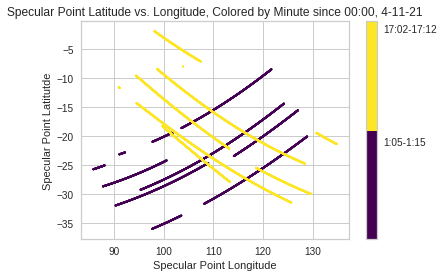

In [ ]:
#call the function that will plot specular point latitude against specular point longitude and color by # of minutes since the start of the day
#Note: this function allows the user to specify which sampling interval to plot, by starting/ending sample index
###in this cell, we will just plot all the samples across all timestamps and DDMs
start_sample_index = 0
end_sample_index = 2415
location_time_plot(cyg_data_set, start_sample_index, end_sample_index)

Here we can see that two CYGNSS satellites took Delay Doppler Map measurements across two time intervals, each logging four Delay Doppler Maps (from four specular points) every half second for each of those two intervals. Now, we examine four of the thousands of Delay Doppler Maps in the CYGNSS single file dataset, to get a sense of how different they can be to one another.

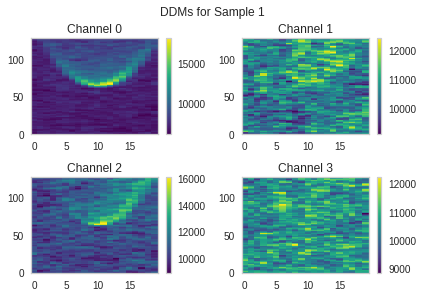

In [ ]:
##looking at the DDMs for sample index 1:
sample_in = 1
ddm_plots(cyg_data_set, sample_in)
del sample_in

It's clear that the DDM can give a few broad types of images. One is the well-defined parabola, as seen in the DDM for channel 0 above. Another is the less well-defined parabola. The third is a more scrambled image, as seen in the DDMs for channels 1 and 3 in this sample. The last, not seen in this particular sample, is the occurence of a single, bright specular point, surrounded by dark blue, as with this DDM:

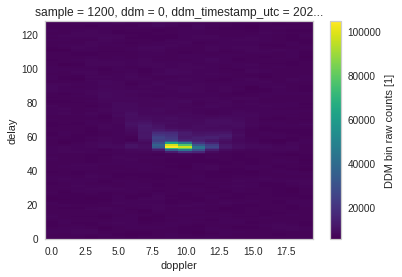

In [ ]:
cyg_data_set.sel(sample=1200, ddm = 0)['raw_counts'].plot()

Interestingly, there are a few unusuable Delay Doppler Maps recorded by the satellites, usually at the beginning of major sampling time intervals. In this set, we have four such DDMs at the very start of the dataset (sample 0), and another four at sample 1206, the start of the second sampling/time interval for the day. We look at the one from sample 0:

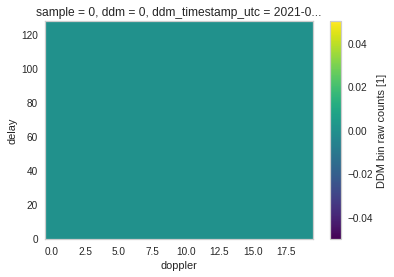

In [ ]:
cyg_data_set.sel(sample=0, ddm=0)['raw_counts'].plot()

Further down, this dataset is processed through several functions that remove different types of junk/missing data, this type included.

### ECWMF data

Exploring the ECWMF Wind Speed/Wave Height Background Files (associated with Aprill 11)

In [ ]:
# Importing netCDF files with background wind speed data for April 11, 2021
##first, must reset pathTeam to exclude Ben_path information:
pathTeam = cwd + '/drive/My Drive/'
##Check to add professor's path
if os.path.exists(pathTeam + pathProfessor):
 pathTeam += pathProfessor
pathTeam += David_path # Should be a shortcut (Links to an external site.) to Team's shared folder
os.listdir(pathTeam)

['cyg_firstfile_sps.pkl',
 'cyg.ddmi.s20210411-010506-e20210411-171248.l1.power-brcs-full.a30.d31.nc',
 'ecmwf.t00z.pgrb.0p125.f000_2021041100.nc',
 'ecmwf.t12z.pgrb.0p125.f000_2021041112.nc',
 'ecmwf.t18z.pgrb.0p125.f000_2021031118.nc',
 'CYGNSS_0311.pkl',
 'CYGNSS_0411.pkl',
 'CYGNSS_Background_Collocated_20210311.nc',
 'modeling_dataset.nc',
 'wValues_20210311.pkl',
 'ML_data_sample2.pkl',
 'wValues_20210411.pkl',
 'wValues_20210411_sample.pkl',
 'ML_data.pkl']

In [ ]:
# Importing netCDF files with background wind speed data for April 11, 2021
# Adding speed column to dataset
ds00 = xr.open_dataset(f'{pathTeam}ecmwf.t00z.pgrb.0p125.f000_2021041100.nc')
ds00 = ds00.assign(SPD = np.sqrt(ds00.U10m**2 + ds00.V10m**2)) # Calculates wind speed for analysis
ds00.info

<bound method Dataset.info of <xarray.Dataset>
Dimensions:  (x: 1441, y: 2880)
Coordinates:
    lat      (x) float32 ...
    lon      (y) float32 ...
Dimensions without coordinates: x, y
Data variables:
    U10m     (x, y) float32 10.57 10.57 10.57 10.57 ... -0.8188 -0.8188 -0.8188
    V10m     (x, y) float32 4.126 4.126 4.126 4.126 ... 5.423 5.423 5.423 5.423
    SWH      (x, y) float32 ...
    SPD      (x, y) float32 11.35 11.35 11.35 11.35 ... 5.484 5.484 5.484 5.484
Attributes:
    description:  Weather related data.>

This dataset is a 2D dataset with the zonal and meridonal wind speed vectors and significant wave height values for every latitude and longitude pair in 1/8 incriments on April 11, 2021.  The wind speed variable was added in the notebook because wind speed can be useful for visual data analysis.

The team coded a function that generates 5 or 6 plots (depending on the boolean passed in the function parameter 'overlay') for a region surrounding input coordinates.

Plot 1: Shows a U10m vs V10m scatter plot and prints the correlation between the two variables in the plot title

Plot 2: Shows a plot with the ECWMF grid layout in blue and the input coordinates as a red dot.  The distance from the input corrdinates to the nearest grid point is printed in the title

Plot 3: Shows a significant wave height boxplot.  The title has the mean and standard deviation of the SWH values in the region.

Plot 4: Shows a wind speed histogram.  The title has the mean and standard deviation of the wind speed in the region.

Plot 5: Shows a vector map of wind speed plotted over a contour map for SWH for the region.  By changing the value passed in the function through the parameter 'alpha = ', you can adjust the transparancy of the SWH contour plot.  The value must be in the range (0, 1].  Based on the pattern shows, it appears like this area is over a spiraling wind pattern and that wind patter has caused the SWH to be higher near the center of the wind pattern.

Note: If 'overlay = True' is passed into the function, Plot 5 splits into two plots and displays the wind speed vector map and SWH contour map seperately.  



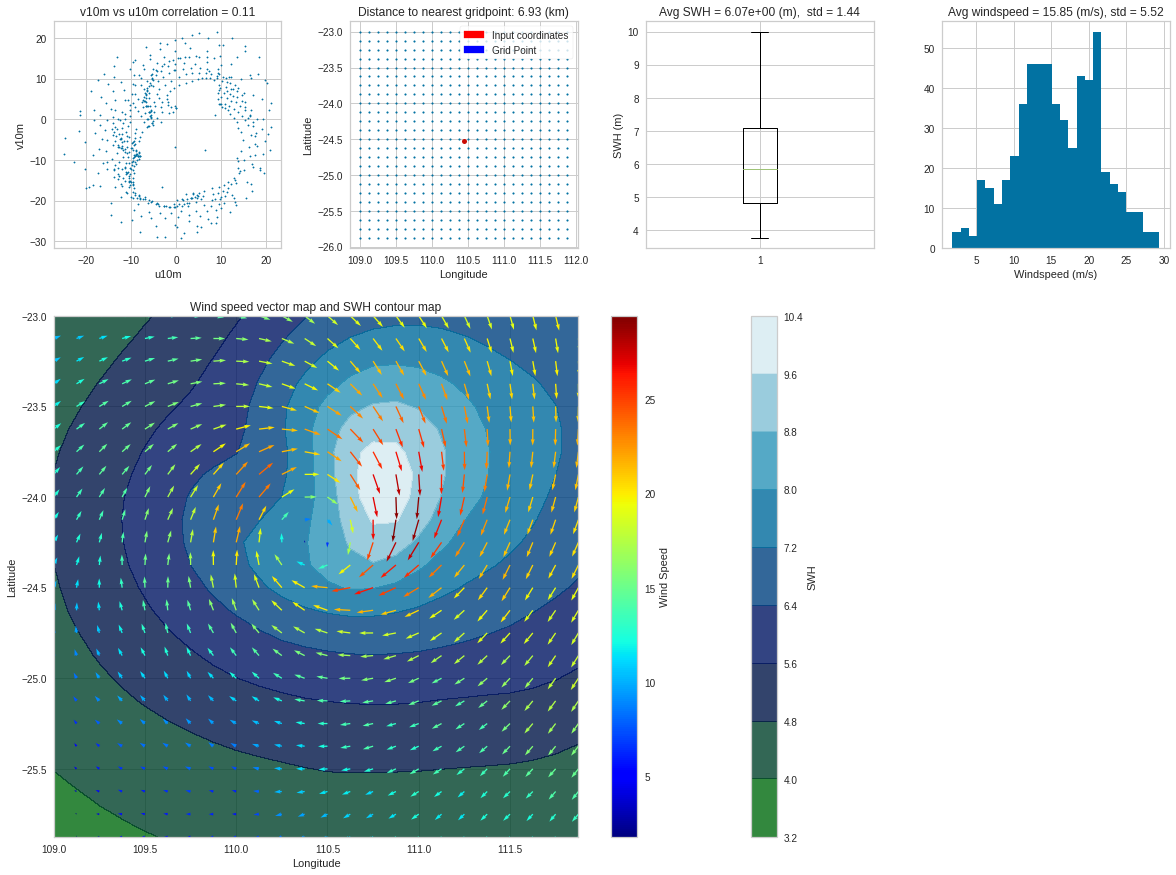

In [ ]:
vizualize_region(ds00, -24.53, 110.44, alpha=0.8)

Plot 1: The correlation between the V10m and U10m variables for this region is 0.11.  This indicates that there is not a strong correlation between the two variables in this region.

Plot 2:  Shows where the input coordinates are in relation to the background grid.  The distance from the input coordinates to the nearest grid point is 6.93 km.  

Plot 3: The average SWH for this region is 6.07 meters with a standard deviation of 1.44.  The median of this boxplot appears to be a little under 6.  The mean is higher than the median which indicates that the data is positively skewed.

Plot 4: There is an average windspeed of 15.85 m/s with a standard deviation of 5.52 for the region.  The histogram shows a bimodal distribution.  It is possible that the wind vortex in the region (visualized in plot 5) is causing this bimodal distribution since the windspeeds act differently towards the center of the vortex when compared to the rest of the region.

Plot 5: The SWH contour and wind speed vector map show how these two variables interact with each other.  This plot shows that the areas with higher SWH values tend to have a stronger wind blowing above.  This also demonstrates that the 'eye of the storm' is fairly calm compared to its surrounding region as the wind speed vectors dramatically lower at the center of the vortex than they are in the area immediately surrounding.

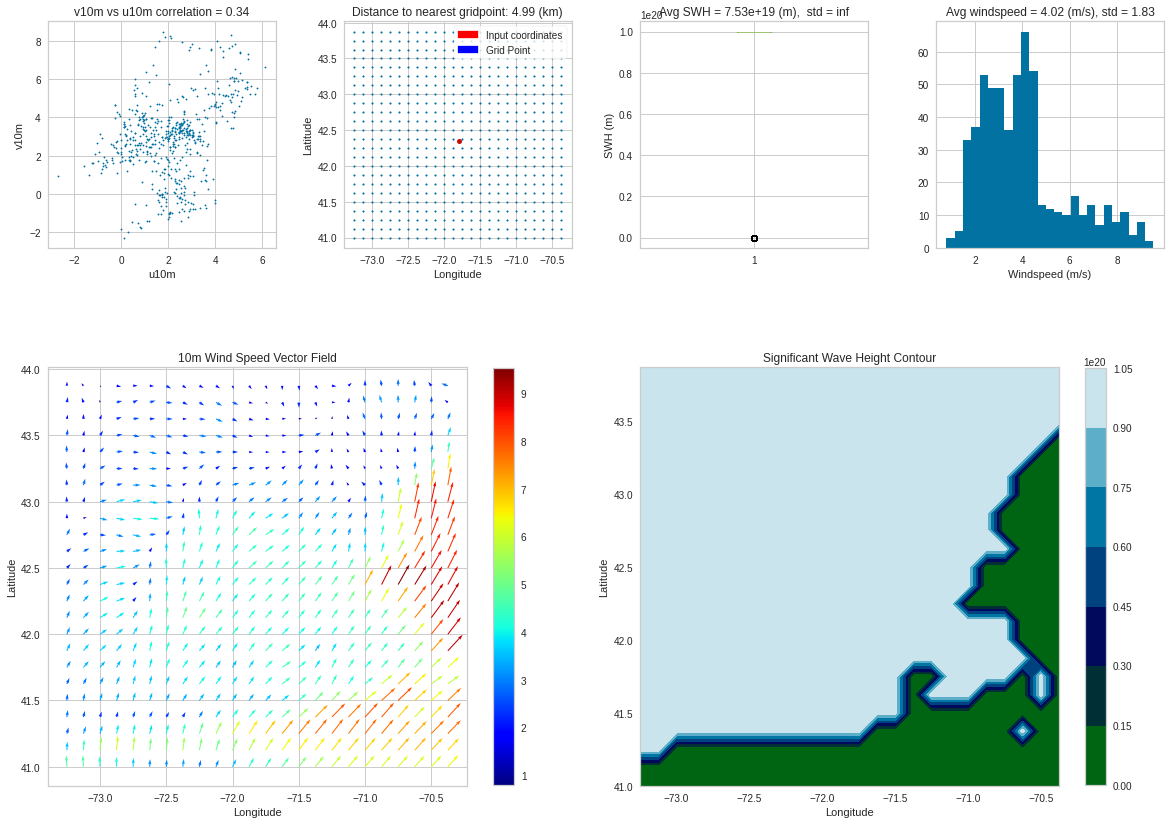

In [ ]:
vizualize_region(ds00, 42.3467, -71.7972, overlay = False)

Plot 1:  The correlation between V10m and U10m for this region.  Due to a difference in temperature and pressure between the ocean and land, wind tends to blow from a body of water to a land mass during the day, and from a land mass to a body of water at night. [Link](https://en.wikipedia.org/wiki/Sea_breeze).  The higher correlation in this region could be due in part to the pecense of a coastline (visualized in plot 6).

Plot 2:  Shows where the input coordinates are in relation to the background grid.  The distance from the input coordinates to the nearest grid point is 4.99 km.

Plot 3:  The boxplot of SWH demonstrates something strange happening with the data, as the mean value is 7.54e19 m.  The findings and how the team handled this is discussed further below.

Plot 4: The average windspeed for the region is 4.02 m/s with a standard deviation of 1.83.  This histogram is unimodal and positively skewed.

Plot 5:  The wind speed vector field shows calm winds in general.  The bottom right area of the plot shows some stronger winds.  This is likely due to the fact that the coastline is in that area of the region.  

Plot 6:  The SWH contour plot again shows an issue with the data as the color scale has a maximum value of 1e20.  Visually, some conclusions can still be drawn.  The difference in SWH is due to the fact that both land and water appear in the region.  This plot shows the coastline present in the region.  The water is colored green, and the land is colored light blue.

Note: This region might be more interesting to analyze with overley set to True, however, the team wanted to demonstrate that functionality so the region was analyzed with overlay set to False.

As shown in plots 3 and 6 of the visualization above, there are SWH values in the dataset with unreasonable values.  What the team found was that ECWMF uses the value 1e20 in place of a Null value.  This convention from ECWMF required action from the team before the interpolation process could begin.  In order to interpolate the SWH values, the definition of the search neighborhood needed to be adjusted.  If a specular point has a grid point in the serach neighborhood that is over land, there will be a 1e20 value recorded for SWH.  To account for this, the team omitted all grid points in the search area that have a SWH value of 1e20 when interpolating SWH values.  In the case that the search neighborhood for the specular point has no usable grid points for SWH, the value is set to np.nan per the request of the project mentor.  Additional functionality was added to the interpolation function late in the process that allowed the team to track the proportion of observations with a SWH search neighborhood affected by this fact.  The team tracked 84,042 observations over 5 days and found that around 15% of the observations had less than 4 neighbors in the search neighborhood for interpolating SWH.  A summary of this process is shown in the table below.

Value | 4 Neighbors | 3 Neighbors | 2 Neighbors | 1 Neighbors | 0 Neighbors |
------|-------------|-------------|-------------|-------------|-------------|
U10m  |1.00|0|0|0|0|
V10m  |1.00|0|0|0|0|
SWH   |0.84|0.10|0.08|0.07|0.13

## Data Collocation

First, the team needed to interpolate the Wind Speed/Wave Height Background Data on some geometric/location principle, so we could get just one wind speed and wave height value per DDM. This entailed getting a list of the timestamps and latitude/longitude of all specular points in the CYGNSS file extracted:

In [ ]:
#build a list of CYGNSS file timestamps/lats/lons for use in the background grid interpolation process
latlon_frame = collect_latlons(cyg_data_set)

This dataframe was then transfered between team members as a pickle file, for interpolation of wind speed/wave height data.

### Interpolation

**Interpolation of the Background Wind Grid Data in Advance of Collocation with the Original CYGNSS Dataset:**

The first step for interpolation was to open and understand the structure of the timestamp pickle file that was generated above.  

In [ ]:
ds_cord = pd.read_pickle(f'{pathTeam}CYGNSS_0411.pkl')
ds_cord

timestamp               sp_lat              sp_lon
0    2021-04-11 01:05:06.499261678   -31.94055938720703   90.30609893798828
1    2021-04-11 01:05:06.499261678   -25.70931053161621   85.83236694335938
2    2021-04-11 01:05:06.499261678  -28.654094696044922     87.773681640625
3    2021-04-11 01:05:06.499261678   -23.13581657409668   91.06610870361328
4    2021-04-11 01:05:06.999261612  -31.931716918945312   90.33650970458984
...                            ...                  ...                 ...
9659 2021-04-11 17:12:47.999261690   -24.73063087463379  128.42019653320312
9660 2021-04-11 17:12:48.499261605   -29.96910858154297   129.6576385498047
9661 2021-04-11 17:12:48.499261605   -21.37551498413086  134.84649658203125
9662 2021-04-11 17:12:48.499261605  -31.438047409057617  125.68804931640625
9663 2021-04-11 17:12:48.499261605  -24.740629196166992   128.4476318359375

[9664 rows x 3 columns]

The pickle file loads as a pandas dataframe with the variable's 'timestamp', 'sp_lat', and 'sp_lon.'  The goal will be to interpolate U10m, V10m, and SWH based on the sp_lat and sp_lon varibales.

The next thing the team did in their efforts to interpolate the wind speed and wave height data for the CYGNSS specular point locations was to code a funcion that finds the closest ECMWF data collection point to a CYGNSS specular point.  This function will work with any input latitude and longitude cordinates but was not used in that manner.

In [ ]:
spec_values_nearest(ds00, ds_cord['sp_lat'][0], ds_cord['sp_lon'][0])

(2.306, 4.751, 2.533)

The function above returns a tuple with the U10m, V10m, and SWH values of the ECWMF data collection point closest to the first specular point in the CYGNSS data set for April 11th, 2021.  While this is not the most accurate way to assign these values to the specular point locations, this was useful in motivating the function used to interpolate the desired data for each specular point.

The team did not get all the ECMWF datasets needed initially.  In order to save time, the team coded a function that will read the CYGNSS timestamp pickle file for a date and print out what ECMWF files are needed to run the interpolation function.  

In [ ]:
ecmwf_check(4, 11)

Need ECMWF file: ecmwf.t00z.pgrb.0p125.f000_2021041100.nc
Need ECMWF file: ecmwf.t12z.pgrb.0p125.f000_2021041112.nc


Once the team was able to confirm that the proper files were uploaded, they were prepared to interpolate the data for that day.

**WARNING** the function below takes around 3 minutes and 30 seconds to execute for April 11, 2021.

In [ ]:
interpolate_date(4, 11)

ds00 was loaded
ds12 was loaded


100%|██████████| 9664/9664 [04:12<00:00, 38.29it/s]



               lat          lon        wU10m        wV10m         wSWH
count  9664.000000  9664.000000  9664.000000  9664.000000  7824.000000
mean    -21.149852   109.690522     1.020228     1.916744     2.615569
std       6.789308    10.319270     4.328611     5.575101     0.699901
min     -35.971329    85.832367    -7.593077   -13.718920     0.146045
25%     -26.438673   101.445791    -2.585555    -1.796945     2.293432
50%     -21.540831   108.835327     0.975676     1.727017     2.700940
75%     -16.813571   118.226568     4.065569     6.893683     2.964786
max      -1.941648   134.846497    11.554374    12.180312     4.827818

Neighbor count for U10m:
4    9664
Name: U10m_neighbor, dtype: int64
Neighbor count for V10m:
4    9664
Name: V10m_neighbor, dtype: int64
Neighbor count for SWH:
0    1840
1      32
2      65
3      47
4    7680
Name: SWH_neighbor, dtype: int64


Functionality was added to the code to allow for a subset of the data to be run through the interpolate_date function.  By passing 'subset = True' into the function, only the first n observations will be interpolated.  The value n is set to a default value of 500 but can be adjusted by passing 'len_subset = n' to the interpolate_date function. Interpolation of the first 500 observations of this dataset only takes around 11 seconds

In [ ]:
interpolate_date(4, 11, subset = True)

ds00 was loaded
ds12 was loaded


100%|██████████| 500/500 [00:12<00:00, 38.93it/s]



              lat         lon       wU10m       wV10m        wSWH
count  500.000000  500.000000  500.000000  500.000000  500.000000
mean   -29.330124   92.031972   -3.290570    7.005655    2.693062
std      3.723712    3.935408    3.345849    1.127885    0.222715
min    -35.971329   85.832367   -7.041207    4.651071    2.232990
25%    -31.555711   88.989885   -5.412166    6.222458    2.581645
50%    -28.650121   91.321507   -4.385120    7.027007    2.750525
75%    -25.707332   94.006428   -2.959006    7.537441    2.840100
max    -22.797634  100.089447    5.582742    9.521032    3.014740

Neighbor count for U10m:
4    500
Name: U10m_neighbor, dtype: int64
Neighbor count for V10m:
4    500
Name: V10m_neighbor, dtype: int64
Neighbor count for SWH:
4    500
Name: SWH_neighbor, dtype: int64


The printout for this funcion has 3 sections.  The first section shows the ECMWF files needed.  In this case, the files loaded match the files needed as found by the 'ecmwf_check' function.  The second part of the printout tracks the loop's progress.  The third part of the printout a summary of the new dataset.  This summary shows no strange or unexpected values, so the interpolation process proceeded as planned. This process was done for all 45 days of data provided to the team.  As the datasets with the interpolated data were completed, the collocation process began.

In [ ]:
del ds00, ds_cord # Deleting uneeded global variales

### Collocation

Joining the Interpolated Wind/Wave Data Back into the Original CYGNSS Dataset:

In [ ]:
# Importing the interpolated wind data
##reset pathTeam to exclude David_path information
pathTeam = cwd + '/drive/My Drive/'
##Check to add professor path
if os.path.exists(pathTeam + pathProfessor):
 pathTeam += pathProfessor
pathTeam += Ben_path # Should be a shortcut (Links to an external site.) to Team's shared folder
os.listdir(pathTeam)

['cyg_firstfile.nc',
 'all_data_CYGNSS_0411.nc4',
 'all_data_CYGNSS_0411B.nc4',
 'ddm_screenshot.png',
 'CYGNSS_Background_Collocated_20210411.nc',
 'set_4_11_RMS_av.nc',
 'modeling_dataset.nc',
 'wValues_20210411.pkl']

In [ ]:
#read in the dataframe of interpolated wind/wave values created in the previous section
coll_set = pd.read_pickle(f'{pathTeam}wValues_20210411.pkl')

All that remained was for the interpolated data to be joined back into the original xarray CYGNSS dataset:

In [ ]:
#Now, we combined that interpolated data back into the original CYGNSS dataset
set_to_coll = cyg_data_set
collocated_set = integrate_sets(set_to_coll, coll_set)
collocated_set

<xarray.Dataset>
Dimensions:            (ddm: 4, delay: 128, doppler: 20, sample: 2416)
Coordinates:
  * sample             (sample) int32 0 1 2 3 4 5 ... 2411 2412 2413 2414 2415
  * ddm                (ddm) int8 0 1 2 3
    ddm_timestamp_utc  (sample) datetime64[ns] 2021-04-11T01:05:06.499261678 ...
    sp_lat             (sample, ddm) float32 -31.94 -25.71 ... -31.44 -24.74
    sp_lon             (sample, ddm) float32 90.31 85.83 87.77 ... 125.7 128.4
Dimensions without coordinates: delay, doppler
Data variables:
    spacecraft_id      (sample) float32 249.0 249.0 249.0 ... 55.0 55.0 55.0
    spacecraft_num     (sample) float32 2.0 2.0 2.0 2.0 2.0 ... 7.0 7.0 7.0 7.0
    ddm_sample_index   (sample) float64 7.812e+03 7.813e+03 ... 1.239e+05
    prn_code           (sample, ddm) float32 8.0 3.0 22.0 16.0 ... 5.0 25.0 24.0
    raw_counts         (sample, ddm, delay, doppler) float64 ...
    wU10m              (sample, ddm) float64 -2.678 -5.944 ... -4.316 -4.25
    wV10m              (sample, ddm) float64 6.087 7.058 6.24 ... -1.947 -1.136
    wSWH               (sample, ddm) float64 2.624 3.01 2.753 ... nan nan nan
Attributes: (12/28)
    Conventions:               CF-1.6, ACDD-1.3, ISO-8601
    project:                   CYGNSS
    featureType:               trajectory
    summary:                   CYGNSS is a NASA Earth Venture mission, manage...
    program:                   CYGNSS
    references:                Ruf, C., P. Chang, M.P. Clarizia, S. Gleason, ...
    ...                        ...
    time_coverage_duration:    P0DT16H7M42S
    version_id:                3.0
    title:                     CYGNSS Level 1 Full Delay Doppler Map Data Rec...
    ShortName:                 CYGNSS_L1_FULL_DDM_V3.0
    id:                        PODAAC-CYGNS-L1F30
    netcdf_version_id:         4.3.3.1 of Dec 10 2015 16:44:18 $

So we see that we now have the original CYGNSS dataset, but this time with background wind/wave data, interpolated as a weighted average of wind/wave values around each specular point, all saved in their respective new variables.

### Data Cleaning after Collocation

Now it remained for the team to remove 'junk' (all zero DDM) samples, as well as samples with significant wave height data that was simply missing (as associated specular point may be on land):

In [ ]:
##clean the collocated set of its 'junk' DDM samples:
collocated_clean = collocated_set.where(collocated_set['raw_counts']!= 0)
collocated_clean = collocated_clean.dropna(dim = 'sample')
collocated_clean

<xarray.Dataset>
Dimensions:            (ddm: 4, delay: 128, doppler: 20, sample: 1354)
Coordinates:
  * sample             (sample) int32 1 2 3 4 5 6 ... 2010 2011 2012 2013 2014
  * ddm                (ddm) int8 0 1 2 3
    ddm_timestamp_utc  (sample) datetime64[ns] 2021-04-11T01:05:06.999261612 ...
    sp_lat             (sample, ddm) float32 -31.93 -25.7 ... -26.32 -20.16
    sp_lon             (sample, ddm) float32 90.34 85.86 87.8 ... 114.5 117.8
Dimensions without coordinates: delay, doppler
Data variables:
    spacecraft_id      (sample, ddm, delay, doppler) float32 249.0 ... 55.0
    spacecraft_num     (sample, ddm, delay, doppler) float32 2.0 2.0 ... 7.0 7.0
    ddm_sample_index   (sample, ddm, delay, doppler) float64 7.813e+03 ... 1....
    prn_code           (sample, ddm, delay, doppler) float32 8.0 8.0 ... 24.0
    raw_counts         (sample, ddm, delay, doppler) float64 6.974e+03 ... 9....
    wU10m              (sample, ddm, delay, doppler) float64 -2.678 ... 4.529
    wV10m              (sample, ddm, delay, doppler) float64 6.087 ... -0.4586
    wSWH               (sample, ddm, delay, doppler) float64 2.624 ... 2.092
Attributes: (12/28)
    Conventions:               CF-1.6, ACDD-1.3, ISO-8601
    project:                   CYGNSS
    featureType:               trajectory
    summary:                   CYGNSS is a NASA Earth Venture mission, manage...
    program:                   CYGNSS
    references:                Ruf, C., P. Chang, M.P. Clarizia, S. Gleason, ...
    ...                        ...
    time_coverage_duration:    P0DT16H7M42S
    version_id:                3.0
    title:                     CYGNSS Level 1 Full Delay Doppler Map Data Rec...
    ShortName:                 CYGNSS_L1_FULL_DDM_V3.0
    id:                        PODAAC-CYGNS-L1F30
    netcdf_version_id:         4.3.3.1 of Dec 10 2015 16:44:18 $

We can see that two samples have been removed for containing useless DDMs. Because the second code line in the previous cell removes all samples with any 'NaN' values, it eliminated all samples with junk DDMs or with any 'nan' values for significant wave height.

So it seems that for April 11, 2021, 1354 samples were retained with all clean and collocated data.

The team repeated the collocated and cleaning process for nearly every CYGNSS FULL DDM file NASA had available for samples taken from March 1 - Sep 1 of 2021. This collocated database is saved as a collection of netCDF files, accessible through a google drive shortcut in the Spire project folder, under 'Spire_Clean_Collocated'.

The collocated/cleaned database contains 45 files in all, with the total amount of data retained after cleaning being 76.15% of the original, uncleaned CYGNSS data.

In [ ]:
del collocated_clean

## DDM Calibration

Once the team had managed to interpolate/collocate the background wind/wave data for each CYGNSS set of interest, we proceeded to process/find all the desired calibrations of the DDM data we would eventually seek to model with. This section demonstrates the processing of all those calibrations and their inclusion as variables in the greater dataset for just the date 4/11/21.

**IMPORTANT NOTE**: Even though we demonstrated the cleaning process on the collocated data we made available to Spire in the previous section, it is necessary for files we wanted to callibrate DDMs for (and model with) that all samples be retained in their original order from CYGNSS, if the NBRCS/LES retrieval function is to work properly. Hence, we start this section by reading in the original, uncleaned collocated 4/11/21 dataset, and then we clean it of junk DDMs and 'nan' significant wave height values later on in this section (after retrieval of NBRCS/LES values has been performed).

###DDM Average Calculation

In [ ]:
#first, we open the datafile that has collocated wind/wave data for 4/11
data_set_411 = collocated_set
del collocated_set

First, we calculated the simple DDM average calibration- a simple average of raw counts values in a 10 x 5 area around the specular point bin of each DDM:

In [ ]:
##NOTE: This cell takes approximately 30 seconds to execute
sample_first = data_set_411.isel(sample=0)['sample']
##the following values are to set the limits on delay and doppler for our 10x5 area averages
delay_start = 60
delay_end = 70
doppler_start = 8
doppler_end = 13
data_set_411 = DDM_averages(data_set_411,sample_first,delay_start,delay_end,doppler_start,doppler_end)
del sample_first, delay_start, delay_end, doppler_start, doppler_end

In [ ]:
data_set_411

<xarray.Dataset>
Dimensions:            (ddm: 4, delay: 128, doppler: 20, sample: 2416)
Coordinates:
  * sample             (sample) int64 0 1 2 3 4 5 ... 2411 2412 2413 2414 2415
  * ddm                (ddm) int8 0 1 2 3
    ddm_timestamp_utc  (sample) datetime64[ns] 2021-04-11T01:05:06.499261678 ...
    sp_lat             (sample, ddm) float32 -31.94 -25.71 ... -31.44 -24.74
    sp_lon             (sample, ddm) float32 90.31 85.83 87.77 ... 125.7 128.4
Dimensions without coordinates: delay, doppler
Data variables:
    ddm_average        (sample, ddm) float64 0.0 0.0 0.0 ... 1.409e+04 6.56e+03
    spacecraft_id      (sample) float32 249.0 249.0 249.0 ... 55.0 55.0 55.0
    spacecraft_num     (sample) float32 2.0 2.0 2.0 2.0 2.0 ... 7.0 7.0 7.0 7.0
    ddm_sample_index   (sample) float64 7.812e+03 7.813e+03 ... 1.239e+05
    prn_code           (sample, ddm) float32 8.0 3.0 22.0 16.0 ... 5.0 25.0 24.0
    raw_counts         (sample, ddm, delay, doppler) float64 0.0 ... 6.032e+03
    wU10m              (sample, ddm) float64 -2.678 -5.944 ... -4.316 -4.25
    wV10m              (sample, ddm) float64 6.087 7.058 6.24 ... -1.947 -1.136
    wSWH               (sample, ddm) float64 2.624 3.01 2.753 ... nan nan nan
Attributes: (12/28)
    Conventions:               CF-1.6, ACDD-1.3, ISO-8601
    project:                   CYGNSS
    featureType:               trajectory
    summary:                   CYGNSS is a NASA Earth Venture mission, manage...
    program:                   CYGNSS
    references:                Ruf, C., P. Chang, M.P. Clarizia, S. Gleason, ...
    ...                        ...
    time_coverage_duration:    P0DT16H7M42S
    version_id:                3.0
    title:                     CYGNSS Level 1 Full Delay Doppler Map Data Rec...
    ShortName:                 CYGNSS_L1_FULL_DDM_V3.0
    id:                        PODAAC-CYGNS-L1F30
    netcdf_version_id:         4.3.3.1 of Dec 10 2015 16:44:18 $

We can see that the ddm averages have been calculated and added back into our dataset.

###RMS Ratio Calculation

Next, we calculated the RMS ratio values (the highest power value for a given DDM divided by the Root Mean Square of the rest of the power values).Again, the team and instructor considered that it might be a useful statistic for eventual modeling:

In [ ]:
##calculate RMS ratio values for each DDM to include as a column in set_4_11
###first, build RMS ratio index as a dataframe
###then, combine content of dataframe back into CYGNSS dataset
###NOTE: The warnings that arise as this cell executes occur when there are junk DDMs (all 0 power values), since division by zero is impossible
###However, samples with these DDMs are removed further down in this calibration/data preparation process
###WARNING: takes a few minutes to run on a dataset with 2416 samples
###NOTE: To test this function on a smaller set of data the user could first slice off a smaller partition of samples,
###CONTINUED: And then process the smaller set through the functions
###CONTINUED: Using the following 3 lines of code (here commented out):
### data_set_partition = data_set_411.sel(sample = slice(starting_sample, ending_sample))
### RMS_Ratio_index = RMS_ratio_index(data_set_partition)
### data_set_partition = return_ratio_set(data_set_partition, RMS_Ratio_index)
RMS_Ratio_index = RMS_ratio_index(data_set_411)
data_set_411 = return_ratio_set(data_set_411, RMS_Ratio_index)
data_set_411

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:544: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:544: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:544: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:544: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:544: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:544: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:544: RuntimeWarning: invalid value encountered in double_scalars


<xarray.Dataset>
Dimensions:            (ddm: 4, delay: 128, doppler: 20, sample: 2416)
Coordinates:
  * sample             (sample) int64 0 1 2 3 4 5 ... 2411 2412 2413 2414 2415
  * ddm                (ddm) int64 0 1 2 3
    ddm_timestamp_utc  (sample) datetime64[ns] 2021-04-11T01:05:06.499261678 ...
    sp_lat             (sample, ddm) float32 -31.94 -25.71 ... -31.44 -24.74
    sp_lon             (sample, ddm) float32 90.31 85.83 87.77 ... 125.7 128.4
Dimensions without coordinates: delay, doppler
Data variables:
    RMS ratio          (sample, ddm) float64 nan nan nan ... 1.209 3.871 1.03
    ddm_average        (sample, ddm) float64 0.0 0.0 0.0 ... 1.409e+04 6.56e+03
    spacecraft_id      (sample) float32 249.0 249.0 249.0 ... 55.0 55.0 55.0
    spacecraft_num     (sample) float32 2.0 2.0 2.0 2.0 2.0 ... 7.0 7.0 7.0 7.0
    ddm_sample_index   (sample) float64 7.812e+03 7.813e+03 ... 1.239e+05
    prn_code           (sample, ddm) float32 8.0 3.0 22.0 16.0 ... 5.0 25.0 24.0
    raw_counts         (sample, ddm, delay, doppler) float64 0.0 ... 6.032e+03
    wU10m              (sample, ddm) float64 -2.678 -5.944 ... -4.316 -4.25
    wV10m              (sample, ddm) float64 6.087 7.058 6.24 ... -1.947 -1.136
    wSWH               (sample, ddm) float64 2.624 3.01 2.753 ... nan nan nan
Attributes: (12/28)
    Conventions:               CF-1.6, ACDD-1.3, ISO-8601
    project:                   CYGNSS
    featureType:               trajectory
    summary:                   CYGNSS is a NASA Earth Venture mission, manage...
    program:                   CYGNSS
    references:                Ruf, C., P. Chang, M.P. Clarizia, S. Gleason, ...
    ...                        ...
    time_coverage_duration:    P0DT16H7M42S
    version_id:                3.0
    title:                     CYGNSS Level 1 Full Delay Doppler Map Data Rec...
    ShortName:                 CYGNSS_L1_FULL_DDM_V3.0
    id:                        PODAAC-CYGNS-L1F30
    netcdf_version_id:         4.3.3.1 of Dec 10 2015 16:44:18 $

Note: The RMS ratio value was set equal to 'nan' by the function for the first (and 1206th) samples because the DDMs at this point of this section and at those samples are junk, with all power values still set to zero, so RMS ratio = 0 and division by zero is impossible. This doesn't really matter, as those samples will be dropped by a cleaning command further down. The only reason we didn't drop them already is, again, because it is necessary to retain all original samples until for the NBRCS/LES retrieval function to work properly.

###NBRCS/LES Retrieval

Next, we found the NASA files containing NBRCS and LES values corresponding to these samples/this date, and worked NBRCS and LES into the dataset as well. NOTE: samples in our set were taken by two separate satellites (hence the two separate sampling intervals), so it became necessary to perform this data match-up in two halves, to avoid writing a function that would need to search through 170,000 samples in the NASA file.

In [ ]:
###bring in NBRCS and LES values for these DDMs (from NASA's CYGNSS ALL DATA dataset)
##start by reading in data from that larger CYGNSS Lv1 file
##open file containing nbrcs data and les data
##again this file can be found in the 'Files needed to run' folder
all_data_set = xr.open_dataset(f'{pathTeam}all_data_CYGNSS_0411.nc4')

The first sampling interval runs from sample 0 to sample 1205, so we isolate those samples. In the NASA dataset, the corresponding samples run from sample indexes 7812 to 9017, so we isolate those samples and bring their NBRCS and LES values into the original set.

In [ ]:
#extract first sampling interval's nbrcs/les values
first_half_set = NBRCS_LES_vals(all_data_set, data_set_411, 7812, 9017, 0, 1205)

The second sampling interval runs from sample 1206 to sample 2415. In the NASA dataset, the corresponding samples run from sample indexes 122727 to 123936. We isolate those samples and bring their NBRCS and LES values into the original set. We must read in a new NASA file however, as there is a separate file for the different satellite.

In [ ]:
#open the dataset for the second satellite for 4/11 since our dataset's second time interval's samples were taken by a different satellite
all_data_set = xr.open_dataset(f'{pathTeam}all_data_CYGNSS_0411B.nc4')

In [ ]:
second_half_set = NBRCS_LES_vals(all_data_set, data_set_411, 122727, 123936, 1206, 2415)

In [ ]:
#combine the two half sets into one set, with original sample values and nbrcs/les included as variables
data_set_411 = xr.combine_by_coords([second_half_set, first_half_set])
data_set_411

<xarray.Dataset>
Dimensions:            (ddm: 4, delay: 128, doppler: 20, sample: 2416)
Coordinates:
  * sample             (sample) int64 0 1 2 3 4 5 ... 2411 2412 2413 2414 2415
  * ddm                (ddm) int64 0 1 2 3
    ddm_timestamp_utc  (sample) datetime64[ns] 2021-04-11T01:05:06.499261678 ...
    sp_lat             (sample, ddm) float32 -31.94 -25.71 ... -31.44 -24.74
    sp_lon             (sample, ddm) float32 90.31 85.83 87.77 ... 125.7 128.4
Dimensions without coordinates: delay, doppler
Data variables:
    RMS ratio          (sample, ddm) float64 nan nan nan ... 1.209 3.871 1.03
    ddm_average        (sample, ddm) float64 0.0 0.0 0.0 ... 1.409e+04 6.56e+03
    spacecraft_id      (sample) float32 249.0 249.0 249.0 ... 55.0 55.0 55.0
    spacecraft_num     (sample) float32 2.0 2.0 2.0 2.0 2.0 ... 7.0 7.0 7.0 7.0
    ddm_sample_index   (sample) float64 7.812e+03 7.813e+03 ... 1.239e+05
    prn_code           (sample, ddm) float32 8.0 3.0 22.0 16.0 ... 5.0 25.0 24.0
    raw_counts         (sample, ddm, delay, doppler) float64 0.0 ... 6.032e+03
    wU10m              (sample, ddm) float64 -2.678 -5.944 ... -4.316 -4.25
    wV10m              (sample, ddm) float64 6.087 7.058 6.24 ... -1.947 -1.136
    wSWH               (sample, ddm) float64 2.624 3.01 2.753 ... nan nan nan
    nbrcs              (sample, ddm) float32 52.4 32.6 47.27 nan ... nan nan nan
    les                (sample, ddm) float32 9.207 26.38 11.62 ... nan nan nan
Attributes: (12/28)
    Conventions:               CF-1.6, ACDD-1.3, ISO-8601
    project:                   CYGNSS
    featureType:               trajectory
    summary:                   CYGNSS is a NASA Earth Venture mission, manage...
    program:                   CYGNSS
    references:                Ruf, C., P. Chang, M.P. Clarizia, S. Gleason, ...
    ...                        ...
    time_coverage_duration:    P0DT16H7M42S
    version_id:                3.0
    title:                     CYGNSS Level 1 Full Delay Doppler Map Data Rec...
    ShortName:                 CYGNSS_L1_FULL_DDM_V3.0
    id:                        PODAAC-CYGNS-L1F30
    netcdf_version_id:         4.3.3.1 of Dec 10 2015 16:44:18 $

Importantly, many of the NBRCS and LES values from the NASA set are 'nan'. NOTE: we did double check to make sure those values were given by NASA as 'nan' in the original set, so the 'nan' values there are not the result of any problem in our data match-up. However, it is useful to eliminate samples with any 'nan' values for NBRCS or LES:

###Removing Samples with NaNs

In [ ]:
##remove all samples with 'nan' for nbrcs/les/wSWH
##NOTE: This command also removed samples with junk DDMs (samples 0 and 1206), presumably because
##NASA did not calculate nbrcs/les for their all-zero DDMs.
data_set_411 = data_set_411.dropna(dim = 'sample')
data_set_411

<xarray.Dataset>
Dimensions:            (ddm: 4, delay: 128, doppler: 20, sample: 353)
Coordinates:
  * sample             (sample) int64 2 3 4 5 7 10 ... 1916 1935 1980 1988 2011
  * ddm                (ddm) int64 0 1 2 3
    ddm_timestamp_utc  (sample) datetime64[ns] 2021-04-11T01:05:07.499261492 ...
    sp_lat             (sample, ddm) float32 -31.92 -25.69 ... -26.28 -20.13
    sp_lon             (sample, ddm) float32 90.37 85.89 87.83 ... 114.5 117.7
Dimensions without coordinates: delay, doppler
Data variables:
    RMS ratio          (sample, ddm) float64 1.472 1.051 1.103 ... 17.49 2.787
    ddm_average        (sample, ddm) float64 1.192e+04 1.108e+04 ... 1.973e+04
    spacecraft_id      (sample) float32 249.0 249.0 249.0 ... 55.0 55.0 55.0
    spacecraft_num     (sample) float32 2.0 2.0 2.0 2.0 2.0 ... 7.0 7.0 7.0 7.0
    ddm_sample_index   (sample) float64 7.814e+03 7.815e+03 ... 1.235e+05
    prn_code           (sample, ddm) float32 8.0 3.0 22.0 ... 32.0 25.0 24.0
    raw_counts         (sample, ddm, delay, doppler) float64 7.148e+03 ... 9....
    wU10m              (sample, ddm) float64 -2.678 -5.578 ... 10.97 4.847
    wV10m              (sample, ddm) float64 6.087 7.245 6.24 ... -3.471 -0.5412
    wSWH               (sample, ddm) float64 2.624 3.003 2.753 ... 4.607 2.115
    nbrcs              (sample, ddm) float32 60.79 49.72 48.78 ... 407.3 95.07
    les                (sample, ddm) float32 16.27 4.084 10.16 ... -247.6 32.84
Attributes: (12/28)
    Conventions:               CF-1.6, ACDD-1.3, ISO-8601
    project:                   CYGNSS
    featureType:               trajectory
    summary:                   CYGNSS is a NASA Earth Venture mission, manage...
    program:                   CYGNSS
    references:                Ruf, C., P. Chang, M.P. Clarizia, S. Gleason, ...
    ...                        ...
    time_coverage_duration:    P0DT16H7M42S
    version_id:                3.0
    title:                     CYGNSS Level 1 Full Delay Doppler Map Data Rec...
    ShortName:                 CYGNSS_L1_FULL_DDM_V3.0
    id:                        PODAAC-CYGNS-L1F30
    netcdf_version_id:         4.3.3.1 of Dec 10 2015 16:44:18 $

In [ ]:
##delete superfluous variables from the NBRCS/LES gathering process:
del first_half_set, second_half_set, all_data_set

###Maximum Template Matching Coefficient Calculation

The dataset now has all DDM calibrations but one: Maximum Template Matching Coefficient. Also, there are no missing values for 'nbrcs' or 'les'. Our work to perform the matching began with choosing an image for an 'ideal' ddm template image and then choosing a Template Matching Method.

Though it has since been deleted for missing nbrcs/les values, the ddm for sample 1 had a fairly ideal parabolic pattern for a template matching template/ Fortunately, before the sample removal, we took a screenshot of this DDM for use as a template going forward. That file, 'ddm_screenshot.png' is included in the 'Files needed to run' folder.

In [ ]:
#convert to greyscale for better defined parabola
template_image = cv2.imread(f'{pathTeam}ddm_screenshot.png',0)

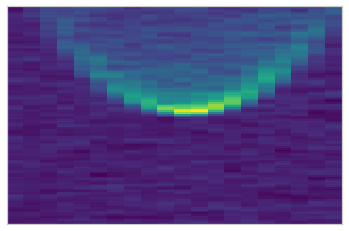

In [ ]:
#save a jpg of testing ddm for comparison
sample_selection = 1
ddm_selection = 0
prepare_test_image(data_set_411, sample_selection, ddm_selection)

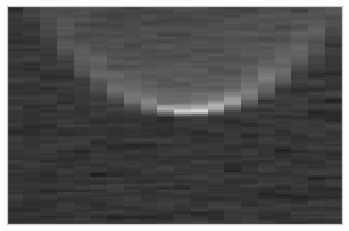

In [ ]:
##again, convert to greyscale
testing_image = cv2.imread('image_to_test.jpg',0)
cv2_imshow(testing_image)

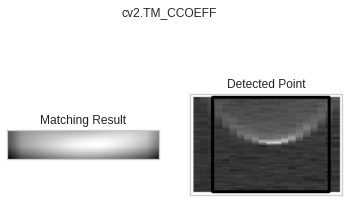

22076720.0


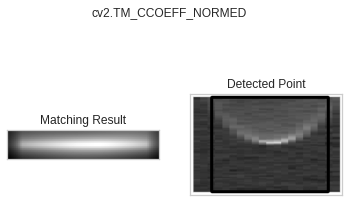

0.8426076173782349


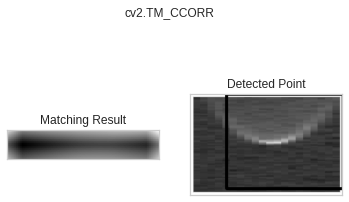

340363264.0


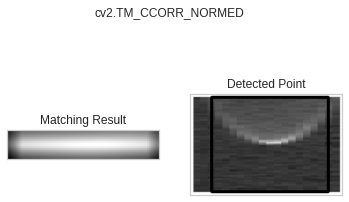

0.9862135648727417


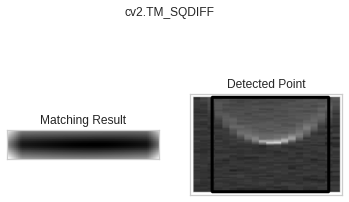

152599152.0


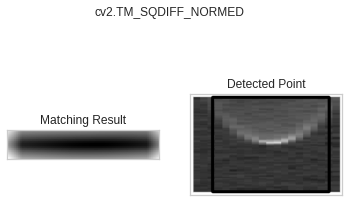

0.388353556394577


In [ ]:
##perform template matching
create_matching(template_image, testing_image)

We looked at DDMs that clearly didn't contain our template image, to show how much lower the maximum template matching coefficient would be:

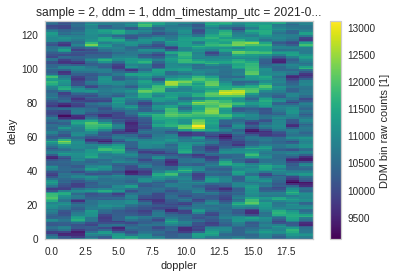

In [ ]:
##looking at a ddm much less similar to our template image
data_set_411.sel(sample = 2, ddm = 1)['raw_counts'].plot()

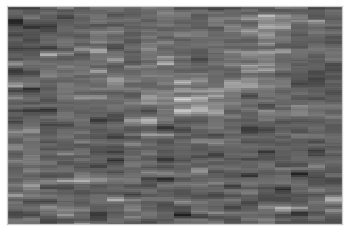

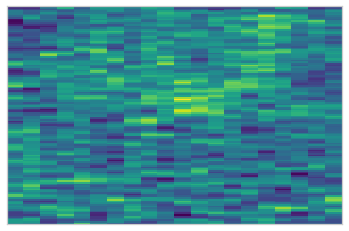

In [ ]:
##make this DDM our testing image:
sample_selection = 2
ddm_selection = 1
prepare_test_image(data_set_411, sample_selection, ddm_selection)
testing_image = cv2.imread('image_to_test.jpg',0)
cv2_imshow(testing_image)

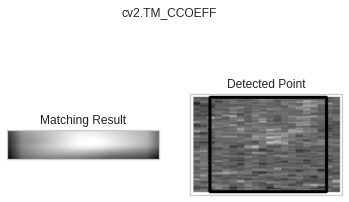

10982604.0


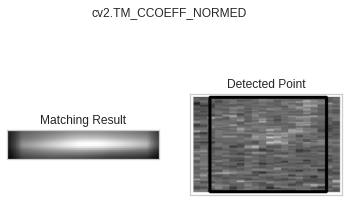

0.4474456310272217


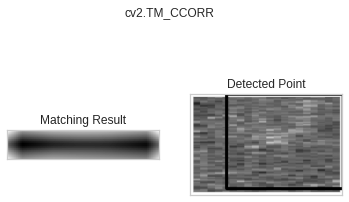

476446432.0


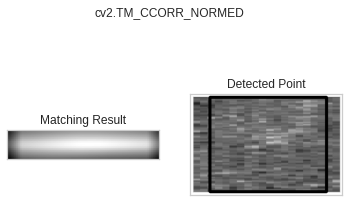

0.9665325880050659


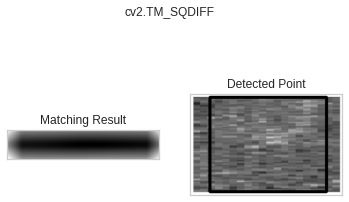

215148768.0


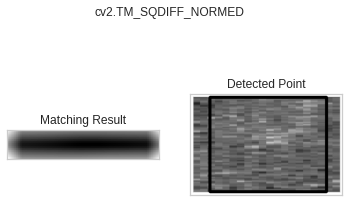

0.41299739480018616


In [ ]:
##perform template matching
create_matching(template_image, testing_image)

Predictably, the maximum template matching coefficient was lower for many of the matching algorithms in this case.

After template matching for all these methods across many DDMs, the team settled on the method 'TM_COEFF_NORMED'. This method's maximum template matching coefficient values seemed to be the most linked with the different kind of visual patterns possible for the delay doppler maps. Once the algorithm was selected, it remained for us to run such a matching, with that method, on every DDM:

In [ ]:
##Now, create an array of maximum matching coefficients for template matches on the DDMs
###NOTE: This cell takes a while to run; Approx 5 minutes for 353 samples
coeff_array = match_coeff_array(data_set_411, template_image)

In [ ]:
#pull this data into a dataframe
coeff_frame = pd.DataFrame(coeff_array, columns = ['Max Matching Coeff'])

In [ ]:
##Perform combination of max coefficient values into the original dataset
data_set_411 = create_complete_with_maxes(data_set_411, coeff_frame)
data_set_411

<xarray.Dataset>
Dimensions:             (ddm: 4, delay: 128, doppler: 20, sample: 353)
Coordinates:
  * sample              (sample) int64 2 3 4 5 7 10 ... 1916 1935 1980 1988 2011
  * ddm                 (ddm) int64 0 1 2 3
    ddm_timestamp_utc   (sample) datetime64[ns] 2021-04-11T01:05:07.499261492...
    sp_lat              (sample, ddm) float32 -31.92 -25.69 ... -26.28 -20.13
    sp_lon              (sample, ddm) float32 90.37 85.89 87.83 ... 114.5 117.7
Dimensions without coordinates: delay, doppler
Data variables: (12/13)
    Max Matching Coeff  (sample, ddm) float64 0.8466 0.5015 ... 0.441 0.8553
    RMS ratio           (sample, ddm) float64 1.472 1.051 1.103 ... 17.49 2.787
    ddm_average         (sample, ddm) float64 1.192e+04 1.108e+04 ... 1.973e+04
    spacecraft_id       (sample) float32 249.0 249.0 249.0 ... 55.0 55.0 55.0
    spacecraft_num      (sample) float32 2.0 2.0 2.0 2.0 2.0 ... 7.0 7.0 7.0 7.0
    ddm_sample_index    (sample) float64 7.814e+03 7.815e+03 ... 1.235e+05
    ...                  ...
    raw_counts          (sample, ddm, delay, doppler) float64 7.148e+03 ... 9...
    wU10m               (sample, ddm) float64 -2.678 -5.578 ... 10.97 4.847
    wV10m               (sample, ddm) float64 6.087 7.245 ... -3.471 -0.5412
    wSWH                (sample, ddm) float64 2.624 3.003 2.753 ... 4.607 2.115
    nbrcs               (sample, ddm) float32 60.79 49.72 48.78 ... 407.3 95.07
    les                 (sample, ddm) float32 16.27 4.084 10.16 ... -247.6 32.84
Attributes: (12/28)
    Conventions:               CF-1.6, ACDD-1.3, ISO-8601
    project:                   CYGNSS
    featureType:               trajectory
    summary:                   CYGNSS is a NASA Earth Venture mission, manage...
    program:                   CYGNSS
    references:                Ruf, C., P. Chang, M.P. Clarizia, S. Gleason, ...
    ...                        ...
    time_coverage_duration:    P0DT16H7M42S
    version_id:                3.0
    title:                     CYGNSS Level 1 Full Delay Doppler Map Data Rec...
    ShortName:                 CYGNSS_L1_FULL_DDM_V3.0
    id:                        PODAAC-CYGNS-L1F30
    netcdf_version_id:         4.3.3.1 of Dec 10 2015 16:44:18 $

In [ ]:
##delete dummy variables involved in creating the Max Template Matching Coeff Variable:
del coeff_array, coeff_frame, template_image, ddm_selection, sample_selection

If we search for samples 0 and 1206 (with our junk DDMs), we'll find they were removed automatically by the NBRCS/LES missing value removal function. Therefore, we didn't need to execute any specific code to remove samples with all-zero power values for any DDMs in this case.

###Creating Wind Speed Variable

Now, it remains to convert the wind speed component variables to create one more variable with simple 'Wind Speed', with the Pythagorean Theorem:

In [ ]:
#Calculate/save wind speed from wind vector components
data_set_411 = create_speed_var(data_set_411)
data_set_411

<xarray.Dataset>
Dimensions:             (ddm: 4, delay: 128, doppler: 20, sample: 353)
Coordinates:
  * sample              (sample) int64 2 3 4 5 7 10 ... 1916 1935 1980 1988 2011
  * ddm                 (ddm) int64 0 1 2 3
    ddm_timestamp_utc   (sample) datetime64[ns] 2021-04-11T01:05:07.499261492...
    sp_lat              (sample, ddm) float32 -31.92 -25.69 ... -26.28 -20.13
    sp_lon              (sample, ddm) float32 90.37 85.89 87.83 ... 114.5 117.7
Dimensions without coordinates: delay, doppler
Data variables: (12/14)
    Max Matching Coeff  (sample, ddm) float64 0.8466 0.5015 ... 0.441 0.8553
    RMS ratio           (sample, ddm) float64 1.472 1.051 1.103 ... 17.49 2.787
    ddm_average         (sample, ddm) float64 1.192e+04 1.108e+04 ... 1.973e+04
    spacecraft_id       (sample) float32 249.0 249.0 249.0 ... 55.0 55.0 55.0
    spacecraft_num      (sample) float32 2.0 2.0 2.0 2.0 2.0 ... 7.0 7.0 7.0 7.0
    ddm_sample_index    (sample) float64 7.814e+03 7.815e+03 ... 1.235e+05
    ...                  ...
    wU10m               (sample, ddm) float64 -2.678 -5.578 ... 10.97 4.847
    wV10m               (sample, ddm) float64 6.087 7.245 ... -3.471 -0.5412
    wSWH                (sample, ddm) float64 2.624 3.003 2.753 ... 4.607 2.115
    nbrcs               (sample, ddm) float32 60.79 49.72 48.78 ... 407.3 95.07
    les                 (sample, ddm) float32 16.27 4.084 10.16 ... -247.6 32.84
    wind speed          (sample, ddm) float64 6.65 9.144 8.329 ... 11.5 4.877
Attributes: (12/28)
    Conventions:               CF-1.6, ACDD-1.3, ISO-8601
    project:                   CYGNSS
    featureType:               trajectory
    summary:                   CYGNSS is a NASA Earth Venture mission, manage...
    program:                   CYGNSS
    references:                Ruf, C., P. Chang, M.P. Clarizia, S. Gleason, ...
    ...                        ...
    time_coverage_duration:    P0DT16H7M42S
    version_id:                3.0
    title:                     CYGNSS Level 1 Full Delay Doppler Map Data Rec...
    ShortName:                 CYGNSS_L1_FULL_DDM_V3.0
    id:                        PODAAC-CYGNS-L1F30
    netcdf_version_id:         4.3.3.1 of Dec 10 2015 16:44:18 $

In [ ]:
del data_set_411

This set is now completely processed, with all relevant DDM calibration/Background Grid data variables, and also, no missing values and no samples associated with junk DDMs. The team performed all these processing steps for 5 days worth of CYGNSS data, across 5 months of sampling in the Full DDM NASA database for 2021. The results were then compiled into a single, large modeling dataset, which can be read in at the start of our next section (which covers modeling).

## Modeling

### Linear Modeling

####Exploratory Analysis on the Modeling Dataset

In [ ]:
#read in the large modeling dataset
##the file containing this dataset can be found in the 'Files needed to run' folder
modeling_set = xr.open_dataset(f'{pathTeam}modeling_dataset.nc')
modeling_set

<xarray.Dataset>
Dimensions:             (ddm: 4, delay: 128, doppler: 20, sample: 2670)
Coordinates:
  * sample              (sample) int64 0 1 2 3 4 5 ... 2665 2666 2667 2668 2669
  * ddm                 (ddm) int64 0 1 2 3
    ddm_timestamp_utc   (sample) datetime64[ns] ...
    sp_lat              (sample, ddm) float32 ...
    sp_lon              (sample, ddm) float32 ...
Dimensions without coordinates: delay, doppler
Data variables: (12/14)
    Max Matching Coeff  (sample, ddm) float64 ...
    RMS ratio           (sample, ddm) float64 ...
    ddm_average         (sample, ddm) float64 ...
    spacecraft_id       (sample, ddm) float32 ...
    spacecraft_num      (sample, ddm) float32 ...
    ddm_sample_index    (sample, ddm) float64 ...
    ...                  ...
    wU10m               (sample, ddm) float64 ...
    wV10m               (sample, ddm) float64 ...
    wSWH                (sample, ddm) float64 ...
    nbrcs               (sample, ddm) float32 ...
    les                 (sample, ddm) float32 ...
    wind speed          (sample, ddm) float64 ...
Attributes: (12/28)
    Conventions:               CF-1.6, ACDD-1.3, ISO-8601
    project:                   CYGNSS
    featureType:               trajectory
    summary:                   CYGNSS is a NASA Earth Venture mission, manage...
    program:                   CYGNSS
    references:                Ruf, C., P. Chang, M.P. Clarizia, S. Gleason, ...
    ...                        ...
    time_coverage_duration:    P0DT4H3M5S
    version_id:                3.0
    title:                     CYGNSS Level 1 Full Delay Doppler Map Data Rec...
    ShortName:                 CYGNSS_L1_FULL_DDM_V3.0
    id:                        PODAAC-CYGNS-L1F30
    netcdf_version_id:         4.3.3.1 of Dec 10 2015 16:44:18 $

This dataset contains about 10,000 full Delay Doppler Maps across five days of CYGNSS satellite Delay Doppler Mapping sampling intervals, with four Delay Doppler Maps per sample. Furthermore, each day was selected from a myriad of days in a given month, so that 5 months are represented in the dataset: March, April, June, July and August.

We began by plotting a Delay Doppler Map (DDM), one of approx. 10,000 in the dataset, to show how each DDM is associated with a particular set of calibration and wind speed/wave height values:

   ddm average:   RMS ratio:   Max Matching Coeff:   wind speed(m/s):   wave height:   nbrcs:    les: 
0       13470.96         1.57                 0.867              6.409           1.84   43.322  12.892

  


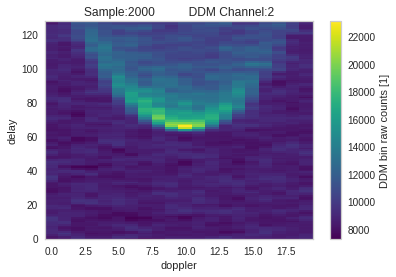

In [ ]:
##plot ddm with corresponding variable values
sample_select = 2000
ddm_select = 2
ddm_plots_with_vars(modeling_set, sample_select, ddm_select)
del sample_select, ddm_select

The first visualization of interest in our exporatory analysis is a full scatter plot matrix of all these ddm calibration and wind/wave data, to get a sense of any patterns/structure in their pairwise relationships:

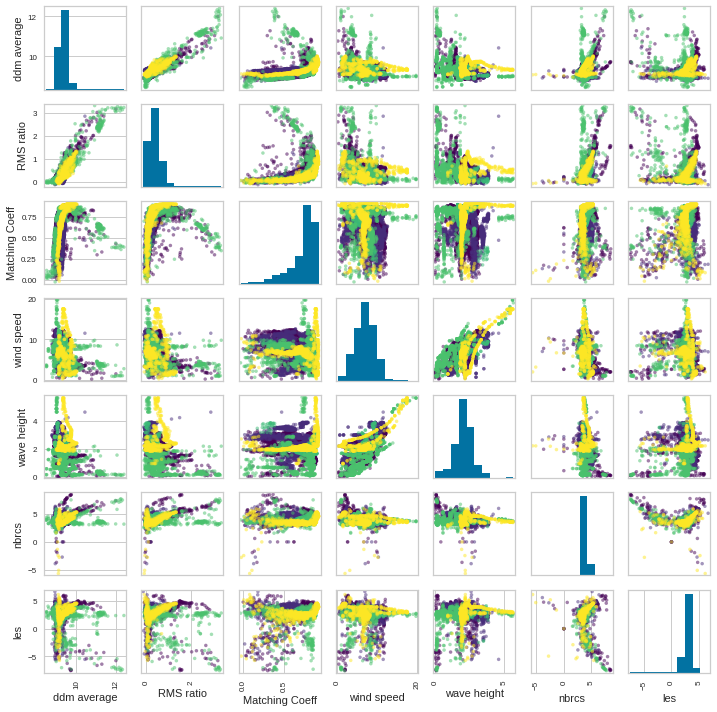

In [ ]:
##create scatterplot matrix of variables from set, colored by UTC timestamp for the sample containing each DDM
###NOTE: les and nbrcs contain negative values and so have been transformed with sign(x)log(abs(x)+1), to
###stretch/better visualize their patterns
###ALSO: RMS ratio and DDM average values have been transformed with standard log scales, as they contained no negatives
full_scatter_compare(modeling_set)

A correlation matrix will help to quantify the patterns (or in certain cases, lack thereof) in the plots above:

In [ ]:
##create a correlation matrix for comparison with the scatterplot matrix given just above
correlation_matrix(modeling_set)

ddm average  RMS ratio  Matching Coeff  wind speed  wave height  nbrcs    les
ddm average           1.000      0.897           0.067      -0.187       -0.254  0.304 -0.439
RMS ratio             0.897      1.000           0.037      -0.196       -0.290  0.317 -0.375
Matching Coeff        0.067      0.037           1.000      -0.138       -0.084 -0.125  0.069
wind speed           -0.187     -0.196          -0.138       1.000        0.679 -0.209  0.006
wave height          -0.254     -0.290          -0.084       0.679        1.000 -0.198  0.080
nbrcs                 0.304      0.317          -0.125      -0.209       -0.198  1.000 -0.647
les                  -0.439     -0.375           0.069       0.006        0.080 -0.647  1.000

The relatively high correlation between wave height and wind speed is unsurprising. Also, the high correlation between ddm average and RMS ratio is no surprise, as both represent a sort of average of large portions of data in each DDM. That les and nbrcs are related is interesting, although both represent NASA callibrations of the 'raw count' power values that color each DDM.

It seems worthwhile to take a much closer look at the individual scatterplots of 1) nbrcs against wind speed, 2) nbrcs against wave height, 3) RMS ratio against wind speed, 4) RMS ratio against wave height. This is because these pairs of variables represent the most highly correlated pairs of callibration values with wind speed/wave height values:

Pearson Correlation Coefficient: -0.20928394183575258


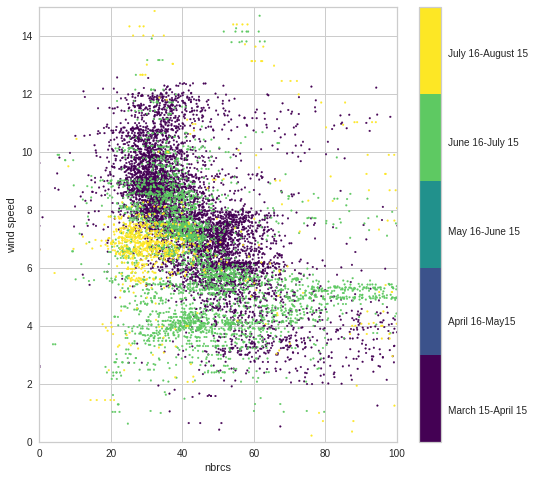

In [ ]:
#a closer look at nbrcs vs. wind speed
x_min = 0
x_max = 100
y_min = 0
y_max = 15
close_up_scatter(modeling_set, x_min, x_max, y_min, y_max, 'nbrcs', 'wind speed')

The negative relationship seems to be stronger for certain time intervals than others. For example, the purple time interval (the two March-April dates) seems to have a more distinct relationship than the green (the two June/July dates), which appears to be more distinct than with the yellow (the August date).  

Pearson Correlation Coefficient: -0.1982501467287308


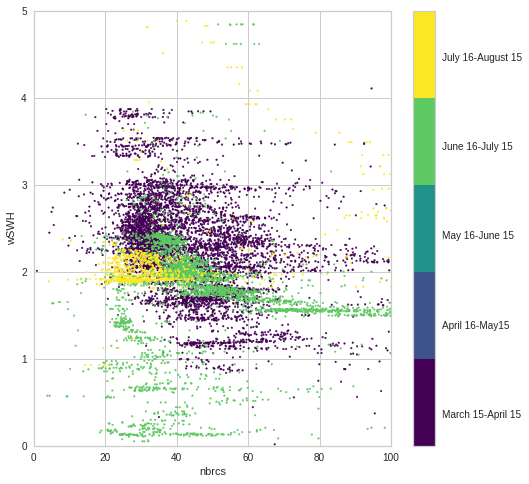

In [ ]:
##now, we take a close up look at nbrcs against wave height
x_min = 0
x_max = 100
y_min = 0
y_max = 5
close_up_scatter(modeling_set, x_min, x_max, y_min, y_max, 'nbrcs', 'wSWH')

Again, while a slight negative relationship appears overall, that relationship is stronger in the first two time intervals (the spring and summer intervals) than the other two.

Pearson Correlation Coefficient: -0.19586388337276633


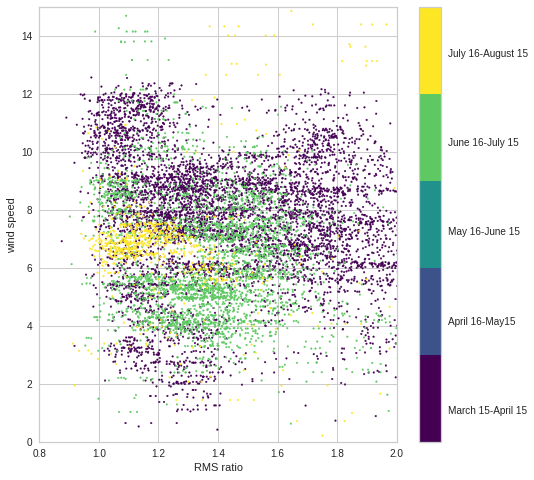

In [ ]:
#now, we take a close up look at RMS ratio against Wind Speed
x_min = .8
x_max = 2
y_min = 0
y_max = 15
close_up_scatter(modeling_set, x_min, x_max, y_min, y_max, 'RMS ratio', 'wind speed')

On somewhat closer examination, we see that the negative correlated relationship looks fairly weak, regardless of specific time interval.

Pearson Correlation Coefficient: -0.2897082112588838


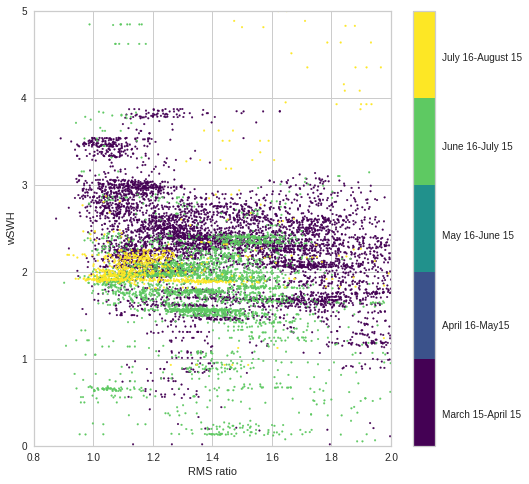

In [ ]:
#take a closer look at RMS ratio vs. Wave Height
x_min = .8
x_max = 2
y_min = 0
y_max = 5
close_up_scatter(modeling_set, x_min, x_max, y_min, y_max, 'RMS ratio', 'wSWH')

For RMS ratio vs. Wave Height, the inverse correlation appears slightly for especially low or especially high values of RMS ratio, but elsewhere, these variables appear almost independent.

We might be able to clarify some of the patterns by looking at them over specific time intervals. We do that with the following plots, looking at nbrcs/les/RMS ratio against wind speed and wave height in pairwise turns:

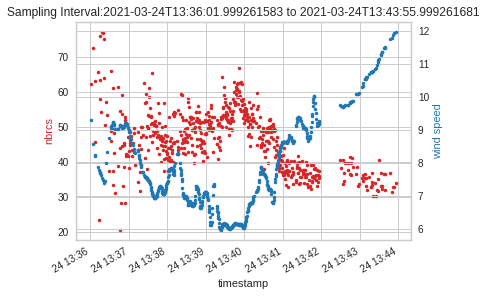

In [ ]:
#create a twin plot with time on mutual x-axis comparing nbrcs and wind speed for samples from the first time interval on the first day, March 24, 2021
#NOTE: this plot isolates trends across just one of this satellite's four DDM channels, for the sake of visual clarity
start_samp = 0
end_samp = 593
channel = 0
var_of_intA = 'nbrcs'
var_of_intB = 'wind speed'
create_twin_plot(modeling_set, start_samp, end_samp, channel, var_of_intA, var_of_intB)
del start_samp, end_samp, channel, var_of_intA, var_of_intB

In just this isolated time interval, the anti-correlation of the nbrcs and wind speed variables seems fairly strong. Let's look at nbrcs vs. wave height, for the same time interval and DDM channel:

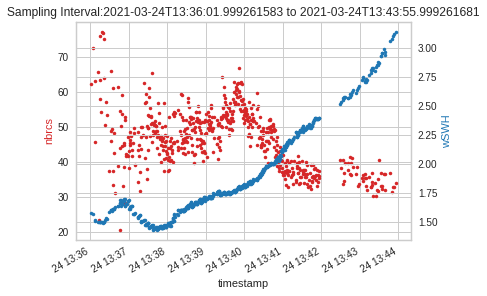

In [ ]:
start_samp = 0
end_samp = 593
channel = 0
var_of_intA = 'nbrcs'
var_of_intB = 'wSWH'
create_twin_plot(modeling_set, start_samp, end_samp, channel, var_of_intA, var_of_intB)
del start_samp, end_samp, channel, var_of_intA, var_of_intB

Here, while the significant wave height plot layout is a much denser than wind speed, the anti-correlation is still more obvious than when we plot all ddm data across all time intervals, as with the scatter plots above. Now, we take a look at 'les' vs. wind speed and wave height.

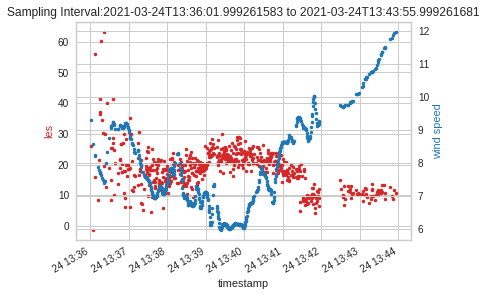

In [ ]:
start_samp = 0
end_samp = 593
channel = 0
var_of_intA = 'les'
var_of_intB = 'wind speed'
create_twin_plot(modeling_set, start_samp, end_samp, channel, var_of_intA, var_of_intB)
del start_samp, end_samp, channel, var_of_intA, var_of_intB

The anticorrelation here is still present but a bit less strong than for nbrcs, which is mimicked by the anti-correlation of these variables over all the data in the modeling dataset. Now, looking at les vs. wave height:

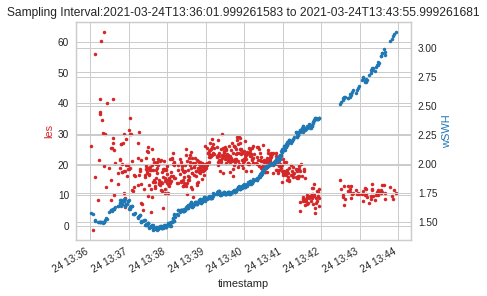

In [ ]:
start_samp = 0
end_samp = 593
channel = 0
var_of_intA = 'les'
var_of_intB = 'wSWH'
create_twin_plot(modeling_set, start_samp, end_samp, channel, var_of_intA, var_of_intB)
del start_samp, end_samp, channel, var_of_intA, var_of_intB

For these variables, the relationship is far more slight and appears to almost reverse halfway through the time interval. Finally, we take examine the relationship between RMS ratio (our most promising DDM calibration done by the team), and wind speed/wave height over these intervals:

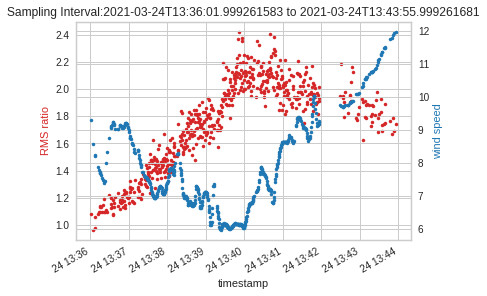

In [ ]:
start_samp = 0
end_samp = 593
channel = 0
var_of_intA = 'RMS ratio'
var_of_intB = 'wind speed'
create_twin_plot(modeling_set, start_samp, end_samp, channel, var_of_intA, var_of_intB)
del start_samp, end_samp, channel, var_of_intA, var_of_intB

Once more, there is a more well-defined anti-correlation between RMS ratio and wind speed over this smaller time interval than over the whole dataset. Looking at RMS ratio vs. wave height, we get:

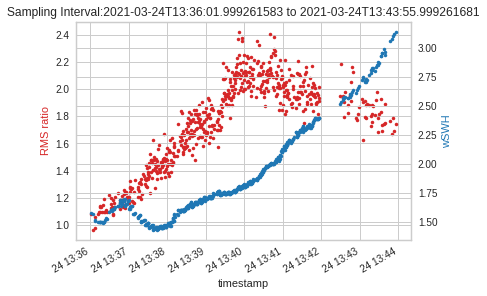

In [ ]:
start_samp = 0
end_samp = 593
channel = 0
var_of_intA = 'RMS ratio'
var_of_intB = 'wSWH'
create_twin_plot(modeling_set, start_samp, end_samp, channel, var_of_intA, var_of_intB)
del start_samp, end_samp, channel, var_of_intA, var_of_intB

As with les, we get a less obvious relationship with wave height than with wind speed.

At this point, it may be helpful to look at the distributions of these individual variables as well, along with basic statistical summaries for each variable. NOTE: these represent data across the entire dataset, rather than across a limited time interval.

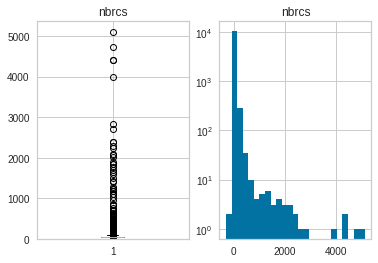

In [ ]:
#create the boxplot and corresponding histogram for nbrcs
#note, the histogram frequency axis is converted to a log scale for visual clarity
ddm_box_plot(modeling_set, 'nbrcs')

In [ ]:
stat_summaries(modeling_set, 'nbrcs')

  Statistics    Values
0       Mean    59.007
1     Median    42.214
2        Std   139.520
3        Max  5092.975
4        Min  -289.579


It seems that nbrcs has a very large number of outliers, with most data being concentrated around a very few values between zero and 1. Once we transform the frequency axis with a log scale, we see that overall, nbrcs is non-normally distributed, being fairly right-skewed.

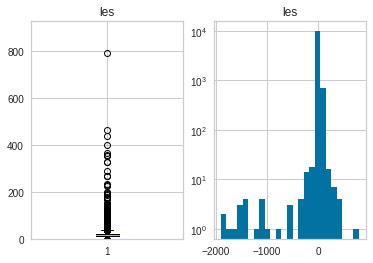

In [ ]:
#create the boxplot and corresponding histogram for les
##As with nbrcs, the distribution for les seems to be heavily concentrated around zero, so that the histogram also benefits from a log scale transformation
ddm_box_plot(modeling_set, 'les')

In [ ]:
stat_summaries(modeling_set, 'les')

  Statistics    Values
0       Mean    15.991
1     Median    15.458
2        Std    64.356
3        Max   791.867
4        Min -1904.772


The distribution for les seems to be heavily concentrated around zero, so that the histogram also benefits from a log scale transformation, with the more visible distribution on the right showing a somewhat left-skewed graphic.

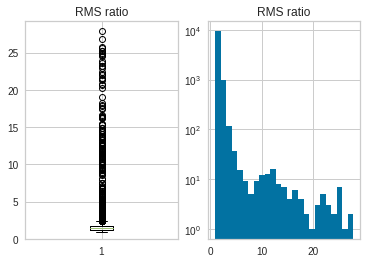

In [ ]:
#create the boxplot and corresponding histogram for RMS ratio
##As with nbrcs and les, RMS ratio has been given a log scale density axis for its histogram
ddm_box_plot(modeling_set, 'RMS ratio')

In [ ]:
stat_summaries(modeling_set, 'RMS ratio')

  Statistics  Values
0       Mean   1.644
1     Median   1.400
2        Std   1.526
3        Max  27.831
4        Min   0.875


Here, we see that RMS ratio is extremely right-skewed, with mean greater than the median. Finally, we look at the individual distributions and statistical summaries of wind speed and wave height:

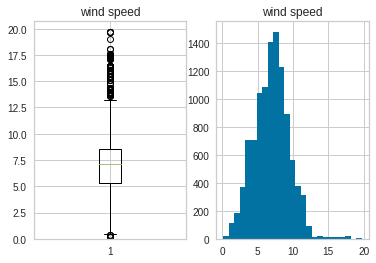

In [ ]:
#create box plot and corresponding histogram for wind speed:
ddm_box_plot(modeling_set, 'wind speed')

In [ ]:
stat_summaries(modeling_set, 'wind speed')

  Statistics  Values
0       Mean   6.988
1     Median   7.078
2        Std   2.474
3        Max  19.721
4        Min   0.167


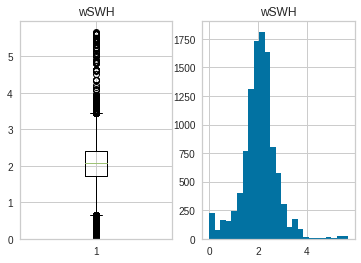

In [ ]:
##and for wave height...
ddm_box_plot(modeling_set, 'wSWH')

In [ ]:
stat_summaries(modeling_set, 'wSWH')

  Statistics  Values
0       Mean   2.066
1     Median   2.077
2        Std   0.704
3        Max   5.674
4        Min   0.017


Both these variables are fairly normal in distribution.
The presence of some correlations and anticorrelations in the data, particularly across specific time intervals, but also in the dataset at large, would suggest that linear modeling might be fruitful, given the right combination of non-colinear variables.

Next, we begin the process of assessing all DDM callibration and wind/wave variables in the modeling dataset for colinearity issues.

####Assessing Colinearity

In [ ]:
##start by creating a pandas dataframe from the ddm calibrations/wind speed/wave height data in the modeling set
modeling_frame = create_dataframe(modeling_set)
modeling_frame = modeling_frame.astype('float64')
modeling_frame = modeling_frame.round(3)
modeling_frame

ddm average  RMS ratio  Matching Coeff  wind speed  wave height   nbrcs     les
0          7401.46      1.077           0.289       9.300        1.577  62.245  25.984
1         14560.06      1.648           0.757       8.765        1.721  33.157  12.925
2         10968.92      1.927           0.860       9.553        1.247  38.311  20.428
3         15699.80      1.839           0.845       6.573        1.903  31.601  13.440
4          7512.64      0.964           0.294       8.576        1.573  72.595  -1.148
...            ...        ...             ...         ...          ...     ...     ...
10675      8693.80      1.090           0.480       7.692        2.011  60.153  36.688
10676     19592.18      2.520           0.860       8.318        1.973  75.276  36.031
10677      9361.48      1.614           0.853       1.935        2.103  88.845  42.700
10678      8453.16      1.104           0.229       6.609        1.954   0.000   0.000
10679      8374.92      1.045           0.347       7.691        2.011  49.668  22.902

[10680 rows x 7 columns]

In [ ]:
#remove the dependent variable of interest, in this case, 'wind speed', fit multiple regression model and calculate VIF values
find_VIF(modeling_frame, 'wind speed')

feature     VIF
0     ddm average  16.517
1       RMS ratio  11.590
2  Matching Coeff   9.568
3     wave height   6.484
4           nbrcs   1.974
5             les   1.988

It actually does seem that given the general rule of of thumb that a VIF value should not exceed 10 (such a high value indicates a colinearity problem for that variable), we do have possible collinearity issues. We resolve this by removing ddm average and re-runing the multiple regression, re-checking the Variance Inflation Factors again, afterwards:

In [ ]:
#drop the ddm average variable and reassess VIF:
modeling_frame = create_dataframe(modeling_set)
modeling_frame = remove_colinear_var(modeling_frame, 'ddm average')
find_VIF(modeling_frame, 'wind speed')

feature    VIF
0       RMS ratio  2.506
1  Matching Coeff  8.651
2     wave height  6.393
3           nbrcs  1.961
4             les  1.861

The removal of ddm average appears to have corrected the colinearity problem (all VIF values are now under 10), suggesting that it was the extremely high correlation of RMS ratio to ddm average that was making our original VIF assessment model so highly multicolinear (ddm average and RMS ratio would have explained roughly the same amount of variance in our eventual wind speed model).

We repeated the VIF assessment process for a potential model with wave height as the dependent variable:

In [ ]:
##reset modeling dataframe, but this time find VIF with all variables except Wave Height, our new dependent variable
modeling_frame = create_dataframe(modeling_set)
find_VIF(modeling_frame, 'wave height')

feature     VIF
0     ddm average  16.380
1       RMS ratio  11.401
2  Matching Coeff   9.056
3      wind speed   5.837
4           nbrcs   1.979
5             les   1.983

In [ ]:
#drop the ddm average variable and reassess VIF:
modeling_frame = create_dataframe(modeling_set)
modeling_frame = remove_colinear_var(modeling_frame, 'ddm average')
find_VIF(modeling_frame, 'wave height')

feature    VIF
0       RMS ratio  2.484
1  Matching Coeff  7.916
2      wind speed  5.803
3           nbrcs  1.967
4             les  1.863

And once again, we see the colinearity problem corrected. So we see that in any linear model built to predict either wind speed or wave height, we would certainly want to exclude the crude ddm average, as it is too highly correlated with RMS ratio, and because, of the two variables, RMS ratio offers more promising correlation with our would-be dependent variables.

If we wanted to be even more aggressive in our insistence that the model have no multicolinearity problems (some statisticians insist on having VIFs not much higher than 5), we could further remove Maximum Template Matching Coefficient as a variable from these VIF calculations and see the result:

In [ ]:
#remove ddm average and max matching coeff from modeling dataframe and assess VIF for windspeed as dependent variable
modeling_frame = create_dataframe(modeling_set)
modeling_frame = remove_colinear_var(modeling_frame,'ddm average')
modeling_frame = remove_colinear_var(modeling_frame, 'Matching Coeff')
find_VIF(modeling_frame, 'wind speed')

feature    VIF
0    RMS ratio  1.977
1  wave height  2.088
2        nbrcs  1.909
3          les  1.723

In [ ]:
#do the same for a model that would have wave height as the dependent variable
modeling_frame = create_dataframe(modeling_set)
modeling_frame = remove_colinear_var(modeling_frame,'ddm average')
modeling_frame = remove_colinear_var(modeling_frame, 'Matching Coeff')
find_VIF(modeling_frame, 'wave height')

feature    VIF
0   RMS ratio  2.052
1  wind speed  2.071
2       nbrcs  1.866
3         les  1.650

For both our prospect models (using wind speed or wave height as the dependent variable), we would drastically mitigate the colinearity problems we would otherwise get by removing both ddm average and maximum template matching coefficient as independent regressors to those models, though whether we should remove Maximum matching coefficient too depends on how strongly we wish to avoid the problem of multicolinearity.

For the purposes of our model, we won't remove Maximum Matching Coefficient, as its colinearity with wind speed and wave height is far more limited than when we include ddm average.

####Variable Selection

Now that we have identified a set of variables that is not colinear for linear models that might use wind speed or wave height as a predictand, we can do best subsets variable selection to try and identify a 'best' combination of regressor/predictor variables for such models.

In [ ]:
##start by building a dataframe with only the variables which we know are not colinear for wind speed as dependent variable:
#also in this cell, we define y (the dependent variable for the model), as wind speed
modeling_frame = create_dataframe(modeling_set)
modeling_frame = modeling_frame.drop(['ddm average'], axis = 1)
y = modeling_frame['wind speed']
X = modeling_frame.drop(['wind speed'], axis = 1)

In [ ]:
##use functions defined above to create a dataframe that contains best models produced with the various numbers of regressors
models_highest_RSS = pd.DataFrame(columns=["RSS", "model"])
for i in range(1,6):
    models_highest_RSS.loc[i] = highest_RSS(i)
models_highest_RSS_vals = models_highest_RSS['RSS']
models_highest_RSS_vals = models_highest_RSS_vals.astype('float64')
models_highest_RSS_vals.round(3)
##This cell produces a dataframe with the number of variables in the model on the left and highest Residual Sum of Squares for the best model
###with that number of variables

1    39928.029
2    37834.713
3    37492.034
4    37279.259
5    36970.417
Name: RSS, dtype: float64

In [ ]:
##get more information about the models that produced the highest RSS for each number of variables
###start with model that produced highest RSS for model with only 1 regressor:
print(models_highest_RSS.loc[1, "model"].summary())

                                 OLS Regression Results                                
Dep. Variable:             wind speed   R-squared (uncentered):                   0.932
Model:                            OLS   Adj. R-squared (uncentered):              0.932
Method:                 Least Squares   F-statistic:                          1.463e+05
Date:                Tue, 21 Dec 2021   Prob (F-statistic):                        0.00
Time:                        01:33:53   Log-Likelihood:                         -22196.
No. Observations:               10680   AIC:                                  4.439e+04
Df Residuals:                   10679   BIC:                                  4.440e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

It is not too surprising that any model including wave height, even one with just the variable wave height, (which is so highly correlated with wind speed), will have a very high R^2 statistic. It will be interesting, then, to do the same best subsets selection process, but on all non-colinear variables not including wave height:

In [ ]:
##start by building a dataframe with only the variables which we know are not colinear for wind speed as dependent variable.
###This time, we also exclude wave height as a predictor:
#also in this cell, we define y (the dependent variable for the model), as wind speed
modeling_frame = create_dataframe(modeling_set)
modeling_frame = modeling_frame.drop(['ddm average'], axis = 1)
y = modeling_frame['wind speed']
X = modeling_frame.drop(['wind speed'], axis = 1)
X = X.drop(['wave height'], axis = 1)

In [ ]:
##use functions defined above to create a dataframe that contains best models produced with the various numbers of regressor from new subset frame
models_highest_RSS = pd.DataFrame(columns=["RSS", "model"])
for i in range(1,5):
    models_highest_RSS.loc[i] = highest_RSS(i)

In [ ]:
##again, we want more specific information about the model that uses only 1 regressor variable
##for the models with 3 variables:
print(models_highest_RSS.loc[1, "model"].summary())

                                 OLS Regression Results                                
Dep. Variable:             wind speed   R-squared (uncentered):                   0.827
Model:                            OLS   Adj. R-squared (uncentered):              0.827
Method:                 Least Squares   F-statistic:                          5.103e+04
Date:                Tue, 21 Dec 2021   Prob (F-statistic):                        0.00
Time:                        01:33:54   Log-Likelihood:                         -27182.
No. Observations:               10680   AIC:                                  5.437e+04
Df Residuals:                   10679   BIC:                                  5.437e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [ ]:
##and the best model with 2 variables
print(models_highest_RSS.loc[2, "model"].summary())

                                 OLS Regression Results                                
Dep. Variable:             wind speed   R-squared (uncentered):                   0.827
Model:                            OLS   Adj. R-squared (uncentered):              0.827
Method:                 Least Squares   F-statistic:                          2.559e+04
Date:                Tue, 21 Dec 2021   Prob (F-statistic):                        0.00
Time:                        01:33:54   Log-Likelihood:                         -27169.
No. Observations:               10680   AIC:                                  5.434e+04
Df Residuals:                   10678   BIC:                                  5.436e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [ ]:
#and the model with 3 regressors:
print(models_highest_RSS.loc[3, "model"].summary())

                                 OLS Regression Results                                
Dep. Variable:             wind speed   R-squared (uncentered):                   0.828
Model:                            OLS   Adj. R-squared (uncentered):              0.828
Method:                 Least Squares   F-statistic:                          1.708e+04
Date:                Tue, 21 Dec 2021   Prob (F-statistic):                        0.00
Time:                        01:33:54   Log-Likelihood:                         -27162.
No. Observations:               10680   AIC:                                  5.433e+04
Df Residuals:                   10677   BIC:                                  5.435e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [ ]:
#the model that regresses wind speed on all four variables
print(models_highest_RSS.loc[4, "model"].summary())

                                 OLS Regression Results                                
Dep. Variable:             wind speed   R-squared (uncentered):                   0.828
Model:                            OLS   Adj. R-squared (uncentered):              0.828
Method:                 Least Squares   F-statistic:                          1.282e+04
Date:                Tue, 21 Dec 2021   Prob (F-statistic):                        0.00
Time:                        01:33:54   Log-Likelihood:                         -27160.
No. Observations:               10680   AIC:                                  5.433e+04
Df Residuals:                   10676   BIC:                                  5.436e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

Clearly, the exclusion of wave height reduces the adjusted $R^2$ value for the model, but it appears that our best model with 3 variables (from the standpoint of maximizing RSS), regresses wind speed on the variables les, nbrcs, and Matching coeff. Were we to regress wind speed on just 2 variables, we should use nbrcs and Matching coeff. Were we to use only 1 variable, we would see that Matching coeff is the best variable to regess wind speed on. We also see that using all four variables maximizes adjusted $R^2$.

Next, we do the same best subsets selection to maximize RSS for models predicting wave height:

In [ ]:
##fit models for best subsets variable selection for wave height prediction, dropping wind speed from regressors
modeling_frame = create_dataframe(modeling_set)
modeling_frame = modeling_frame.drop(['ddm average'], axis = 1)
y = modeling_frame['wave height']
X = modeling_frame.drop(['wave height'], axis = 1)
X = X.drop(['wind speed'], axis = 1)
models_highest_RSS = pd.DataFrame(columns=["RSS", "model"])
for i in range(1,5):
    models_highest_RSS.loc[i] = highest_RSS(i)
#find the 'best' model that regresses wind speed on each number of variables
#save the R^2 value:
rsquared = []
for i in range(1,5):
  rsquared.append(models_highest_RSS.loc[i, "model"].rsquared)
rsquared

[0.842, 0.843, 0.844, 0.844]

It seems that in both cases, where we are trying to predict wind speed or wave height, of the models which maximize RSS for each number of regressor variables, the model that regresses on all four possible predictors is the one that maximizes adjusted $R^2$.

In [ ]:
del models_highest_RSS, models_highest_RSS_vals, rsquared

####Checking Error Assumptions and Identifying Influential Observations/Outliers

In this section, we must check that the error assumptions in Linear Regression Analysis hold for our data. First, it must be true that errors/residuals (differences between the actual values and the predicted ones) are roughly normally distributed. Second, it must be the case that the errors are basically uncorrelated. Lastly, it must hold true that the variances of the errors are more-or-less constant (homoscedasticity).

Checking Error Assumptions for the Wind Speed Model:

In [ ]:
#first we build our modeling dataframe that includes all the four variables we want to regress wind speed on, as per our variable selection findings:
modeling_frame = create_dataframe(modeling_set)
modeling_frame = modeling_frame.drop(['ddm average'], axis = 1)
modeling_frame = modeling_frame.drop(['wave height'], axis = 1)
y = modeling_frame['wind speed']
X = modeling_frame.drop(['wind speed'], axis = 1)
#fit our model for wind speed/summarize:
mod = sm.OLS(y,X)
regress = mod.fit()
mod_resid = regress.resid

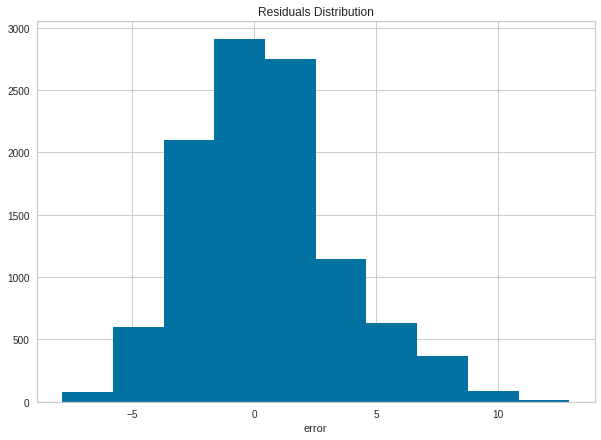

In [ ]:
#get the residuals and create a histogram of their distribution:
resid_Hist(regress)

This histogram of error values from our model seems to confirm that the assumption about rough normality of errors distribution is satisfied. We can double-check this assumption with the use of a QQ plot:

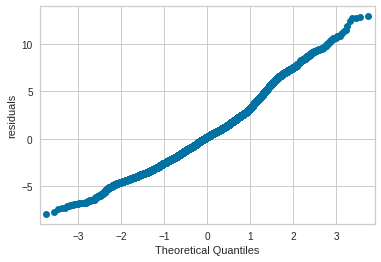

In [ ]:
##create a QQ plot to assess normality of errors/residuals from the model
sm.qqplot(mod_resid, ylabel = 'residuals')
py.show()

Here, we see that the qq plot shows a fairly straight line though not perfect, which indicates a fairly normal distribution; (curvalinear structure in the qq plot would indicate non-normal residuals). So the first of the error assumptions, that of basic normality would at first appear to indicate our first error assumption is satisfied.

Next, we look at the assumption of our errors being uncorrelated, which assess by looking at the Durbin-Watson test statistic in the model summary. According to TowardsDataScience.com page "Verifying the Assumptions of Linear Regression", if the Durbin-Watson test statistic is < 2, there is siginificant positive residual auto-correlation; if > 2, then there is significant negative autocorrelation; if roughly equal to 2, then there is no autocorrelation and our assumption is satisfied:

In [ ]:
#look at Durbin Watson Statistic from our model summary:
regress.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             wind speed   R-squared (uncentered):                   0.828
Model:                            OLS   Adj. R-squared (uncentered):              0.828
Method:                 Least Squares   F-statistic:                          1.282e+04
Date:                Tue, 21 Dec 2021   Prob (F-statistic):                        0.00
Time:                        01:33:54   Log-Likelihood:                         -27160.
No. Observations:               10680   AIC:                                  5.433e+04
Df Residuals:                   10676   BIC:                                  5.436e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
RMS ratio         -0.0459      0.021     -2.192      0.028      -0.087      -0.005
Matching Coeff     9.4289      0.068    138.706      0.000       9.296       9.562
nbrcs             -0.0016      0.000     -5.913      0.000      -0.002      -0.001
les               -0.0025      0.001     -4.018      0.000      -0.004      -0.001
==============================================================================
Omnibus:                      582.012   Durbin-Watson:                   1.589
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              682.783
Skew:                           0.593   Prob(JB):                    5.44e-149
Kurtosis:                       3.354   Cond. No.                         363.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The Durbin-Watson test statistic indicates that we have some positive autocorrelation between the residuals themselves. While a Durbin-Watson test value less than 1 would be cause for much more concern (according to TowardsDataScience.com), the assumption of uncorrelated errors for our model is not entirely satisfied [Source](https://towardsdatascience.com/linear-regression-explained-1b36f97b7572).

Finally, we looked at the last assumption, that the variance of the errors is basically constant, which we do with a scatter plot of residiuals vs. fitted values in the model:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


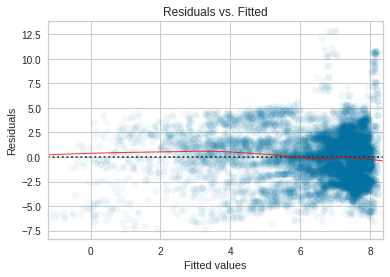

In [ ]:
##plot a residuals vs. fitted values plot for the model:
FitvResid(regress,X,y)

A residuals vs. fitted values plot is used to check for constant error variance and for model structure in Linear Regression Modeling. It is a plot of fitted values (predicted $\hat{y}$) against the residuals, the differences between each observed dependent variable value and the $\hat{y}$ predicted value lying along the line of fit. Ideally, there should be a basically random distribution of points around the mean for the residuals (always zero in a proper linear regression model). Source: Faraway, *Linear Models with R*, 2015, pg 77.

The variance of the errors does appear to be roughly constant, despite a bit pattern/structure in the densest regions of this plot. The loess smoother line approximates the horizontal line at Residual = 0 (representing our line of fit in the model). So the error mean does appear to be zero and the constant variance error assumption appears to be mostly satisfied.

Checking Error Assumptions for the Wave Height Model:

In [ ]:
#first we build our modeling dataframe that includes all the four variables we want to regress wave height on, as per our variable selection findings:
modeling_frame = create_dataframe(modeling_set)
modeling_frame = modeling_frame.drop(['ddm average'], axis = 1)
modeling_frame = modeling_frame.drop(['wind speed'], axis = 1)
y = modeling_frame['wave height']
X = modeling_frame.drop(['wave height'], axis = 1)
mod = sm.OLS(y,X)
regress = mod.fit()
mod_resid = regress.resid

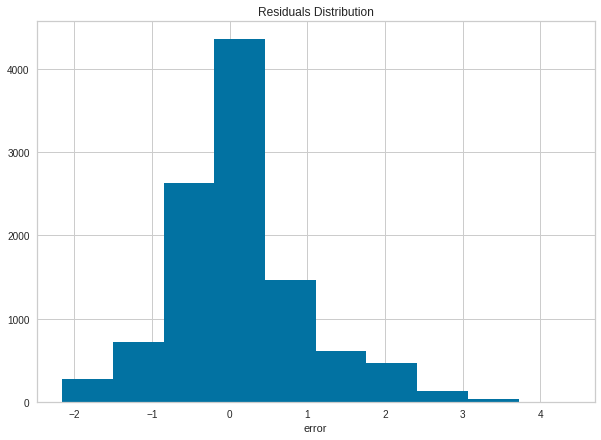

In [ ]:
#get the residuals and create a histogram of their distribution:
resid_Hist(regress)

The histogram for residuals in the wave height model seems to be a bit skewed, more so than for the residuals in the wind speed model. Having a bit more curved distribution of points in the qqplot for residuals confirms this:

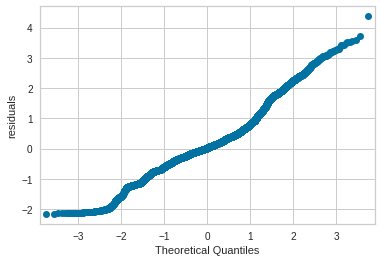

In [ ]:
##create a QQ plot to assess normality of errors/residuals from the model
sm.qqplot(mod_resid, ylabel = 'residuals')
py.show()

Now we look at the Durbin-Watson Statistic to assess this model's assumption of non-correlated consecutive errors:

In [ ]:
##Now we look at the Durbin-Watson Statistic
regress.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            wave height   R-squared (uncentered):                   0.844
Model:                            OLS   Adj. R-squared (uncentered):              0.844
Method:                 Least Squares   F-statistic:                          1.439e+04
Date:                Tue, 21 Dec 2021   Prob (F-statistic):                        0.00
Time:                        01:34:05   Log-Likelihood:                         -13585.
No. Observations:               10680   AIC:                                  2.718e+04
Df Residuals:                   10676   BIC:                                  2.721e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
RMS ratio         -0.0584      0.006     -9.953      0.000      -0.070      -0.047
Matching Coeff     2.8297      0.019    148.381      0.000       2.792       2.867
nbrcs              0.0001   7.72e-05      1.315      0.189   -4.98e-05       0.000
les                0.0005      0.000      2.642      0.008       0.000       0.001
==============================================================================
Omnibus:                      910.356   Durbin-Watson:                   1.262
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1511.850
Skew:                           0.632   Prob(JB):                         0.00
Kurtosis:                       4.342   Cond. No.                         363.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The Durbin-Watson test statistic is a bit lower than would be ideal, but still above 1. Were it beneath 1, we would have more serious cause to believe that our model's violation of linear modeling error assumptions is deal-breaking.

Finally, we look at a plot of residuals vs. fitted values, to assess the assumption of constant variance for the residuals:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


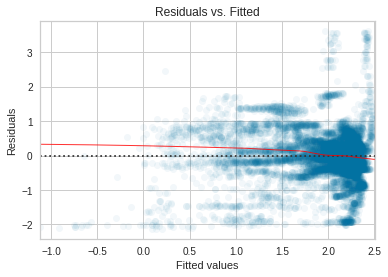

In [ ]:
#get fitted values to plot and plot against residuals
FitvResid(regress,X,y)

The deviation of the lowess smoother line from the error mean line at $Residuals = 0$ suggest that the assumption of constant error variance seems more generally violated than we saw with the model predicting wind speed.

Ultimately, there are arguable violations of error assumptions in our models. For the wind speed model, these violations are not as extreme as for the wave height model. From here, we move on to the process of identifying outliers/Influential values.

In [ ]:
del mod_resid

####Identifying Outliers/Influential Values

**The Wind Speed Model**

In [ ]:
#create the modeling set and fit a model regressing wind speed on variables RMS ratio, Max Matching Coefficient, nbrcs and les:
#first we build our modeling dataframe that includes all the four variables we want to regress wind speed on, as per our variable selection findings:
modeling_frame = create_dataframe(modeling_set)
modeling_frame = modeling_frame.drop(['ddm average'], axis = 1)
modeling_frame = modeling_frame.drop(['wave height'], axis = 1)
y = modeling_frame['wind speed']
X = modeling_frame.drop(['wind speed'], axis = 1)
#fit our model for wind speed/summarize:
mod = sm.OLS(y,X)
regress = mod.fit()

First, we will want to look at outlier observations without accounting for their leverage values status. We can do this with a Bonferroni outlier test, which our model has a built-in function to perform:

In [ ]:
#conduct Bonferroni Outlier Test for our wind speed Model:
##NOTE: This cell requires a few minutes to run
bonf_test = regress.outlier_test()

In [ ]:
#determine which observation has the highest studentized residual:
bonf_outliers = bonf_outlier(bonf_test)
print(bonf_outliers)

       student_resid  unadj_p  bonf(p)
0              2.206    0.027      1.0
4              1.939    0.053      1.0
8              1.747    0.081      1.0
12             1.960    0.050      1.0
16             1.751    0.080      1.0
...              ...      ...      ...
10671          1.523    0.128      1.0
10674          1.046    0.295      1.0
10675          1.106    0.269      1.0
10678          1.463    0.143      1.0
10679          1.495    0.135      1.0

[1765 rows x 3 columns]


In [ ]:
#determine ratio of number of outliers in our model to the number of observations, based on the Bonferroni corrected p-value test criterion:
observation_number = 10680
outlier_ratio = len(bonf_outliers)/observation_number
print(format(outlier_ratio, '.3f'))

0.165


Clearly, we have a rather large number of outliers (about 16.5% of our dataset) by the Bonferroni test criterion. We must now assess whether that translates to a large number of influential observations (which have significant bearing on model fit).

Influential observations are observations whose exclusion would significantly alter the model fit; they account for not just outlier status, but also leverage value status of a given observation.

In order to identify influential observations whose inclusion might be problematic for the model, we look at Cook's Distance, a statistic quantifying the influence of each observation (the extent to which removing that observation would greatly modify the model fit). The formula for Cook's Distance is given in Faraway's text as:
$D_i = \frac{1}{p}r_i^2\frac{h_i}{1-h_i}$, where $p$ is the number of regressors in the model, $r_i^2$ is the residual effect of observation $i$ squared, and $\frac{h_i}{1-h_i}$ is the 'leverage term' for the observation. According to the Penn State Statistics Department webpage, "The leverage $h_i$ is a measure of the distance between the x value for the $i$th data point and the mean of the x values for all n data points." [Source](https://online.stat.psu.edu/stat501/lesson/11/11.2#:~:text=The%20leverage%20h%20i%20i,regression%20coefficients%20including%20the%20intercept).

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:884: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


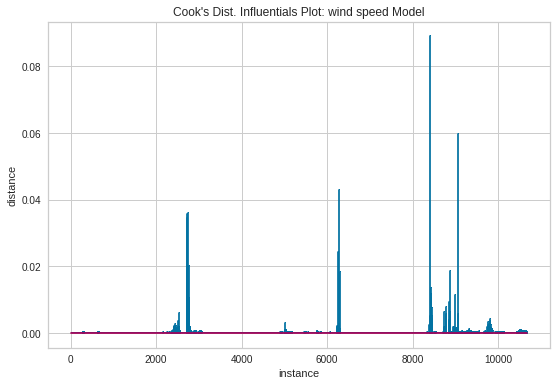

In [ ]:
#calculate/plot cook's distances to identify influential observations:
#Takes approx. 1 minute to execute
cooks_distances_plot(regress)

NOTE: Here, the instance axis is not random, but presumably follows the progression of observations across the UTC timestamps working from March through late August, for our modeling set. This Cook's Distance plotting function's source code exists in a Python package that gets called by the function 'cooks_distances_plot()', and so whether this is true is not completely clear, but the team assumes there to have been no reason for that algorithm to have shuffled the order of observations (samples and ddms) before constructing this plot.

It appears that our model has a fair number of observations which, if removed, would greatly alter the fit of the model. The rule of thumb, according to statology.org, is that if an observation has a Cook's distance of more than $\frac{4}{n}$, where $n$ is the number of observations, then it is a likely outlier [Source](https://www.statology.org/how-to-identify-influential-data-points-using-cooks-distance/#:~:text=A%20data%20point%20that%20has,considered%20to%20be%20an%20outlier.). $\frac{4}{n}$ in our case is approximately equal to .0004, and so we see many such values.

Another rule of thumb, given by Cook himself, suggests that Cook's Distance values of > 1 are not of significant concern as influential values (Cited in Weisberg, Sanford. *Residuals and Influence in Regression,*. New York, Chapman and Hall, 1982.) By that rule, we would appear to have no observations whose impact on the model fit is, for that stand-alone observation, highly significant.

However, the high number of influential values under the more stringent guidelines indicates that Linear Regression may not be the best approach for modeling with this dataset and that perhaps our Machine Learning model might give more reliable predictions.

**The Wave Height Model**

In [ ]:
#start by re-fitting wave height model
modeling_frame = create_dataframe(modeling_set)
modeling_frame = modeling_frame.drop(['ddm average'], axis = 1)
modeling_frame = modeling_frame.drop(['wind speed'], axis = 1)
y = modeling_frame['wave height']
X = modeling_frame.drop(['wave height'], axis = 1)
mod = sm.OLS(y,X)
regress = mod.fit()

In [ ]:
###conduct Bonferroni Outlier Test for our wave height Model:
##NOTE: This cell requires a few minutes to run
bonf_test = regress.outlier_test()

In [ ]:
#determine which observations might qualify as outliers; look at the number of such observations
bonf_outliers = bonf_outlier(bonf_test)
print(bonf_outliers)

       student_resid  unadj_p  bonf(p)
2109           1.053    0.292      1.0
2117           1.023    0.306      1.0
2121           1.024    0.306      1.0
2125           1.022    0.307      1.0
2129           1.037    0.300      1.0
...              ...      ...      ...
10670          1.538    0.124      1.0
10671          1.381    0.167      1.0
10674          1.270    0.204      1.0
10678          1.588    0.112      1.0
10679          1.243    0.214      1.0

[1563 rows x 3 columns]


In [ ]:
#determine ratio of number of outliers in our model to the number of observations, based on the Bonferroni corrected p-value test criterion:
observation_number = 10680
outlier_ratio = len(bonf_outliers)/observation_number
print(format(outlier_ratio, '.3f'))

0.146


The Wave Height model has fewer potential outliers than the wind speed model, but not by too many. There are still more of them than is comfortable for linear regression modeling, but as with wind speed, we need to see how much these translate into observations influential enough to change the model fit by their removal. We proceed to that analysis, again with Cook's Distance measurements:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:884: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


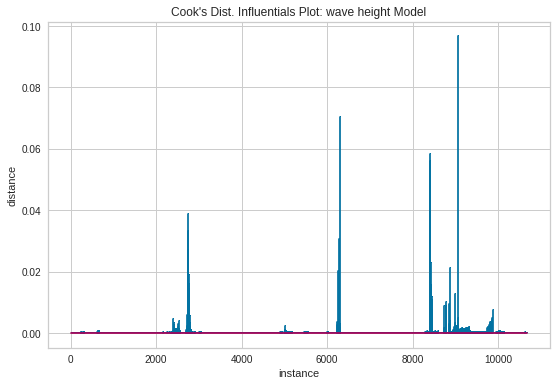

In [ ]:
#calculate/plot cook's distances for wave height model to identify influential observations:
##again, this cell takes approx 1 min. to run
cooks_distances_plot(regress)

Once more, using our Cook's Distances rule of thumb dictating that any distances greater than $\frac{4}{n}\approx.0004$, we see a great many influential values. However, less strict rules of thumb, some of which are also outlined at statisticshowto.com on the page 'Cook's Distance: Definition/Interpretation', dictate that only Cook's Distance values greater than .5 should be considered outliers [Source](https://www.statisticshowto.com/cooks-distance/). By that rule, we have siginificantly fewer for both the wind speed model and the wave height model.

In any case, we should do a little further investigation of what is happening at some of the sampling intervals where we see extreme influential value peaks.

Of particular interest is the sampling interval between roughly 8000 and 9500, as that interval of observations seems to contain the most outliers. These would correspond to DDMs from samples 2000 to 2375 in our modeling dataset, which we look at now:

In [ ]:
outlier_select = modeling_set.sel(sample = slice(2000, 2375))

Here, it may prove informative to look at the average wind speed/wave heights for this subset of samples compared to the overall average for those variables:

In [ ]:
compare_dependent_average(outlier_select, modeling_set)

  Average Wind Speed (Sample Subset): 7.025
  Average Wave Height (Sample Subset): 1.62
  Average Wind Speed (Total Set): 6.988
  Average Wave Height (Total Set): 2.066


Let's see what the time intervals of the influential samples are:

In [ ]:
outlier_start_time = outlier_select.sel(sample=2000)['ddm_timestamp_utc'].values
outlier_end_time = outlier_select.sel(sample = 2375)['ddm_timestamp_utc'].values
print(f'''  Influentials Start Date/Time: {outlier_start_time}
      Influentials End Time: {outlier_end_time}''')

  Influentials Start Date/Time: 2021-06-28T06:09:53.499261457
      Influentials End Time: 2021-07-03T10:10:15.499261438


Clearly, the outlier/influential value status of so many observations in our models are linked to the much larger overall wind speed/wave height for the samples ~ 2000-2375. These samples correspond to the timestamps from June and July of 2021.

####Analyzing Model Structure


In [ ]:
#refit the wind speed model
modeling_frame = create_dataframe(modeling_set)
modeling_frame = modeling_frame.drop(['ddm average'], axis = 1)
modeling_frame = modeling_frame.drop(['wave height'], axis = 1)
y = modeling_frame['wind speed']
X = modeling_frame.drop(['wind speed'], axis = 1)
mod = sm.OLS(y,X)
regress = mod.fit()

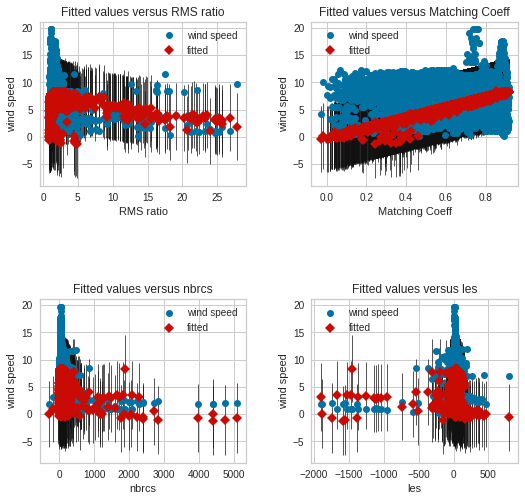

In [ ]:
#fit four plots, showing the fitted values vs. the observed values for each regressor variable
fitVsobserved(regress)

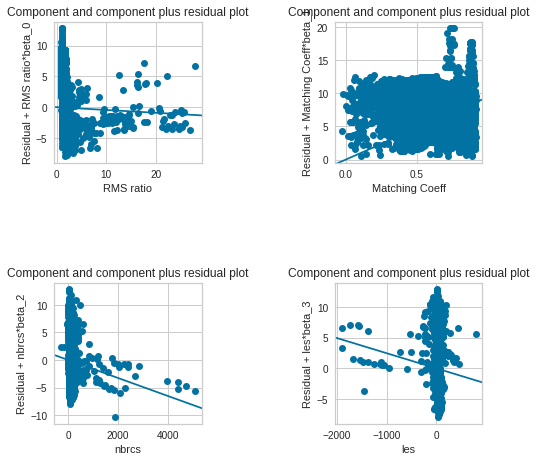

In [ ]:
##now, fit four components-plus-residuals plots, plotting residuals against each regressor in turn:
ccpr_plots(regress)

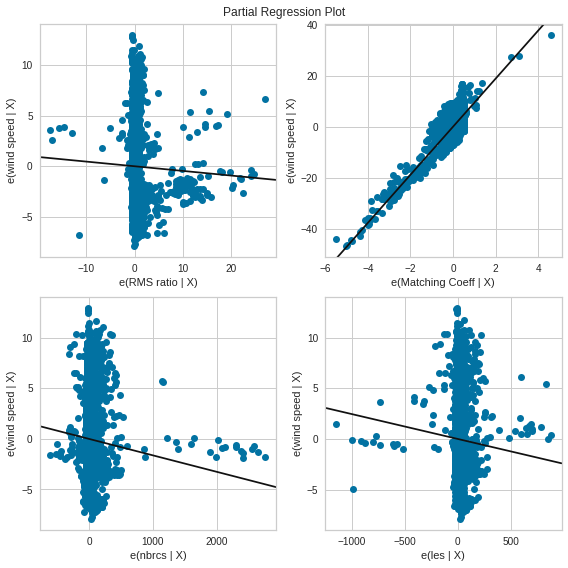

In [ ]:
#finally, plot partial regression plots for each regressor variable:
fig = plt.figure(figsize=(8,8))
fig = sm.graphics.plot_partregress_grid(regress, fig=fig)

In [ ]:
#do the same plotting for the wave height model
#first, fit the model for wave height:
modeling_frame = create_dataframe(modeling_set)
modeling_frame = modeling_frame.drop(['ddm average'], axis = 1)
modeling_frame = modeling_frame.drop(['wind speed'], axis = 1)
y = modeling_frame['wave height']
X = modeling_frame.drop(['wave height'], axis = 1)
mod = sm.OLS(y,X)
regress = mod.fit()

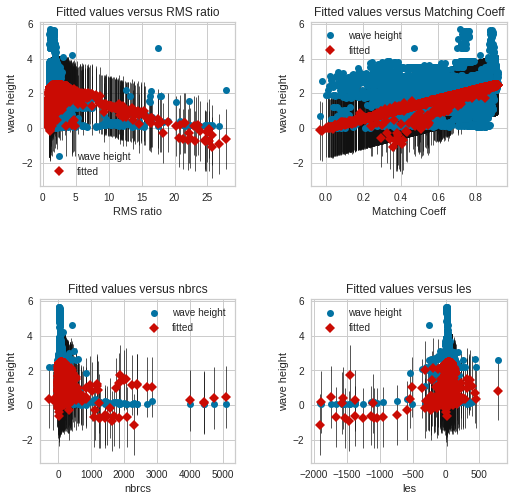

In [ ]:
##look at the fitted vs. observed values for each regressor variable in the wave height model
#fit the wind speed model
fitVsobserved(regress)

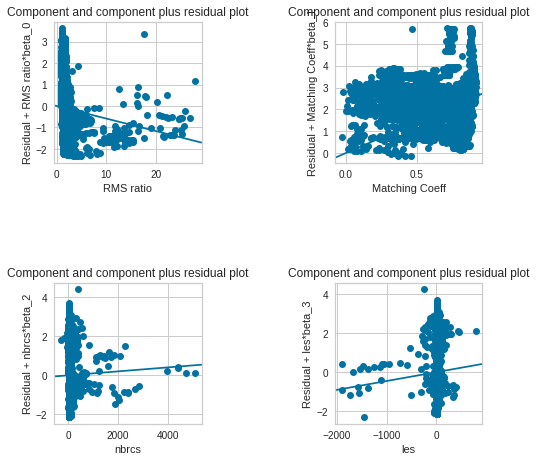

In [ ]:
#look at components plus residuals plots for wave height model
ccpr_plots(regress)

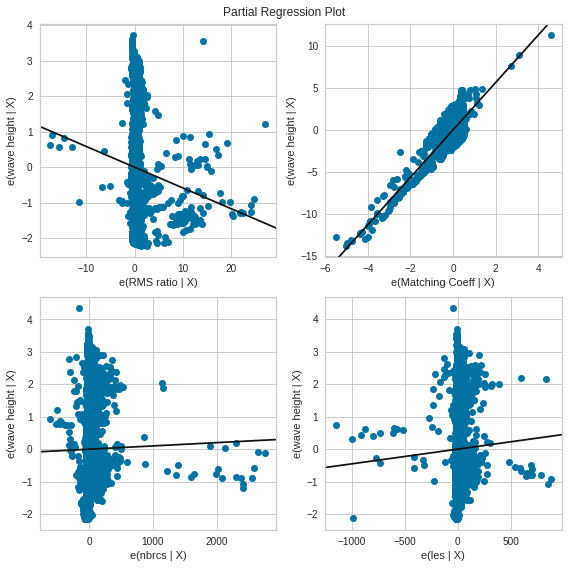

In [ ]:
#finally, look at partial regression plots for each regression variable in wave height model
fig = plt.figure(figsize=(8,8))
fig = sm.graphics.plot_partregress_grid(regress, fig=fig)

In both models, it appears that Maximum Template Matching Coefficient is the most significant contributor to the model fit by far. The components plus residuals plots also seem to suggest some non-linear structure in the variables, when assessed for model impact one at a time.

This, along with slight violations of error assumptions describe above, could imply that linear regression modeling is not the most beneficial technique for modeling on this dataset. Regardless, we move on to interpret the two model's fitted lines, predictions and coefficients, to wrap up the Linear Modeling segment.

####Linear Model Fitting/Validation

The Wind Speed Model:

Here, we fit the final models with training/testing data for some degree of validation outside of just $R^2$:

In [ ]:
#create wind model/fit
modeling_frame = create_dataframe(modeling_set)
modeling_frame = modeling_frame.drop(['ddm average'], axis = 1)
modeling_frame = modeling_frame.drop(['wave height'], axis = 1)

In [ ]:
#we use 80% of the data for training the model
train, test = train_test_split(modeling_frame, train_size=0.8, random_state=1)
modTrain = pd.DataFrame(train, columns= modeling_frame.columns)
modTest = pd.DataFrame(test, columns= modeling_frame.columns)

In [ ]:
cols = ['RMS ratio', 'Matching Coeff', 'nbrcs', 'les']
x = modTrain[cols]
y = modTrain['wind speed']

In [ ]:
wind_mod = sm.OLS(y, x).fit()
wind_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             wind speed   R-squared (uncentered):                   0.828
Model:                            OLS   Adj. R-squared (uncentered):              0.828
Method:                 Least Squares   F-statistic:                          1.026e+04
Date:                Tue, 21 Dec 2021   Prob (F-statistic):                        0.00
Time:                        01:37:27   Log-Likelihood:                         -21731.
No. Observations:                8544   AIC:                                  4.347e+04
Df Residuals:                    8540   BIC:                                  4.350e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
RMS ratio         -0.0332      0.023     -1.472      0.141      -0.077       0.011
Matching Coeff     9.3869      0.075    125.359      0.000       9.240       9.534
nbrcs             -0.0014      0.000     -4.703      0.000      -0.002      -0.001
les               -0.0023      0.001     -3.441      0.001      -0.004      -0.001
==============================================================================
Omnibus:                      501.961   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              597.090
Skew:                           0.615   Prob(JB):                    2.21e-130
Kurtosis:                       3.405   Cond. No.                         375.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Now, we look at a simple validation of the model by calculating normalized RMSE between predicted values from trained model and dependent variable values observed in the testing data partition:

In [ ]:
x_test = modTest[cols]
y_test = modTest['wind speed']
predictions = wind_mod.predict(x_test)
# Compute the root-mean-square of errors
rms_error = np.sqrt(mean_squared_error(y_test, predictions))
#normalize root mean square error
rms_normed = rms_error/(modeling_frame['wind speed'].mean())
rms_normed

0.440

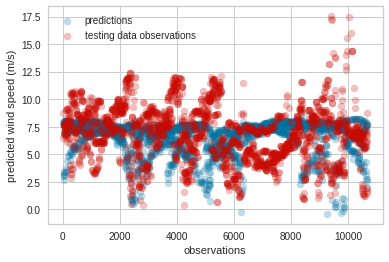

In [ ]:
#scatterplot of predictions values against observed values in testing data
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(predictions.index, predictions, c = 'b', label = 'predictions', alpha = .25)
ax1.scatter(y_test.index, y_test, c = 'r', label = 'testing data observations', alpha = .25)
plt.xlabel('observations')
plt.ylabel('predicted wind speed (m/s)')
plt.legend(loc = 'upper left')

Clearly, the distribution of the predictions is far more concentrated than that of testing data observations, which falls in line with the moderate accuracy of the model as reflected by the normalized RMSE statistic.

The Wave Height Model:

In [ ]:
##fit final wave height model with training/testing data
modeling_frame = create_dataframe(modeling_set)
modeling_frame = modeling_frame.drop(['ddm average'], axis = 1)
modeling_frame = modeling_frame.drop(['wind speed'], axis = 1)
train, test = train_test_split(modeling_frame, train_size=0.8, random_state=1)
modTrain = pd.DataFrame(train, columns= modeling_frame.columns)
modTest = pd.DataFrame(test, columns= modeling_frame.columns)
cols = ['RMS ratio', 'Matching Coeff', 'nbrcs', 'les']
x = modTrain[cols]
y = modTrain['wave height']
wave_mod = sm.OLS(y, x).fit()
wave_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            wave height   R-squared (uncentered):                   0.843
Model:                            OLS   Adj. R-squared (uncentered):              0.843
Method:                 Least Squares   F-statistic:                          1.144e+04
Date:                Tue, 21 Dec 2021   Prob (F-statistic):                        0.00
Time:                        01:37:28   Log-Likelihood:                         -10895.
No. Observations:                8544   AIC:                                  2.180e+04
Df Residuals:                    8540   BIC:                                  2.183e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
RMS ratio         -0.0539      0.006     -8.494      0.000      -0.066      -0.041
Matching Coeff     2.8247      0.021    134.087      0.000       2.783       2.866
nbrcs            7.71e-05   8.19e-05      0.941      0.347   -8.35e-05       0.000
les                0.0003      0.000      1.792      0.073   -3.23e-05       0.001
==============================================================================
Omnibus:                      786.506   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1338.865
Skew:                           0.662   Prob(JB):                    1.86e-291
Kurtosis:                       4.418   Cond. No.                         375.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
##attempt validation with calculation of normalized RMSE between predicted values and observed values in testing set
x_test = modTest[cols]
y_test = modTest['wave height']
predictions = wind_mod.predict(x_test)
# Compute the root-mean-square
rms_error = np.sqrt(mean_squared_error(y_test, predictions))
#normalize root mean square error
rms_normed = rms_error/(modeling_frame['wave height'].mean())
rms_normed

2.334

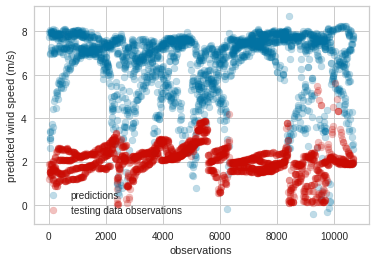

In [ ]:
#scatterplot of predictions values against observed values in testing data
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(predictions.index, predictions, c = 'b', label = 'predictions', alpha = .25)
ax1.scatter(y_test.index, y_test, c = 'r', label = 'testing data observations', alpha = .25)
plt.xlabel('observations')
plt.ylabel('predicted wind speed (m/s)')
plt.legend(loc = 'lower left')

Just as the extremely high normalized RMSE statistic calculated just above indicates, the wave height linear model is woefully inaccurate once a train/test split is used for attempted validation. This is unsurprising, as the team assumed linear modeling on the simple calibrations we have included to be a far too simplistic a method to reliably and consistently predict something so complicated as ocean surface weather patterns.

Futher conclusions about this validation and interpretation details are offered in the section 'Conclusions' below.

In [ ]:
del modeling_frame, regress, rms_error, rms_normed, bonf_outlier, bonf_outliers, bonf_test
del x_test, y_test, x, y, predictions
del fig, ax1

### Machine Learning

The team spent some time experimenting with machine learning.  It was recommended to the team to start with a categorical machine learning model.

The modeling dataset needs some adjustments to be ready for machine learning.  Many of the variables included have no predictive power and will not be useful for machine learning.  Those variables need to be removed.  The timestamp variable needs to be changed into a numeric variable to be used for machine learning and last, the categories need to be generated for wind speed and wave height.

In [ ]:
#Reach into David's file folder to extract 'ML_data.pkl'
##Must reset pathTeam to eliminate Ben_path info
pathTeam = cwd + '/drive/My Drive/'
#Check to add professor path
if os.path.exists(pathTeam + pathProfessor):
 pathTeam += pathProfessor
pathTeam += David_path # Should be a shortcut (Links to an external site.) to Team's shared folder
os.listdir(pathTeam)

['cyg_firstfile_sps.pkl',
 'cyg.ddmi.s20210411-010506-e20210411-171248.l1.power-brcs-full.a30.d31.nc',
 'ecmwf.t00z.pgrb.0p125.f000_2021041100.nc',
 'ecmwf.t12z.pgrb.0p125.f000_2021041112.nc',
 'ecmwf.t18z.pgrb.0p125.f000_2021031118.nc',
 'CYGNSS_0311.pkl',
 'CYGNSS_0411.pkl',
 'CYGNSS_Background_Collocated_20210311.nc',
 'modeling_dataset.nc',
 'wValues_20210311.pkl',
 'ML_data_sample2.pkl',
 'wValues_20210411.pkl',
 'wValues_20210411_sample.pkl',
 'ML_data.pkl']

In [ ]:
modeling_set = xr.open_dataset(f'{pathTeam}modeling_dataset.nc')

In [ ]:
ML_data_prep(modeling_set)

100%|██████████| 10680/10680 [00:00<00:00, 64801.82it/s]


In [ ]:
ML_ds = pd.read_pickle(f'{pathTeam}ML_data.pkl')
ML_ds

ddm average  RMS ratio  Matching Coeff  wind speed      wSWH      nbrcs        les     wU10m     wV10m     sp_lat      sp_lon wind_category wave_category
0          7401.46   1.077134        0.288958    9.299924  1.577483  62.245186  25.983896 -8.181535  4.421660  28.519161  130.701218          Mild        Medium
1         14560.06   1.648460        0.756654    8.764927  1.720895  33.156757  12.924806 -7.606535  4.354833  24.592062  130.240265          Mild        Medium
2         10968.92   1.926753        0.859642    9.552515  1.246971  38.310802  20.427641 -8.074068  5.104897  29.456785  126.953781        Strong           Low
3         15699.80   1.839177        0.844802    6.573362  1.902701  31.600922  13.439723 -6.564295  0.345125  22.747265  131.393417          Mild        Medium
4          7512.64   0.963515        0.293512    8.576059  1.572910  72.594566  -1.148427 -7.503491  4.152879  28.584356  130.870163          Mild        Medium
...            ...        ...             ...         ...       ...        ...        ...       ...       ...        ...         ...           ...           ...
10675      8693.80   1.090208        0.480093    7.691555  2.011177  60.152973  36.688282 -0.149721  7.690098   1.601322  264.027252          Mild        Medium
10676     19592.18   2.520207        0.859517    8.318233  1.972587  75.276253  36.030926 -3.374051  7.603209   0.067245  261.853973          Mild        Medium
10677      9361.48   1.613579        0.853095    1.934908  2.103230  88.844673  42.699989 -1.882078  0.449056   7.235445  263.704224          Calm        Medium
10678      8453.16   1.104028        0.228713    6.609409  1.954110   0.000000   0.000000 -1.104201  6.516520   2.097569  259.816864          Mild        Medium
10679      8374.92   1.044738        0.347402    7.691287  2.011186  49.667934  22.902370 -0.149276  7.689838   1.536859  264.113739          Mild        Medium

[10680 rows x 13 columns]

The new clean dataset has 10,680 observations and includes only the variables wanted for machine learning.  Some small adjustments will need to be made depending on which model the team is working on (wind speed or wave height).

#### Wind speed model



In [ ]:
y = ML_ds['wind_category']

x = ML_ds
x.drop(['wU10m', 'wV10m', 'wind speed', 'wave_category', 'wind_category'], inplace=True, axis=1)

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.15)

sgdc = SGDClassifier(max_iter=10000, tol=0.01)
print(sgdc)

sgdc.fit(xtrain,ytrain)

SGDClassifier(max_iter=10000, tol=0.01)


SGDClassifier(max_iter=10000, tol=0.01)

Training score: 0.1440846001321877
Null training score: 0.6841448189762797

               Calm_predict  Mild_predict  Strong_predict
Calm_actual               5             0             270
Mild_actual               4             0            1092
Strong_actual             0             0             231



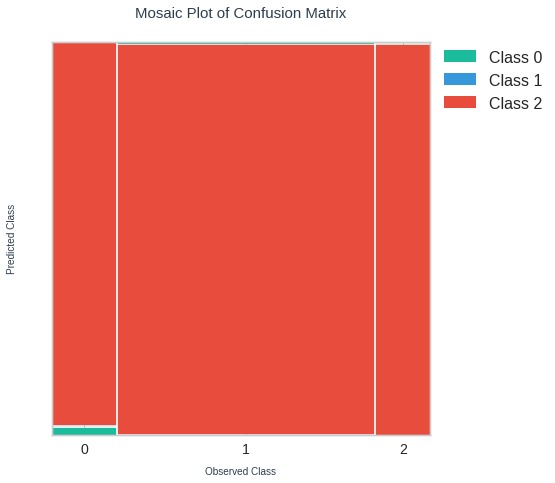


              precision    recall  f1-score   support

        Calm       0.56      0.02      0.04       275
        Mild       0.00      0.00      0.00      1096
      Strong       0.15      1.00      0.25       231

    accuracy                           0.15      1602
   macro avg       0.23      0.34      0.10      1602
weighted avg       0.12      0.15      0.04      1602



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
score = sgdc.score(xtrain, ytrain)
print(f"Training score: {score}")

null = max(ytest.value_counts())/sum(ytest.value_counts())
print(f"Null training score: {null}")
print()

ypred = sgdc.predict(xtest)

cm = confusion_matrix(ytest, ypred)
CM=pd.DataFrame.from_dict({
    'Calm_actual': [cm[0][0], cm[0][1], cm[0][2]],
    'Mild_actual': [cm[1][0], cm[1][1], cm[1][2]],
    'Strong_actual': [cm[2][0], cm[2][1], cm[2][2]]
},
orient='index', columns=['Calm_predict', 'Mild_predict', 'Strong_predict'])
print(CM)
print()

results = [
    [cm[0][0], cm[0][1], cm[0][2]], # predictions for class 1
    [cm[1][0], cm[1][1], cm[1][2]], # predictions for class 2
    [cm[2][0], cm[2][1], cm[2][2]], # predictions for class 3
]

nclass_classification_mosaic_plot(3, results)
print()

cr = classification_report(ytest, ypred)
print(cr)

#### Significant Wave Height Model

In [ ]:
ML_ds2 = pd.read_pickle(f'{pathTeam}ML_data.pkl')

y2 = ML_ds2['wave_category']

x2 = ML_ds2
x2.drop(['wU10m', 'wV10m', 'wSWH', 'wave_category', 'wind_category'], inplace=True, axis=1)

In [ ]:
xtrain2, xtest2, ytrain2, ytest2 = train_test_split(x2, y2, test_size = 0.15)

sgdc2 = SGDClassifier(max_iter=10000, tol=0.01)
print(sgdc2)

sgdc2.fit(xtrain2,ytrain2)

SGDClassifier(max_iter=10000, tol=0.01)


SGDClassifier(max_iter=10000, tol=0.01)

Training score: 0.6560916501432034
Null training score: 0.7590511860174781

               High_predict  Low_predict  Medium_predict
High_actual               0           59             127
Low_actual                0           72             128
Medium_actual             0          239             977



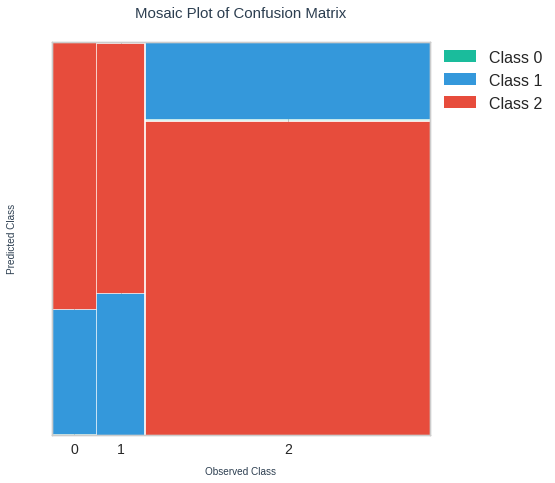


              precision    recall  f1-score   support

        High       0.00      0.00      0.00       186
         Low       0.19      0.36      0.25       200
      Medium       0.79      0.80      0.80      1216

    accuracy                           0.65      1602
   macro avg       0.33      0.39      0.35      1602
weighted avg       0.63      0.65      0.64      1602



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
score = sgdc2.score(xtrain2, ytrain2)
print(f"Training score: {score}")

null = max(ytest2.value_counts())/sum(ytest2.value_counts())
print(f"Null training score: {null}")
print()

ypred2 = sgdc2.predict(xtest2)

cm2 = confusion_matrix(ytest2, ypred2)
CM2=pd.DataFrame.from_dict({
    'High_actual': [cm2[0][0], cm2[0][1], cm2[0][2]],
    'Low_actual': [cm2[1][0], cm2[1][1], cm2[1][2]],
    'Medium_actual': [cm2[2][0], cm2[2][1], cm2[2][2]]
},
orient='index', columns=['High_predict', 'Low_predict', 'Medium_predict'])
print(CM2)
print()

results = [
    [cm2[0][0], cm2[0][1], cm2[0][2]], # predictions for class 1
    [cm2[1][0], cm2[1][1], cm2[1][2]], # predictions for class 2
    [cm2[2][0], cm2[2][1], cm2[2][2]], # predictions for class 3
]

nclass_classification_mosaic_plot(3, results)
print()

cr2 = classification_report(ytest2, ypred2)
print(cr2)

The quality of the model can be determined by looking at the 4 different parts of the printout.  The first is a training score for the model and a null model, the sceond is a confusion matrix, the third is a mosaic plot of the confusion matrix, and the final part is a classification report.

The training score measures the number of correct guesses against the total number of guesses.  This number is not very useful if not compared to a null score.  The null score is the training score a model would get if it only guessed the most common class.  In general, it is best for the model training score to be greater than the null training score, however, this is not always true.  Due to that, the training score is not the best method for determining the quality of a model.

The next part of the printout is a confusion matrix.  A confusion matrix tallies what the correct answer of a given test element is vs what the guess from the model was.  If the model guesses correctly, a tally will be made along the main diagonal.  For example, if the test element belongs to category 1 and the model guesses category 1, the count in position (1,1) on the matrix will go up by one.  If instead, the maching guesses category 2, the matrix tally will increase by one in the position (1,2).  For a confusion matrix to provide evidence that demonstrates a good model, the elements of the matrix not on the main diagonal should be very low as they represent incorrect guesses by the model.

The mosaic plot of the confusion matrix is a way to visualize the confusion matrix.  The width's of the classes on the x-axis are determined by the proportion of each class in the testing dataset.  The bars are colored based on how many times each class was guessed.  For a model that is accurately classifying observations, one would expect the bars to be colored mostly by the proper prediction class color (i.e. the bar of observed class 0 would be mostly the color for class 0 as defined in the legend).

The final part of the printout is a classification report which gives an in-depth look into how a classification model performed.  The 'precision' column gives the ratio of correct guesses for an individual class to total guesses of that class.  The 'recall' column gives the ratio of correct guesses of a class to total occurances of that class.  The 'f1-score' column is a metric that combines precision and recall and is used to compare models, not to determine model accuracy.  The f1-score is given by $f1 = \frac{2*Recall*Percision}{(Recall + Precision)}$.  The final column 'support' counts the total number of times that class appears in the testing data.

Depeding on how the dataset gets split into training and testing data, the results will vary.  For every trial the team ran, the results were not encouraging.

In general, the windspeed model was not able to beat the null training score.  However, there was one trial the team ran that beat the null training score.  The confusion matrix consistantly shows too many incorrect guesses.  The mosaic plot shows that the class 'mild' was guessed almost every time.  The classification report shows a poor precision and recall score.  All of these factors suggest that the windspeed model created is not a good model.  The column with the most support (Mild) is consistantly the most accurately guessed.  This leads the team to believe that increasing the size of the modeling dataset would likely improve the model.   

In general, the wave height model showed better restults as the training score was very close to the null training score and depending on how the dataset is split for training and testing, the training score was actually higher than the null score on occasion.  That being said, the confusion matrix still showed a signifant number of incorrect guesses and the mosaic plot shows that the 'medium' category was almost exclusively guessed.  The classification report backed up the findings of the confusion matrix, suggesting the model is not accurately classifying the different types of significant wave height.  The team believes that increasing the size of the modeling dataset would also improve this model.  

# Conclusions
* What are you taking away from your work?

Linear Modeling Conclusions:

The error assumptions of linear modeling were only partly satisfied by our dataset.

Our most interesting conclusions for the linear model came where we assessed the status of influential values/outliers, and also where we performed model fitting/prediction. With regard to outliers/influential values, the consecutive times with the most influential values might suggest that there could be a seasonal component to wind speed/wave height, and that either a linear model with a much larger range of dates contributing samples, or a model accounting for seasonality, could reduce the status of these observations as influential values. This could be a promising avenue of future research.

Linear Modeling Results/Interpretation:    

The Linear Model we fit for Wind Speed gives the fitted equation:    

$\hat{wind speed} = -.0332(RMSratio)+9.3869(Matching Coeff)-.0014(nbrcs)-.0023(les)$

The Linear Model we fit for Wave Height gives the fitted equation:      

$\hat{wave height}=-0.0539(RMSratio)+2.8247(Matching Coeff)+.0000771(nbrcs)+0.0003(les)$

For each respective model, assuming we can count on the assumptions of linear modeling for this dataset, there is a 95% probability that the confidence intervals listed in the regression summaries above contain the true values of the $\beta$ coefficients.

According to Statology.org, the generally closer a Normalized RMSE value is to zero, the more reliable the model is (the less likely to be overfit or underfit). Several university-affiliated postings on ResearchGate.net suggest that an NRMSE of >= .5 reflects a generally inability of the model to predict reliably [Link](https://www.researchgate.net/post/Whats-the-acceptable-value-of-Root-Mean-Square-Error-RMSE-Sum-of-Squares-due-to-error-SSE-and-Adjusted-R-square)
By that standard, our Wind Speed Linear Regression Model predicts with greater reliability than our Wave Height Model.

Machine Learning Modeling Conclusions:     

The team was not able to develope a categorical machine learning model capable of predicting wind speed or significant wave height.  While neither model was successful, the significant wave height model generally has an accuracy score around 80%.  It is possible that the model could be improved to the point that the accuracy score reaches a desirable level.

* What do you want the reader to take away?

Hopefully, the reader/notebook user has taken away not only more insight into the CYGNSS project by NASA, but has been stimulated to consider future directions modeling research with that CYGNSS data may take. We especially hope this notebook has contributed an interesting combination of DDM calibrations to predict weather patterns on the ocean surface in various simple models. It remains for further research to enhance the sophistication of the CYGNSS modeling work begun here, and to build up the accuracy/reliability of predictions.

* Be honest about what conclusions are really supported

Linear Modeling Limitations:     

While the ability to use linear regression modeling to predict wind speed/wave height from Maximum Template Matching Coefficient of DDM data seemed promising, the model did, realistically, have a worrying degree of violation of linear modeling assumptions. Thus, the interpretation of OLS coefficient estimates from our model, as given above, should be taken with a large grain of salt.

Machine Learning Modeling Limitations:

There were many limitations with the teams' efforts in developing a categorical machine learning model.  The team was limited by its understanding of the SGDClassifier.  More optimal parameter tuning for this model may exist.  The team attempted to find the optimal parameter settings by trial and error.  Therer is also a significant amount of data available in the collocated data base to add to the training set if a future team is to try to improve the models.  There could also be room for improvment if more time were to be spend on the variable selection process.  Taking any, or all of these steps would likely improve the categorical machine learning model.
